In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

### Lets find the STD mean and DIV now.


In [5]:
expr_transforms=transforms.Compose([transforms.ToTensor()])
expr = datasets.MNIST('/data', train=True, download=True, transform=expr_transforms)
expr_data = expr.train_data
expr_data = expr.transform(expr_data.numpy())

print('[Train]')
print(' - Numpy Shape:', expr.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', expr.train_data.size())
print(' - min:', torch.min(expr_data))
print(' - max:', torch.max(expr_data))
print(' - mean:', torch.mean(expr_data))
print(' - std:', torch.std(expr_data))
print(' - var:', torch.var(expr_data))

 99%|███████████████████████████████████████████████████████████████████ | 9773056/9912422 [00:19<00:00, 376147.64it/s]

Extracting /data\MNIST\raw\train-images-idx3-ubyte.gz to /data\MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 33366.19it/s]                                                                                          


Extracting /data\MNIST\raw\train-labels-idx1-ubyte.gz to /data\MNIST\raw



0it [00:00, ?it/s]
 93%|███████████████████████████████████████████████████████████████▌    | 1540096/1648877 [00:05<00:00, 516607.75it/s]
1654784it [00:05, 282545.75it/s]                                                                                       


Extracting /data\MNIST\raw\t10k-images-idx3-ubyte.gz to /data\MNIST\raw



0it [00:00, ?it/s]
8192it [00:00, 12210.32it/s]                                                                                           


Extracting /data\MNIST\raw\t10k-labels-idx1-ubyte.gz to /data\MNIST\raw
Processing...
Done!


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


9920512it [00:29, 376147.64it/s]                                                                                       

### Image Transformation
Lets Transfrom our image into Tensor and apply std mean and div (calculated above) to it and club it with transforms.compose. 
Here transforms.Compose function will apply tranforms and call input one by one.

In [7]:
# Train Phase transformations
train_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

# Test Phase transformations
test_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

### Creating Dataset
Now Lets create our TEST and TRAIN dataset using MNIST using above transforms test_transforms and train_transforms respectively

In [8]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)


0it [00:00, ?it/s]
 40%|███████████████████████████                                         | 3940352/9912422 [00:12<00:15, 374638.82it/s]


 73%|██████████████████████████████████████████████████▌                  | 7258112/9912422 [00:27<01:47, 24593.37it/s]


 81%|███████████████████████████████████████████████████████▊             | 8011776/9912422 [00:51<00:30, 61951.25it/s]


 90%|██████████████████████████████████████████████████████████████▉       | 8904704/9912422 [01:56<11:54, 1410.84it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                        | 0/28881 [00:01<?, ?it/s]

32768it [00:01, 17516.54it/s]                                                                                          


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

  1%|▋                                                                      | 16384/1648877 [00:00<00:29, 55719.73it/s]

  1%|█                                                                      | 24576/1648877 [00:01<00:27, 60036.71it/s]

  2%|█▊                                                                     | 40960/1648877 [00:01<00:22, 69928.65it/s]

  3%|██▍                                                                    | 57344/1648877 [00:01<00:26, 60139.02it/s]

  4%|██▊                                                                    | 65536/1648877 [00:01<00:35, 44266.57it/s]

  5%|███▌                                                                   | 81920/1648877 [00:02<00:29, 53394.09it/s]

  6%|████▏                                                                  | 98304/1648877 [00:02<00:27, 55657.30it/s]

  6%|████▌

 59%|█████████████████████████████████████████▍                            | 974848/1648877 [00:20<00:52, 12848.52it/s]

 60%|█████████████████████████████████████████▋                            | 983040/1648877 [00:21<01:04, 10393.14it/s]

 60%|██████████████████████████████████████████▋                            | 991232/1648877 [00:22<01:06, 9915.91it/s]

 61%|██████████████████████████████████████████▍                           | 999424/1648877 [00:22<00:53, 12049.44it/s]

 62%|██████████████████████████████████████████▌                          | 1015808/1648877 [00:23<00:42, 14875.01it/s]

 62%|██████████████████████████████████████████▊                          | 1024000/1648877 [00:23<00:39, 15964.02it/s]

 63%|███████████████████████████████████████████▌                         | 1040384/1648877 [00:24<00:30, 19647.02it/s]

 64%|███████████████████████████████████████████▉                         | 1048576/1648877 [00:24<00:26, 22587.68it/s]

 64%|███████████████████████████

 97%|██████████████████████████████████████████████████████████████████▊  | 1597440/1648877 [00:56<00:02, 24770.32it/s]

 98%|███████████████████████████████████████████████████████████████████▌ | 1613824/1648877 [00:56<00:01, 33157.19it/s]

 98%|███████████████████████████████████████████████████████████████████▉ | 1622016/1648877 [00:57<00:00, 35248.80it/s]

 99%|████████████████████████████████████████████████████████████████████▏| 1630208/1648877 [00:57<00:00, 39172.00it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw





0it [00:00, ?it/s]


8192it [00:00, 13729.51it/s]                                                                                           


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!




1654784it [01:15, 39172.00it/s]                                                                                        

### Dataloader Arguments & Test/Train Dataloaders

In [9]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


### Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


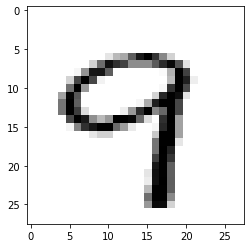

In [10]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


### View our Data
Its important to see our data before we start to train it. by seeing the data we get to know what all tranformation we need to add to network

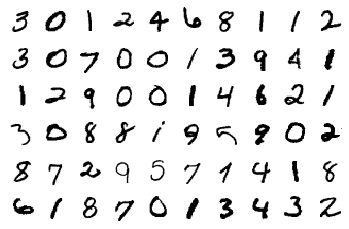

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Lets Build our Model


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) #input 28x28 OUtput=32 padding=1 RF=1
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(256, 512, 3)
        self.conv6 = nn.Conv2d(512, 1024, 3)
        self.conv7 = nn.Conv2d(1024, 10, 3)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        # x = F.relu(self.conv7(x)) # we dont add relu at last layer
        x = self.conv7(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

### Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
--------------------------------

### Training and Testing
All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments.

Looking at logs can be boring, so we'll introduce tqdm progressbar to get cooler logs.

Let's write train and test functions

In [16]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

### Now we train and testing our model

In [17]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=2.303187370300293 Batch_id=0 Accuracy=7.03:   0%|                                         | 0/469 [00:01<?, ?it/s]


Loss=2.303187370300293 Batch_id=0 Accuracy=7.03:   0%|                                 | 1/469 [00:01<09:21,  1.20s/it]


Loss=2.3020524978637695 Batch_id=1 Accuracy=10.16:   0%|                               | 1/469 [00:01<09:21,  1.20s/it]


Loss=2.3026461601257324 Batch_id=2 Accuracy=10.42:   0%|                               | 1/469 [00:01<09:21,  1.20s/it]


Loss=2.3026461601257324 Batch_id=2 Accuracy=10.42:   1%|▏                              | 3/469 [00:01<06:42,  1.16it/s]


Loss=2.3016433715820312 Batch_id=3 Accuracy=10.94:   1%|▏                              | 3/469 [00:01<06:42,  1.16it/s]


Loss=2.302730083465576 Batch_id=4 Accuracy=10.16:   1%|▏                               | 3/469 [00:01<06:42,  1.16it/s]


Loss=2.30273008346557

Loss=2.2825205326080322 Batch_id=44 Accuracy=13.35:   9%|██▋                          | 43/469 [00:04<00:34, 12.46it/s]


Loss=2.2825205326080322 Batch_id=44 Accuracy=13.35:  10%|██▊                          | 45/469 [00:04<00:33, 12.50it/s]


Loss=2.2795228958129883 Batch_id=45 Accuracy=14.10:  10%|██▊                          | 45/469 [00:04<00:33, 12.50it/s]


Loss=2.28425669670105 Batch_id=46 Accuracy=14.83:  10%|██▉                            | 45/469 [00:04<00:33, 12.50it/s]


Loss=2.28425669670105 Batch_id=46 Accuracy=14.83:  10%|███                            | 47/469 [00:04<00:33, 12.52it/s]


Loss=2.276479721069336 Batch_id=47 Accuracy=15.84:  10%|███                           | 47/469 [00:04<00:33, 12.52it/s]


Loss=2.278994560241699 Batch_id=48 Accuracy=16.52:  10%|███                           | 47/469 [00:05<00:33, 12.52it/s]


Loss=2.278994560241699 Batch_id=48 Accuracy=16.52:  10%|███▏                          | 49/469 [00:05<00:33, 12.54it/s]


Loss=2.2817533016204834 

Loss=1.3545812368392944 Batch_id=88 Accuracy=33.12:  19%|█████▌                       | 89/469 [00:08<00:30, 12.30it/s]


Loss=1.210240125656128 Batch_id=89 Accuracy=33.46:  19%|█████▋                        | 89/469 [00:08<00:30, 12.30it/s]


Loss=1.0182924270629883 Batch_id=90 Accuracy=33.83:  19%|█████▌                       | 89/469 [00:08<00:30, 12.30it/s]


Loss=1.0182924270629883 Batch_id=90 Accuracy=33.83:  19%|█████▋                       | 91/469 [00:08<00:30, 12.29it/s]


Loss=0.8651673197746277 Batch_id=91 Accuracy=34.27:  19%|█████▋                       | 91/469 [00:08<00:30, 12.29it/s]


Loss=0.7204990983009338 Batch_id=92 Accuracy=34.79:  19%|█████▋                       | 91/469 [00:08<00:30, 12.29it/s]


Loss=0.7204990983009338 Batch_id=92 Accuracy=34.79:  20%|█████▊                       | 93/469 [00:08<00:30, 12.31it/s]


Loss=0.5643829107284546 Batch_id=93 Accuracy=35.33:  20%|█████▊                       | 93/469 [00:08<00:30, 12.31it/s]


Loss=0.9765321612358093 

Loss=0.2726950943470001 Batch_id=133 Accuracy=50.10:  28%|███████▋                   | 133/469 [00:11<00:27, 12.27it/s]


Loss=0.31187254190444946 Batch_id=134 Accuracy=50.42:  28%|███████▎                  | 133/469 [00:12<00:27, 12.27it/s]


Loss=0.31187254190444946 Batch_id=134 Accuracy=50.42:  29%|███████▍                  | 135/469 [00:12<00:27, 12.25it/s]


Loss=0.32719117403030396 Batch_id=135 Accuracy=50.71:  29%|███████▍                  | 135/469 [00:12<00:27, 12.25it/s]


Loss=0.3345007300376892 Batch_id=136 Accuracy=50.99:  29%|███████▊                   | 135/469 [00:12<00:27, 12.25it/s]


Loss=0.3345007300376892 Batch_id=136 Accuracy=50.99:  29%|███████▉                   | 137/469 [00:12<00:27, 12.21it/s]


Loss=0.39787036180496216 Batch_id=137 Accuracy=51.26:  29%|███████▌                  | 137/469 [00:12<00:27, 12.21it/s]


Loss=0.18106921017169952 Batch_id=138 Accuracy=51.57:  29%|███████▌                  | 137/469 [00:12<00:27, 12.21it/s]


Loss=0.18106921017169952

Loss=0.18943648040294647 Batch_id=178 Accuracy=60.69:  38%|█████████▊                | 177/469 [00:15<00:23, 12.23it/s]


Loss=0.18943648040294647 Batch_id=178 Accuracy=60.69:  38%|█████████▉                | 179/469 [00:15<00:23, 12.22it/s]


Loss=0.20417353510856628 Batch_id=179 Accuracy=60.87:  38%|█████████▉                | 179/469 [00:15<00:23, 12.22it/s]


Loss=0.23523658514022827 Batch_id=180 Accuracy=61.03:  38%|█████████▉                | 179/469 [00:15<00:23, 12.22it/s]


Loss=0.23523658514022827 Batch_id=180 Accuracy=61.03:  39%|██████████                | 181/469 [00:15<00:23, 12.14it/s]


Loss=0.23816698789596558 Batch_id=181 Accuracy=61.21:  39%|██████████                | 181/469 [00:15<00:23, 12.14it/s]


Loss=0.13400496542453766 Batch_id=182 Accuracy=61.40:  39%|██████████                | 181/469 [00:15<00:23, 12.14it/s]


Loss=0.13400496542453766 Batch_id=182 Accuracy=61.40:  39%|██████████▏               | 183/469 [00:15<00:23, 12.16it/s]


Loss=0.12950801849365234

Loss=0.14600437879562378 Batch_id=222 Accuracy=67.33:  48%|████████████▎             | 223/469 [00:19<00:20, 12.18it/s]


Loss=0.20947742462158203 Batch_id=223 Accuracy=67.46:  48%|████████████▎             | 223/469 [00:19<00:20, 12.18it/s]


Loss=0.09333700686693192 Batch_id=224 Accuracy=67.59:  48%|████████████▎             | 223/469 [00:19<00:20, 12.18it/s]


Loss=0.09333700686693192 Batch_id=224 Accuracy=67.59:  48%|████████████▍             | 225/469 [00:19<00:20, 12.16it/s]


Loss=0.21878473460674286 Batch_id=225 Accuracy=67.72:  48%|████████████▍             | 225/469 [00:19<00:20, 12.16it/s]


Loss=0.14243867993354797 Batch_id=226 Accuracy=67.84:  48%|████████████▍             | 225/469 [00:19<00:20, 12.16it/s]


Loss=0.14243867993354797 Batch_id=226 Accuracy=67.84:  48%|████████████▌             | 227/469 [00:19<00:19, 12.17it/s]


Loss=0.2660621404647827 Batch_id=227 Accuracy=67.94:  48%|█████████████              | 227/469 [00:19<00:19, 12.17it/s]


Loss=0.17574292421340942

Loss=0.17546692490577698 Batch_id=267 Accuracy=72.10:  57%|██████████████▊           | 267/469 [00:22<00:16, 12.09it/s]


Loss=0.21026182174682617 Batch_id=268 Accuracy=72.19:  57%|██████████████▊           | 267/469 [00:23<00:16, 12.09it/s]


Loss=0.21026182174682617 Batch_id=268 Accuracy=72.19:  57%|██████████████▉           | 269/469 [00:23<00:16, 12.09it/s]


Loss=0.06168763339519501 Batch_id=269 Accuracy=72.28:  57%|██████████████▉           | 269/469 [00:23<00:16, 12.09it/s]


Loss=0.13914231956005096 Batch_id=270 Accuracy=72.36:  57%|██████████████▉           | 269/469 [00:23<00:16, 12.09it/s]


Loss=0.13914231956005096 Batch_id=270 Accuracy=72.36:  58%|███████████████           | 271/469 [00:23<00:16, 12.09it/s]


Loss=0.10627123713493347 Batch_id=271 Accuracy=72.46:  58%|███████████████           | 271/469 [00:23<00:16, 12.09it/s]


Loss=0.16987602412700653 Batch_id=272 Accuracy=72.54:  58%|███████████████           | 271/469 [00:23<00:16, 12.09it/s]


Loss=0.16987602412700653

Loss=0.09031984955072403 Batch_id=312 Accuracy=75.60:  66%|█████████████████▏        | 311/469 [00:26<00:13, 12.10it/s]


Loss=0.09031984955072403 Batch_id=312 Accuracy=75.60:  67%|█████████████████▎        | 313/469 [00:26<00:12, 12.13it/s]


Loss=0.14616356790065765 Batch_id=313 Accuracy=75.66:  67%|█████████████████▎        | 313/469 [00:26<00:12, 12.13it/s]


Loss=0.1253124475479126 Batch_id=314 Accuracy=75.72:  67%|██████████████████         | 313/469 [00:26<00:12, 12.13it/s]


Loss=0.1253124475479126 Batch_id=314 Accuracy=75.72:  67%|██████████████████▏        | 315/469 [00:26<00:12, 12.12it/s]


Loss=0.14538276195526123 Batch_id=315 Accuracy=75.79:  67%|█████████████████▍        | 315/469 [00:26<00:12, 12.12it/s]


Loss=0.14335869252681732 Batch_id=316 Accuracy=75.85:  67%|█████████████████▍        | 315/469 [00:26<00:12, 12.12it/s]


Loss=0.14335869252681732 Batch_id=316 Accuracy=75.85:  68%|█████████████████▌        | 317/469 [00:26<00:12, 12.12it/s]


Loss=0.08992048352956772

Loss=0.060169391334056854 Batch_id=356 Accuracy=78.18:  76%|███████████████████      | 357/469 [00:30<00:09, 12.04it/s]


Loss=0.08304983377456665 Batch_id=357 Accuracy=78.23:  76%|███████████████████▊      | 357/469 [00:30<00:09, 12.04it/s]


Loss=0.07824572920799255 Batch_id=358 Accuracy=78.29:  76%|███████████████████▊      | 357/469 [00:30<00:09, 12.04it/s]


Loss=0.07824572920799255 Batch_id=358 Accuracy=78.29:  77%|███████████████████▉      | 359/469 [00:30<00:09, 12.06it/s]


Loss=0.10102098435163498 Batch_id=359 Accuracy=78.34:  77%|███████████████████▉      | 359/469 [00:30<00:09, 12.06it/s]


Loss=0.10282458364963531 Batch_id=360 Accuracy=78.39:  77%|███████████████████▉      | 359/469 [00:30<00:09, 12.06it/s]


Loss=0.10282458364963531 Batch_id=360 Accuracy=78.39:  77%|████████████████████      | 361/469 [00:30<00:08, 12.06it/s]


Loss=0.10276775807142258 Batch_id=361 Accuracy=78.44:  77%|████████████████████      | 361/469 [00:30<00:08, 12.06it/s]


Loss=0.04024633020162582

Loss=0.09787003695964813 Batch_id=401 Accuracy=80.34:  86%|██████████████████████▏   | 401/469 [00:34<00:05, 11.97it/s]


Loss=0.06520737707614899 Batch_id=402 Accuracy=80.39:  86%|██████████████████████▏   | 401/469 [00:34<00:05, 11.97it/s]


Loss=0.06520737707614899 Batch_id=402 Accuracy=80.39:  86%|██████████████████████▎   | 403/469 [00:34<00:05, 11.97it/s]


Loss=0.1263175904750824 Batch_id=403 Accuracy=80.43:  86%|███████████████████████▏   | 403/469 [00:34<00:05, 11.97it/s]


Loss=0.0468161515891552 Batch_id=404 Accuracy=80.47:  86%|███████████████████████▏   | 403/469 [00:34<00:05, 11.97it/s]


Loss=0.0468161515891552 Batch_id=404 Accuracy=80.47:  86%|███████████████████████▎   | 405/469 [00:34<00:05, 11.97it/s]


Loss=0.08129338920116425 Batch_id=405 Accuracy=80.52:  86%|██████████████████████▍   | 405/469 [00:34<00:05, 11.97it/s]


Loss=0.10819435864686966 Batch_id=406 Accuracy=80.56:  86%|██████████████████████▍   | 405/469 [00:34<00:05, 11.97it/s]


Loss=0.10819435864686966

Loss=0.04608336463570595 Batch_id=446 Accuracy=82.09:  95%|████████████████████████▋ | 445/469 [00:37<00:01, 12.08it/s]


Loss=0.04608336463570595 Batch_id=446 Accuracy=82.09:  95%|████████████████████████▊ | 447/469 [00:37<00:01, 12.10it/s]


Loss=0.10588333010673523 Batch_id=447 Accuracy=82.13:  95%|████████████████████████▊ | 447/469 [00:37<00:01, 12.10it/s]


Loss=0.09140773117542267 Batch_id=448 Accuracy=82.16:  95%|████████████████████████▊ | 447/469 [00:37<00:01, 12.10it/s]


Loss=0.09140773117542267 Batch_id=448 Accuracy=82.16:  96%|████████████████████████▉ | 449/469 [00:37<00:01, 12.08it/s]


Loss=0.019399434328079224 Batch_id=449 Accuracy=82.20:  96%|███████████████████████▉ | 449/469 [00:38<00:01, 12.08it/s]


Loss=0.019636090844869614 Batch_id=450 Accuracy=82.24:  96%|███████████████████████▉ | 449/469 [00:38<00:01, 12.08it/s]


Loss=0.019636090844869614 Batch_id=450 Accuracy=82.24:  96%|████████████████████████ | 451/469 [00:38<00:01, 12.12it/s]


Loss=0.05728090554475784


Test set: Average loss: 0.0618, Accuracy: 9787/10000 (97.87%)

EPOCH: 1





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.05463722348213196 Batch_id=0 Accuracy=96.88:   0%|                                      | 0/469 [00:01<?, ?it/s]


Loss=0.05463722348213196 Batch_id=0 Accuracy=96.88:   0%|                              | 1/469 [00:01<10:41,  1.37s/it]


Loss=0.017319455742836 Batch_id=1 Accuracy=98.44:   0%|                                | 1/469 [00:01<10:41,  1.37s/it]


Loss=0.09639369696378708 Batch_id=2 Accuracy=98.18:   0%|                              | 1/469 [00:01<10:41,  1.37s/it]


Loss=0.09639369696378708 Batch_id=2 Accuracy=98.18:   1%|▏                             | 3/469 [00:01<07:38,  1.02it/s]


Loss=0.09586726874113083 Batch_id=3 Accuracy=97.85:   1%|▏                             | 3/469 [00:01<07:38,  1.02it/s]


Loss=0.0339706651866436 Batch_id=4 Accuracy=98.28:   1%|▏                              | 3/469 [00:01<07:38,  1.02it/s]


Loss=0.03397066518664

Loss=0.0865895226597786 Batch_id=44 Accuracy=97.71:   9%|██▋                          | 43/469 [00:05<00:35, 11.97it/s]


Loss=0.0865895226597786 Batch_id=44 Accuracy=97.71:  10%|██▊                          | 45/469 [00:05<00:35, 11.99it/s]


Loss=0.014942750334739685 Batch_id=45 Accuracy=97.76:  10%|██▌                        | 45/469 [00:05<00:35, 11.99it/s]


Loss=0.045675527304410934 Batch_id=46 Accuracy=97.77:  10%|██▌                        | 45/469 [00:05<00:35, 11.99it/s]


Loss=0.045675527304410934 Batch_id=46 Accuracy=97.77:  10%|██▋                        | 47/469 [00:05<00:35, 12.03it/s]


Loss=0.046404674649238586 Batch_id=47 Accuracy=97.77:  10%|██▋                        | 47/469 [00:05<00:35, 12.03it/s]


Loss=0.06132303178310394 Batch_id=48 Accuracy=97.78:  10%|██▊                         | 47/469 [00:05<00:35, 12.03it/s]


Loss=0.06132303178310394 Batch_id=48 Accuracy=97.78:  10%|██▉                         | 49/469 [00:05<00:34, 12.06it/s]


Loss=0.09237713366746902

Loss=0.026919741183519363 Batch_id=88 Accuracy=97.82:  19%|█████                      | 89/469 [00:08<00:31, 12.08it/s]


Loss=0.04049845412373543 Batch_id=89 Accuracy=97.84:  19%|█████▎                      | 89/469 [00:08<00:31, 12.08it/s]


Loss=0.12017308175563812 Batch_id=90 Accuracy=97.83:  19%|█████▎                      | 89/469 [00:08<00:31, 12.08it/s]


Loss=0.12017308175563812 Batch_id=90 Accuracy=97.83:  19%|█████▍                      | 91/469 [00:08<00:31, 11.98it/s]


Loss=0.04626931995153427 Batch_id=91 Accuracy=97.83:  19%|█████▍                      | 91/469 [00:08<00:31, 11.98it/s]


Loss=0.0917774885892868 Batch_id=92 Accuracy=97.84:  19%|█████▋                       | 91/469 [00:09<00:31, 11.98it/s]


Loss=0.0917774885892868 Batch_id=92 Accuracy=97.84:  20%|█████▊                       | 93/469 [00:09<00:31, 11.80it/s]


Loss=0.07391786575317383 Batch_id=93 Accuracy=97.84:  20%|█████▌                      | 93/469 [00:09<00:31, 11.80it/s]


Loss=0.05020597577095032

Loss=0.1387677788734436 Batch_id=133 Accuracy=97.97:  28%|███████▋                   | 133/469 [00:12<00:27, 12.03it/s]


Loss=0.0475277453660965 Batch_id=134 Accuracy=97.96:  28%|███████▋                   | 133/469 [00:12<00:27, 12.03it/s]


Loss=0.0475277453660965 Batch_id=134 Accuracy=97.96:  29%|███████▊                   | 135/469 [00:12<00:27, 12.03it/s]


Loss=0.10078766942024231 Batch_id=135 Accuracy=97.95:  29%|███████▍                  | 135/469 [00:12<00:27, 12.03it/s]


Loss=0.04184332489967346 Batch_id=136 Accuracy=97.96:  29%|███████▍                  | 135/469 [00:12<00:27, 12.03it/s]


Loss=0.04184332489967346 Batch_id=136 Accuracy=97.96:  29%|███████▌                  | 137/469 [00:12<00:27, 12.06it/s]


Loss=0.02305569127202034 Batch_id=137 Accuracy=97.97:  29%|███████▌                  | 137/469 [00:12<00:27, 12.06it/s]


Loss=0.021478824317455292 Batch_id=138 Accuracy=97.98:  29%|███████▎                 | 137/469 [00:12<00:27, 12.06it/s]


Loss=0.02147882431745529

Loss=0.03061642125248909 Batch_id=178 Accuracy=97.99:  38%|█████████▊                | 177/469 [00:16<00:24, 12.07it/s]


Loss=0.03061642125248909 Batch_id=178 Accuracy=97.99:  38%|█████████▉                | 179/469 [00:16<00:24, 12.02it/s]


Loss=0.017054494470357895 Batch_id=179 Accuracy=98.00:  38%|█████████▌               | 179/469 [00:16<00:24, 12.02it/s]


Loss=0.18731039762496948 Batch_id=180 Accuracy=97.98:  38%|█████████▉                | 179/469 [00:16<00:24, 12.02it/s]


Loss=0.18731039762496948 Batch_id=180 Accuracy=97.98:  39%|██████████                | 181/469 [00:16<00:24, 11.99it/s]


Loss=0.09367012977600098 Batch_id=181 Accuracy=97.99:  39%|██████████                | 181/469 [00:16<00:24, 11.99it/s]


Loss=0.027647990733385086 Batch_id=182 Accuracy=97.99:  39%|█████████▋               | 181/469 [00:16<00:24, 11.99it/s]


Loss=0.027647990733385086 Batch_id=182 Accuracy=97.99:  39%|█████████▊               | 183/469 [00:16<00:23, 11.96it/s]


Loss=0.09714753925800323

Loss=0.09783894568681717 Batch_id=222 Accuracy=98.00:  48%|████████████▎             | 223/469 [00:19<00:20, 12.08it/s]


Loss=0.020969927310943604 Batch_id=223 Accuracy=98.01:  48%|███████████▉             | 223/469 [00:19<00:20, 12.08it/s]


Loss=0.045012108981609344 Batch_id=224 Accuracy=98.01:  48%|███████████▉             | 223/469 [00:20<00:20, 12.08it/s]


Loss=0.045012108981609344 Batch_id=224 Accuracy=98.01:  48%|███████████▉             | 225/469 [00:20<00:20, 12.07it/s]


Loss=0.03831961378455162 Batch_id=225 Accuracy=98.02:  48%|████████████▍             | 225/469 [00:20<00:20, 12.07it/s]


Loss=0.02632788196206093 Batch_id=226 Accuracy=98.02:  48%|████████████▍             | 225/469 [00:20<00:20, 12.07it/s]


Loss=0.02632788196206093 Batch_id=226 Accuracy=98.02:  48%|████████████▌             | 227/469 [00:20<00:20, 12.09it/s]


Loss=0.0526416040956974 Batch_id=227 Accuracy=98.03:  48%|█████████████              | 227/469 [00:20<00:20, 12.09it/s]


Loss=0.12992209196090698

Loss=0.03206576406955719 Batch_id=267 Accuracy=98.04:  57%|██████████████▊           | 267/469 [00:23<00:16, 11.94it/s]


Loss=0.05346207693219185 Batch_id=268 Accuracy=98.04:  57%|██████████████▊           | 267/469 [00:23<00:16, 11.94it/s]


Loss=0.05346207693219185 Batch_id=268 Accuracy=98.04:  57%|██████████████▉           | 269/469 [00:23<00:16, 11.93it/s]


Loss=0.0787879154086113 Batch_id=269 Accuracy=98.03:  57%|███████████████▍           | 269/469 [00:23<00:16, 11.93it/s]


Loss=0.04118946194648743 Batch_id=270 Accuracy=98.03:  57%|██████████████▉           | 269/469 [00:23<00:16, 11.93it/s]


Loss=0.04118946194648743 Batch_id=270 Accuracy=98.03:  58%|███████████████           | 271/469 [00:23<00:16, 11.92it/s]


Loss=0.0420466773211956 Batch_id=271 Accuracy=98.03:  58%|███████████████▌           | 271/469 [00:23<00:16, 11.92it/s]


Loss=0.021612517535686493 Batch_id=272 Accuracy=98.03:  58%|██████████████▍          | 271/469 [00:24<00:16, 11.92it/s]


Loss=0.02161251753568649

Loss=0.10597365349531174 Batch_id=312 Accuracy=98.08:  66%|█████████████████▏        | 311/469 [00:27<00:13, 11.91it/s]


Loss=0.10597365349531174 Batch_id=312 Accuracy=98.08:  67%|█████████████████▎        | 313/469 [00:27<00:13, 11.91it/s]


Loss=0.04528375342488289 Batch_id=313 Accuracy=98.08:  67%|█████████████████▎        | 313/469 [00:27<00:13, 11.91it/s]


Loss=0.10635749995708466 Batch_id=314 Accuracy=98.08:  67%|█████████████████▎        | 313/469 [00:27<00:13, 11.91it/s]


Loss=0.10635749995708466 Batch_id=314 Accuracy=98.08:  67%|█████████████████▍        | 315/469 [00:27<00:12, 11.95it/s]


Loss=0.02179957553744316 Batch_id=315 Accuracy=98.08:  67%|█████████████████▍        | 315/469 [00:27<00:12, 11.95it/s]


Loss=0.06701666116714478 Batch_id=316 Accuracy=98.08:  67%|█████████████████▍        | 315/469 [00:27<00:12, 11.95it/s]


Loss=0.06701666116714478 Batch_id=316 Accuracy=98.08:  68%|█████████████████▌        | 317/469 [00:27<00:12, 12.00it/s]


Loss=0.04134719073772430

Loss=0.14519914984703064 Batch_id=356 Accuracy=98.09:  76%|███████████████████▊      | 357/469 [00:31<00:09, 11.88it/s]


Loss=0.013224456459283829 Batch_id=357 Accuracy=98.09:  76%|███████████████████      | 357/469 [00:31<00:09, 11.88it/s]


Loss=0.019266027957201004 Batch_id=358 Accuracy=98.10:  76%|███████████████████      | 357/469 [00:31<00:09, 11.88it/s]


Loss=0.019266027957201004 Batch_id=358 Accuracy=98.10:  77%|███████████████████▏     | 359/469 [00:31<00:09, 11.84it/s]


Loss=0.04119487851858139 Batch_id=359 Accuracy=98.10:  77%|███████████████████▉      | 359/469 [00:31<00:09, 11.84it/s]


Loss=0.08094987273216248 Batch_id=360 Accuracy=98.10:  77%|███████████████████▉      | 359/469 [00:31<00:09, 11.84it/s]


Loss=0.08094987273216248 Batch_id=360 Accuracy=98.10:  77%|████████████████████      | 361/469 [00:31<00:09, 11.90it/s]


Loss=0.07027074694633484 Batch_id=361 Accuracy=98.10:  77%|████████████████████      | 361/469 [00:31<00:09, 11.90it/s]


Loss=0.0660417228937149 

Loss=0.027644801884889603 Batch_id=401 Accuracy=98.12:  86%|█████████████████████▍   | 401/469 [00:35<00:05, 11.67it/s]


Loss=0.040855515748262405 Batch_id=402 Accuracy=98.12:  86%|█████████████████████▍   | 401/469 [00:35<00:05, 11.67it/s]


Loss=0.040855515748262405 Batch_id=402 Accuracy=98.12:  86%|█████████████████████▍   | 403/469 [00:35<00:05, 11.70it/s]


Loss=0.05378500744700432 Batch_id=403 Accuracy=98.12:  86%|██████████████████████▎   | 403/469 [00:35<00:05, 11.70it/s]


Loss=0.043519433587789536 Batch_id=404 Accuracy=98.12:  86%|█████████████████████▍   | 403/469 [00:35<00:05, 11.70it/s]


Loss=0.043519433587789536 Batch_id=404 Accuracy=98.12:  86%|█████████████████████▌   | 405/469 [00:35<00:05, 11.72it/s]


Loss=0.05362042784690857 Batch_id=405 Accuracy=98.12:  86%|██████████████████████▍   | 405/469 [00:35<00:05, 11.72it/s]


Loss=0.0960536003112793 Batch_id=406 Accuracy=98.12:  86%|███████████████████████▎   | 405/469 [00:35<00:05, 11.72it/s]


Loss=0.0960536003112793 

Loss=0.04030951112508774 Batch_id=446 Accuracy=98.13:  95%|████████████████████████▋ | 445/469 [00:38<00:02, 10.99it/s]


Loss=0.04030951112508774 Batch_id=446 Accuracy=98.13:  95%|████████████████████████▊ | 447/469 [00:38<00:02, 10.76it/s]


Loss=0.028577135875821114 Batch_id=447 Accuracy=98.13:  95%|███████████████████████▊ | 447/469 [00:39<00:02, 10.76it/s]


Loss=0.03792523592710495 Batch_id=448 Accuracy=98.14:  95%|████████████████████████▊ | 447/469 [00:39<00:02, 10.76it/s]


Loss=0.03792523592710495 Batch_id=448 Accuracy=98.14:  96%|████████████████████████▉ | 449/469 [00:39<00:01, 10.62it/s]


Loss=0.02001504972577095 Batch_id=449 Accuracy=98.14:  96%|████████████████████████▉ | 449/469 [00:39<00:01, 10.62it/s]


Loss=0.020465513691306114 Batch_id=450 Accuracy=98.14:  96%|███████████████████████▉ | 449/469 [00:39<00:01, 10.62it/s]


Loss=0.020465513691306114 Batch_id=450 Accuracy=98.14:  96%|████████████████████████ | 451/469 [00:39<00:01, 10.49it/s]


Loss=0.0765916109085083 


Test set: Average loss: 0.0445, Accuracy: 9862/10000 (98.62%)

EPOCH: 2





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.07608834654092789 Batch_id=0 Accuracy=98.44:   0%|                                      | 0/469 [00:03<?, ?it/s]


Loss=0.07608834654092789 Batch_id=0 Accuracy=98.44:   0%|                              | 1/469 [00:03<23:53,  3.06s/it]


Loss=0.02505790814757347 Batch_id=1 Accuracy=98.83:   0%|                              | 1/469 [00:03<23:53,  3.06s/it]


Loss=0.02505790814757347 Batch_id=1 Accuracy=98.83:   0%|▏                             | 2/469 [00:03<17:23,  2.24s/it]


Loss=0.01141320914030075 Batch_id=2 Accuracy=99.22:   0%|▏                             | 2/469 [00:03<17:23,  2.24s/it]


Loss=0.01141320914030075 Batch_id=2 Accuracy=99.22:   1%|▏                             | 3/469 [00:03<12:51,  1.66s/it]


Loss=0.10227072983980179 Batch_id=3 Accuracy=98.63:   1%|▏                             | 3/469 [00:03<12:51,  1.66s/it]


Loss=0.10227072983980

Loss=0.017660491168498993 Batch_id=33 Accuracy=98.94:   7%|█▉                         | 33/469 [00:12<02:11,  3.32it/s]


Loss=0.017660491168498993 Batch_id=33 Accuracy=98.94:   7%|█▉                         | 34/469 [00:13<02:10,  3.33it/s]


Loss=0.03969636186957359 Batch_id=34 Accuracy=98.93:   7%|██                          | 34/469 [00:13<02:10,  3.33it/s]


Loss=0.03969636186957359 Batch_id=34 Accuracy=98.93:   7%|██                          | 35/469 [00:13<02:10,  3.33it/s]


Loss=0.049670904874801636 Batch_id=35 Accuracy=98.89:   7%|██                         | 35/469 [00:13<02:10,  3.33it/s]


Loss=0.049670904874801636 Batch_id=35 Accuracy=98.89:   8%|██                         | 36/469 [00:13<02:10,  3.32it/s]


Loss=0.04318144544959068 Batch_id=36 Accuracy=98.84:   8%|██▏                         | 36/469 [00:13<02:10,  3.32it/s]


Loss=0.04318144544959068 Batch_id=36 Accuracy=98.84:   8%|██▏                         | 37/469 [00:13<02:10,  3.32it/s]


Loss=0.01375229656696319

Loss=0.0026483461260795593 Batch_id=66 Accuracy=99.02:  14%|███▋                      | 67/469 [00:22<01:59,  3.36it/s]


Loss=0.009001247584819794 Batch_id=67 Accuracy=99.03:  14%|███▊                       | 67/469 [00:23<01:59,  3.36it/s]


Loss=0.009001247584819794 Batch_id=67 Accuracy=99.03:  14%|███▉                       | 68/469 [00:23<01:59,  3.36it/s]


Loss=0.024100832641124725 Batch_id=68 Accuracy=99.03:  14%|███▉                       | 68/469 [00:23<01:59,  3.36it/s]


Loss=0.024100832641124725 Batch_id=68 Accuracy=99.03:  15%|███▉                       | 69/469 [00:23<01:59,  3.36it/s]


Loss=0.01339060440659523 Batch_id=69 Accuracy=99.04:  15%|████                        | 69/469 [00:23<01:59,  3.36it/s]


Loss=0.01339060440659523 Batch_id=69 Accuracy=99.04:  15%|████▏                       | 70/469 [00:23<01:58,  3.36it/s]


Loss=0.029727742075920105 Batch_id=70 Accuracy=99.03:  15%|████                       | 70/469 [00:24<01:58,  3.36it/s]


Loss=0.02972774207592010

Loss=0.01906874030828476 Batch_id=100 Accuracy=98.94:  21%|█████▌                    | 100/469 [00:32<01:48,  3.39it/s]


Loss=0.01906874030828476 Batch_id=100 Accuracy=98.94:  22%|█████▌                    | 101/469 [00:32<01:48,  3.38it/s]


Loss=0.014751607552170753 Batch_id=101 Accuracy=98.94:  22%|█████▍                   | 101/469 [00:33<01:48,  3.38it/s]


Loss=0.014751607552170753 Batch_id=101 Accuracy=98.94:  22%|█████▍                   | 102/469 [00:33<01:48,  3.39it/s]


Loss=0.011932644993066788 Batch_id=102 Accuracy=98.95:  22%|█████▍                   | 102/469 [00:33<01:48,  3.39it/s]


Loss=0.011932644993066788 Batch_id=102 Accuracy=98.95:  22%|█████▍                   | 103/469 [00:33<01:48,  3.39it/s]


Loss=0.04624233767390251 Batch_id=103 Accuracy=98.96:  22%|█████▋                    | 103/469 [00:33<01:48,  3.39it/s]


Loss=0.04624233767390251 Batch_id=103 Accuracy=98.96:  22%|█████▊                    | 104/469 [00:33<01:47,  3.39it/s]


Loss=0.05362065508961677

Loss=0.019926168024539948 Batch_id=133 Accuracy=98.90:  29%|███████▏                 | 134/469 [00:42<01:20,  4.17it/s]


Loss=0.056551214307546616 Batch_id=134 Accuracy=98.90:  29%|███████▏                 | 134/469 [00:42<01:20,  4.17it/s]


Loss=0.056551214307546616 Batch_id=134 Accuracy=98.90:  29%|███████▏                 | 135/469 [00:42<01:11,  4.69it/s]


Loss=0.01781516894698143 Batch_id=135 Accuracy=98.91:  29%|███████▍                  | 135/469 [00:42<01:11,  4.69it/s]


Loss=0.01781516894698143 Batch_id=135 Accuracy=98.91:  29%|███████▌                  | 136/469 [00:42<01:01,  5.46it/s]


Loss=0.03250708058476448 Batch_id=136 Accuracy=98.91:  29%|███████▌                  | 136/469 [00:42<01:01,  5.46it/s]


Loss=0.009258776903152466 Batch_id=137 Accuracy=98.92:  29%|███████▏                 | 136/469 [00:42<01:01,  5.46it/s]


Loss=0.009258776903152466 Batch_id=137 Accuracy=98.92:  29%|███████▎                 | 138/469 [00:42<00:51,  6.38it/s]


Loss=0.02922445163130760

Loss=0.012786664068698883 Batch_id=177 Accuracy=98.96:  38%|█████████▍               | 178/469 [00:46<00:27, 10.58it/s]


Loss=0.0076596178114414215 Batch_id=178 Accuracy=98.97:  38%|█████████               | 178/469 [00:46<00:27, 10.58it/s]


Loss=0.10688833892345428 Batch_id=179 Accuracy=98.94:  38%|█████████▊                | 178/469 [00:46<00:27, 10.58it/s]


Loss=0.10688833892345428 Batch_id=179 Accuracy=98.94:  38%|█████████▉                | 180/469 [00:46<00:27, 10.53it/s]


Loss=0.011034086346626282 Batch_id=180 Accuracy=98.94:  38%|█████████▌               | 180/469 [00:46<00:27, 10.53it/s]


Loss=0.09145103394985199 Batch_id=181 Accuracy=98.94:  38%|█████████▉                | 180/469 [00:47<00:27, 10.53it/s]


Loss=0.09145103394985199 Batch_id=181 Accuracy=98.94:  39%|██████████                | 182/469 [00:47<00:27, 10.53it/s]


Loss=0.043878115713596344 Batch_id=182 Accuracy=98.94:  39%|█████████▋               | 182/469 [00:47<00:27, 10.53it/s]


Loss=0.02768520265817642

Loss=0.04240243881940842 Batch_id=222 Accuracy=98.91:  47%|████████████▎             | 222/469 [00:50<00:23, 10.54it/s]


Loss=0.021365582942962646 Batch_id=223 Accuracy=98.92:  47%|███████████▊             | 222/469 [00:51<00:23, 10.54it/s]


Loss=0.021365582942962646 Batch_id=223 Accuracy=98.92:  48%|███████████▉             | 224/469 [00:51<00:23, 10.52it/s]


Loss=0.014742836356163025 Batch_id=224 Accuracy=98.92:  48%|███████████▉             | 224/469 [00:51<00:23, 10.52it/s]


Loss=0.03866857662796974 Batch_id=225 Accuracy=98.92:  48%|████████████▍             | 224/469 [00:51<00:23, 10.52it/s]


Loss=0.03866857662796974 Batch_id=225 Accuracy=98.92:  48%|████████████▌             | 226/469 [00:51<00:23, 10.54it/s]


Loss=0.03145920857787132 Batch_id=226 Accuracy=98.92:  48%|████████████▌             | 226/469 [00:51<00:23, 10.54it/s]


Loss=0.04173452407121658 Batch_id=227 Accuracy=98.92:  48%|████████████▌             | 226/469 [00:51<00:23, 10.54it/s]


Loss=0.04173452407121658

Loss=0.029626596719026566 Batch_id=267 Accuracy=98.87:  57%|██████████████▏          | 266/469 [00:55<00:19, 10.65it/s]


Loss=0.029626596719026566 Batch_id=267 Accuracy=98.87:  57%|██████████████▎          | 268/469 [00:55<00:18, 10.70it/s]


Loss=0.05014636740088463 Batch_id=268 Accuracy=98.87:  57%|██████████████▊           | 268/469 [00:55<00:18, 10.70it/s]


Loss=0.027032792568206787 Batch_id=269 Accuracy=98.87:  57%|██████████████▎          | 268/469 [00:55<00:18, 10.70it/s]


Loss=0.027032792568206787 Batch_id=269 Accuracy=98.87:  58%|██████████████▍          | 270/469 [00:55<00:18, 10.68it/s]


Loss=0.064040407538414 Batch_id=270 Accuracy=98.87:  58%|████████████████            | 270/469 [00:55<00:18, 10.68it/s]


Loss=0.025411151349544525 Batch_id=271 Accuracy=98.87:  58%|██████████████▍          | 270/469 [00:55<00:18, 10.68it/s]


Loss=0.025411151349544525 Batch_id=271 Accuracy=98.87:  58%|██████████████▍          | 272/469 [00:55<00:18, 10.67it/s]


Loss=0.00612638145685195

Loss=0.007471038028597832 Batch_id=311 Accuracy=98.89:  67%|████████████████▋        | 312/469 [00:59<00:14, 10.56it/s]


Loss=0.02233313024044037 Batch_id=312 Accuracy=98.89:  67%|█████████████████▎        | 312/469 [00:59<00:14, 10.56it/s]


Loss=0.025237325578927994 Batch_id=313 Accuracy=98.89:  67%|████████████████▋        | 312/469 [00:59<00:14, 10.56it/s]


Loss=0.025237325578927994 Batch_id=313 Accuracy=98.89:  67%|████████████████▋        | 314/469 [00:59<00:14, 10.62it/s]


Loss=0.10163852572441101 Batch_id=314 Accuracy=98.88:  67%|█████████████████▍        | 314/469 [00:59<00:14, 10.62it/s]


Loss=0.022921573370695114 Batch_id=315 Accuracy=98.88:  67%|████████████████▋        | 314/469 [00:59<00:14, 10.62it/s]


Loss=0.022921573370695114 Batch_id=315 Accuracy=98.88:  67%|████████████████▊        | 316/469 [00:59<00:14, 10.59it/s]


Loss=0.056001272052526474 Batch_id=316 Accuracy=98.87:  67%|████████████████▊        | 316/469 [00:59<00:14, 10.59it/s]


Loss=0.02363327331840992

Loss=0.09575546532869339 Batch_id=356 Accuracy=98.88:  76%|███████████████████▋      | 356/469 [01:03<00:10, 10.65it/s]


Loss=0.06585639715194702 Batch_id=357 Accuracy=98.87:  76%|███████████████████▋      | 356/469 [01:03<00:10, 10.65it/s]


Loss=0.06585639715194702 Batch_id=357 Accuracy=98.87:  76%|███████████████████▊      | 358/469 [01:03<00:10, 10.66it/s]


Loss=0.04750317707657814 Batch_id=358 Accuracy=98.87:  76%|███████████████████▊      | 358/469 [01:03<00:10, 10.66it/s]


Loss=0.02430468052625656 Batch_id=359 Accuracy=98.87:  76%|███████████████████▊      | 358/469 [01:03<00:10, 10.66it/s]


Loss=0.02430468052625656 Batch_id=359 Accuracy=98.87:  77%|███████████████████▉      | 360/469 [01:03<00:10, 10.67it/s]


Loss=0.060800839215517044 Batch_id=360 Accuracy=98.87:  77%|███████████████████▏     | 360/469 [01:03<00:10, 10.67it/s]


Loss=0.013140246272087097 Batch_id=361 Accuracy=98.88:  77%|███████████████████▏     | 360/469 [01:04<00:10, 10.67it/s]


Loss=0.01314024627208709

Loss=0.020194891840219498 Batch_id=401 Accuracy=98.87:  85%|█████████████████████▎   | 400/469 [01:07<00:06, 10.62it/s]


Loss=0.020194891840219498 Batch_id=401 Accuracy=98.87:  86%|█████████████████████▍   | 402/469 [01:07<00:06, 10.59it/s]


Loss=0.06695670634508133 Batch_id=402 Accuracy=98.87:  86%|██████████████████████▎   | 402/469 [01:07<00:06, 10.59it/s]


Loss=0.010764515027403831 Batch_id=403 Accuracy=98.88:  86%|█████████████████████▍   | 402/469 [01:07<00:06, 10.59it/s]


Loss=0.010764515027403831 Batch_id=403 Accuracy=98.88:  86%|█████████████████████▌   | 404/469 [01:07<00:06, 10.59it/s]


Loss=0.02503473311662674 Batch_id=404 Accuracy=98.88:  86%|██████████████████████▍   | 404/469 [01:08<00:06, 10.59it/s]


Loss=0.08679740130901337 Batch_id=405 Accuracy=98.88:  86%|██████████████████████▍   | 404/469 [01:08<00:06, 10.59it/s]


Loss=0.08679740130901337 Batch_id=405 Accuracy=98.88:  87%|██████████████████████▌   | 406/469 [01:08<00:05, 10.62it/s]


Loss=0.04178475216031074

Loss=0.04757275804877281 Batch_id=445 Accuracy=98.89:  95%|████████████████████████▋ | 446/469 [01:11<00:02, 10.56it/s]


Loss=0.011126842349767685 Batch_id=446 Accuracy=98.90:  95%|███████████████████████▊ | 446/469 [01:12<00:02, 10.56it/s]


Loss=0.004936549812555313 Batch_id=447 Accuracy=98.90:  95%|███████████████████████▊ | 446/469 [01:12<00:02, 10.56it/s]


Loss=0.004936549812555313 Batch_id=447 Accuracy=98.90:  96%|███████████████████████▉ | 448/469 [01:12<00:01, 10.57it/s]


Loss=0.120615653693676 Batch_id=448 Accuracy=98.90:  96%|██████████████████████████▋ | 448/469 [01:12<00:01, 10.57it/s]


Loss=0.005392979830503464 Batch_id=449 Accuracy=98.90:  96%|███████████████████████▉ | 448/469 [01:12<00:01, 10.57it/s]


Loss=0.005392979830503464 Batch_id=449 Accuracy=98.90:  96%|███████████████████████▉ | 450/469 [01:12<00:01, 10.54it/s]


Loss=0.04614975303411484 Batch_id=450 Accuracy=98.89:  96%|████████████████████████▉ | 450/469 [01:12<00:01, 10.54it/s]


Loss=0.00999431684613227


Test set: Average loss: 0.0330, Accuracy: 9882/10000 (98.82%)

EPOCH: 3





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.02478514239192009 Batch_id=0 Accuracy=98.44:   0%|                                      | 0/469 [00:01<?, ?it/s]


Loss=0.02478514239192009 Batch_id=0 Accuracy=98.44:   0%|                              | 1/469 [00:01<10:42,  1.37s/it]


Loss=0.006160423159599304 Batch_id=1 Accuracy=99.22:   0%|                             | 1/469 [00:01<10:42,  1.37s/it]


Loss=0.02154417708516121 Batch_id=2 Accuracy=99.22:   0%|                              | 1/469 [00:01<10:42,  1.37s/it]


Loss=0.02154417708516121 Batch_id=2 Accuracy=99.22:   1%|▏                             | 3/469 [00:01<07:40,  1.01it/s]


Loss=0.03516630455851555 Batch_id=3 Accuracy=98.83:   1%|▏                             | 3/469 [00:01<07:40,  1.01it/s]


Loss=0.01810353249311447 Batch_id=4 Accuracy=99.06:   1%|▏                             | 3/469 [00:01<07:40,  1.01it/s]


Loss=0.01810353249311

Loss=0.03938840702176094 Batch_id=44 Accuracy=99.18:   9%|██▌                         | 43/469 [00:05<00:40, 10.43it/s]


Loss=0.03938840702176094 Batch_id=44 Accuracy=99.18:  10%|██▋                         | 45/469 [00:05<00:40, 10.44it/s]


Loss=0.01178015023469925 Batch_id=45 Accuracy=99.20:  10%|██▋                         | 45/469 [00:05<00:40, 10.44it/s]


Loss=0.014554612338542938 Batch_id=46 Accuracy=99.20:  10%|██▌                        | 45/469 [00:05<00:40, 10.44it/s]


Loss=0.014554612338542938 Batch_id=46 Accuracy=99.20:  10%|██▋                        | 47/469 [00:05<00:40, 10.48it/s]


Loss=0.012210432440042496 Batch_id=47 Accuracy=99.22:  10%|██▋                        | 47/469 [00:05<00:40, 10.48it/s]


Loss=0.0025272145867347717 Batch_id=48 Accuracy=99.23:  10%|██▌                       | 47/469 [00:05<00:40, 10.48it/s]


Loss=0.0025272145867347717 Batch_id=48 Accuracy=99.23:  10%|██▋                       | 49/469 [00:05<00:40, 10.50it/s]


Loss=0.00781077891588211

Loss=0.006199374794960022 Batch_id=88 Accuracy=99.32:  19%|█████                      | 89/469 [00:09<00:36, 10.33it/s]


Loss=0.08123625814914703 Batch_id=89 Accuracy=99.31:  19%|█████▎                      | 89/469 [00:09<00:36, 10.33it/s]


Loss=0.030336640775203705 Batch_id=90 Accuracy=99.30:  19%|█████                      | 89/469 [00:09<00:36, 10.33it/s]


Loss=0.030336640775203705 Batch_id=90 Accuracy=99.30:  19%|█████▏                     | 91/469 [00:09<00:36, 10.26it/s]


Loss=0.0106869637966156 Batch_id=91 Accuracy=99.30:  19%|█████▋                       | 91/469 [00:10<00:36, 10.26it/s]


Loss=0.039407819509506226 Batch_id=92 Accuracy=99.30:  19%|█████▏                     | 91/469 [00:10<00:36, 10.26it/s]


Loss=0.039407819509506226 Batch_id=92 Accuracy=99.30:  20%|█████▎                     | 93/469 [00:10<00:36, 10.31it/s]


Loss=0.004491295665502548 Batch_id=93 Accuracy=99.31:  20%|█████▎                     | 93/469 [00:10<00:36, 10.31it/s]


Loss=0.06585490703582764

Loss=0.02528705820441246 Batch_id=133 Accuracy=99.28:  28%|███████▎                  | 133/469 [00:14<00:32, 10.34it/s]


Loss=0.05783183500170708 Batch_id=134 Accuracy=99.28:  28%|███████▎                  | 133/469 [00:14<00:32, 10.34it/s]


Loss=0.05783183500170708 Batch_id=134 Accuracy=99.28:  29%|███████▍                  | 135/469 [00:14<00:32, 10.27it/s]


Loss=0.04141638055443764 Batch_id=135 Accuracy=99.27:  29%|███████▍                  | 135/469 [00:14<00:32, 10.27it/s]


Loss=0.037871308624744415 Batch_id=136 Accuracy=99.26:  29%|███████▏                 | 135/469 [00:14<00:32, 10.27it/s]


Loss=0.037871308624744415 Batch_id=136 Accuracy=99.26:  29%|███████▎                 | 137/469 [00:14<00:32, 10.30it/s]


Loss=0.028083141893148422 Batch_id=137 Accuracy=99.26:  29%|███████▎                 | 137/469 [00:14<00:32, 10.30it/s]


Loss=0.0064263716340065 Batch_id=138 Accuracy=99.26:  29%|███████▉                   | 137/469 [00:14<00:32, 10.30it/s]


Loss=0.0064263716340065 

Loss=0.005358181893825531 Batch_id=178 Accuracy=99.25:  38%|█████████▍               | 177/469 [00:18<00:28, 10.33it/s]


Loss=0.005358181893825531 Batch_id=178 Accuracy=99.25:  38%|█████████▌               | 179/469 [00:18<00:28, 10.31it/s]


Loss=0.02308131754398346 Batch_id=179 Accuracy=99.25:  38%|█████████▉                | 179/469 [00:18<00:28, 10.31it/s]


Loss=0.011125799268484116 Batch_id=180 Accuracy=99.25:  38%|█████████▌               | 179/469 [00:18<00:28, 10.31it/s]


Loss=0.011125799268484116 Batch_id=180 Accuracy=99.25:  39%|█████████▋               | 181/469 [00:18<00:27, 10.32it/s]


Loss=0.04880514368414879 Batch_id=181 Accuracy=99.25:  39%|██████████                | 181/469 [00:18<00:27, 10.32it/s]


Loss=0.004659131169319153 Batch_id=182 Accuracy=99.26:  39%|█████████▋               | 181/469 [00:18<00:27, 10.32it/s]


Loss=0.004659131169319153 Batch_id=182 Accuracy=99.26:  39%|█████████▊               | 183/469 [00:18<00:27, 10.26it/s]


Loss=0.01287350803613662

Loss=0.014059830456972122 Batch_id=222 Accuracy=99.28:  48%|███████████▉             | 223/469 [00:22<00:23, 10.37it/s]


Loss=0.009146250784397125 Batch_id=223 Accuracy=99.28:  48%|███████████▉             | 223/469 [00:22<00:23, 10.37it/s]


Loss=0.04518457502126694 Batch_id=224 Accuracy=99.27:  48%|████████████▎             | 223/469 [00:22<00:23, 10.37it/s]


Loss=0.04518457502126694 Batch_id=224 Accuracy=99.27:  48%|████████████▍             | 225/469 [00:22<00:23, 10.35it/s]


Loss=0.05307270213961601 Batch_id=225 Accuracy=99.27:  48%|████████████▍             | 225/469 [00:23<00:23, 10.35it/s]


Loss=0.0039516352117061615 Batch_id=226 Accuracy=99.27:  48%|███████████▌            | 225/469 [00:23<00:23, 10.35it/s]


Loss=0.0039516352117061615 Batch_id=226 Accuracy=99.27:  48%|███████████▌            | 227/469 [00:23<00:23, 10.39it/s]


Loss=0.041775237768888474 Batch_id=227 Accuracy=99.27:  48%|████████████             | 227/469 [00:23<00:23, 10.39it/s]


Loss=0.05118153989315033

Loss=0.004781749099493027 Batch_id=265 Accuracy=99.27:  57%|██████████████▏          | 265/469 [00:28<00:56,  3.64it/s]


Loss=0.004781749099493027 Batch_id=265 Accuracy=99.27:  57%|██████████████▏          | 266/469 [00:28<00:57,  3.56it/s]


Loss=0.01645912230014801 Batch_id=266 Accuracy=99.27:  57%|██████████████▋           | 266/469 [00:28<00:57,  3.56it/s]


Loss=0.01645912230014801 Batch_id=266 Accuracy=99.27:  57%|██████████████▊           | 267/469 [00:28<00:57,  3.50it/s]


Loss=0.019917700439691544 Batch_id=267 Accuracy=99.27:  57%|██████████████▏          | 267/469 [00:29<00:57,  3.50it/s]


Loss=0.019917700439691544 Batch_id=267 Accuracy=99.27:  57%|██████████████▎          | 268/469 [00:29<00:57,  3.47it/s]


Loss=0.07244035601615906 Batch_id=268 Accuracy=99.26:  57%|██████████████▊           | 268/469 [00:29<00:57,  3.47it/s]


Loss=0.07244035601615906 Batch_id=268 Accuracy=99.26:  57%|██████████████▉           | 269/469 [00:29<00:58,  3.44it/s]


Loss=0.04309162870049476

Loss=0.006979420781135559 Batch_id=298 Accuracy=99.23:  64%|███████████████▉         | 299/469 [00:38<00:50,  3.38it/s]


Loss=0.014812156558036804 Batch_id=299 Accuracy=99.23:  64%|███████████████▉         | 299/469 [00:38<00:50,  3.38it/s]


Loss=0.014812156558036804 Batch_id=299 Accuracy=99.23:  64%|███████████████▉         | 300/469 [00:38<00:50,  3.37it/s]


Loss=0.04824673756957054 Batch_id=300 Accuracy=99.23:  64%|████████████████▋         | 300/469 [00:38<00:50,  3.37it/s]


Loss=0.04824673756957054 Batch_id=300 Accuracy=99.23:  64%|████████████████▋         | 301/469 [00:38<00:49,  3.37it/s]


Loss=0.04160124808549881 Batch_id=301 Accuracy=99.23:  64%|████████████████▋         | 301/469 [00:39<00:49,  3.37it/s]


Loss=0.04160124808549881 Batch_id=301 Accuracy=99.23:  64%|████████████████▋         | 302/469 [00:39<00:49,  3.38it/s]


Loss=0.04863094910979271 Batch_id=302 Accuracy=99.23:  64%|████████████████▋         | 302/469 [00:39<00:49,  3.38it/s]


Loss=0.04863094910979271

Loss=0.01272585242986679 Batch_id=332 Accuracy=99.21:  71%|██████████████████▍       | 332/469 [00:48<00:40,  3.39it/s]


Loss=0.01272585242986679 Batch_id=332 Accuracy=99.21:  71%|██████████████████▍       | 333/469 [00:48<00:40,  3.39it/s]


Loss=0.009822145104408264 Batch_id=333 Accuracy=99.21:  71%|█████████████████▊       | 333/469 [00:48<00:40,  3.39it/s]


Loss=0.009822145104408264 Batch_id=333 Accuracy=99.21:  71%|█████████████████▊       | 334/469 [00:48<00:39,  3.39it/s]


Loss=0.004052013158798218 Batch_id=334 Accuracy=99.21:  71%|█████████████████▊       | 334/469 [00:48<00:39,  3.39it/s]


Loss=0.004052013158798218 Batch_id=334 Accuracy=99.21:  71%|█████████████████▊       | 335/469 [00:48<00:39,  3.39it/s]


Loss=0.004394266754388809 Batch_id=335 Accuracy=99.22:  71%|█████████████████▊       | 335/469 [00:49<00:39,  3.39it/s]


Loss=0.004394266754388809 Batch_id=335 Accuracy=99.22:  72%|█████████████████▉       | 336/469 [00:49<00:39,  3.39it/s]


Loss=0.01375577971339225

Loss=0.01744924858212471 Batch_id=365 Accuracy=99.22:  78%|████████████████████▎     | 366/469 [00:58<00:30,  3.40it/s]


Loss=0.005508646368980408 Batch_id=366 Accuracy=99.22:  78%|███████████████████▌     | 366/469 [00:58<00:30,  3.40it/s]


Loss=0.005508646368980408 Batch_id=366 Accuracy=99.22:  78%|███████████████████▌     | 367/469 [00:58<00:30,  3.39it/s]


Loss=0.014509599655866623 Batch_id=367 Accuracy=99.22:  78%|███████████████████▌     | 367/469 [00:58<00:30,  3.39it/s]


Loss=0.014509599655866623 Batch_id=367 Accuracy=99.22:  78%|███████████████████▌     | 368/469 [00:58<00:29,  3.39it/s]


Loss=0.02428794838488102 Batch_id=368 Accuracy=99.23:  78%|████████████████████▍     | 368/469 [00:58<00:29,  3.39it/s]


Loss=0.02428794838488102 Batch_id=368 Accuracy=99.23:  79%|████████████████████▍     | 369/469 [00:58<00:29,  3.40it/s]


Loss=0.009628891944885254 Batch_id=369 Accuracy=99.23:  79%|███████████████████▋     | 369/469 [00:59<00:29,  3.40it/s]


Loss=0.00962889194488525

Loss=0.012410949915647507 Batch_id=399 Accuracy=99.22:  85%|█████████████████████▎   | 399/469 [01:08<00:20,  3.40it/s]


Loss=0.012410949915647507 Batch_id=399 Accuracy=99.22:  85%|█████████████████████▎   | 400/469 [01:08<00:20,  3.40it/s]


Loss=0.016534725204110146 Batch_id=400 Accuracy=99.22:  85%|█████████████████████▎   | 400/469 [01:08<00:20,  3.40it/s]


Loss=0.016534725204110146 Batch_id=400 Accuracy=99.22:  86%|█████████████████████▍   | 401/469 [01:08<00:20,  3.40it/s]


Loss=0.016635574400424957 Batch_id=401 Accuracy=99.22:  86%|█████████████████████▍   | 401/469 [01:08<00:20,  3.40it/s]


Loss=0.016635574400424957 Batch_id=401 Accuracy=99.22:  86%|█████████████████████▍   | 402/469 [01:08<00:19,  3.40it/s]


Loss=0.027276087552309036 Batch_id=402 Accuracy=99.22:  86%|█████████████████████▍   | 402/469 [01:08<00:19,  3.40it/s]


Loss=0.027276087552309036 Batch_id=402 Accuracy=99.22:  86%|█████████████████████▍   | 403/469 [01:08<00:19,  3.40it/s]


Loss=0.02620385587215423

Loss=0.0013831518590450287 Batch_id=440 Accuracy=99.20:  94%|██████████████████████▍ | 439/469 [01:13<00:02, 10.59it/s]


Loss=0.0013831518590450287 Batch_id=440 Accuracy=99.20:  94%|██████████████████████▌ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.013406898826360703 Batch_id=441 Accuracy=99.20:  94%|███████████████████████▌ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.06484698504209518 Batch_id=442 Accuracy=99.20:  94%|████████████████████████▍ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.06484698504209518 Batch_id=442 Accuracy=99.20:  94%|████████████████████████▌ | 443/469 [01:13<00:02, 10.62it/s]


Loss=0.017112478613853455 Batch_id=443 Accuracy=99.20:  94%|███████████████████████▌ | 443/469 [01:13<00:02, 10.62it/s]


Loss=0.007720433175563812 Batch_id=444 Accuracy=99.20:  94%|███████████████████████▌ | 443/469 [01:13<00:02, 10.62it/s]


Loss=0.007720433175563812 Batch_id=444 Accuracy=99.20:  95%|███████████████████████▋ | 445/469 [01:13<00:02, 10.59it/s]


Loss=0.04365007579326629


Test set: Average loss: 0.0301, Accuracy: 9903/10000 (99.03%)

EPOCH: 4





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.004503883421421051 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.004503883421421051 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<10:55,  1.40s/it]


Loss=0.02742985635995865 Batch_id=1 Accuracy=99.61:   0%|                              | 1/469 [00:01<10:55,  1.40s/it]


Loss=0.018815483897924423 Batch_id=2 Accuracy=99.48:   0%|                             | 1/469 [00:01<10:55,  1.40s/it]


Loss=0.018815483897924423 Batch_id=2 Accuracy=99.48:   1%|▏                            | 3/469 [00:01<07:50,  1.01s/it]


Loss=0.022804003208875656 Batch_id=3 Accuracy=99.41:   1%|▏                            | 3/469 [00:01<07:50,  1.01s/it]


Loss=0.00864885002374649 Batch_id=4 Accuracy=99.53:   1%|▏                             | 3/469 [00:01<07:50,  1.01s/it]


Loss=0.00864885002374

Loss=0.01949375495314598 Batch_id=44 Accuracy=99.51:   9%|██▌                         | 43/469 [00:05<00:40, 10.60it/s]


Loss=0.01949375495314598 Batch_id=44 Accuracy=99.51:  10%|██▋                         | 45/469 [00:05<00:40, 10.59it/s]


Loss=0.006103869527578354 Batch_id=45 Accuracy=99.52:  10%|██▌                        | 45/469 [00:05<00:40, 10.59it/s]


Loss=0.005561787635087967 Batch_id=46 Accuracy=99.53:  10%|██▌                        | 45/469 [00:05<00:40, 10.59it/s]


Loss=0.005561787635087967 Batch_id=46 Accuracy=99.53:  10%|██▋                        | 47/469 [00:05<00:39, 10.64it/s]


Loss=0.002008263021707535 Batch_id=47 Accuracy=99.54:  10%|██▋                        | 47/469 [00:05<00:39, 10.64it/s]


Loss=0.036342985928058624 Batch_id=48 Accuracy=99.52:  10%|██▋                        | 47/469 [00:05<00:39, 10.64it/s]


Loss=0.036342985928058624 Batch_id=48 Accuracy=99.52:  10%|██▊                        | 49/469 [00:05<00:39, 10.62it/s]


Loss=0.00698962807655334

Loss=0.00612250342965126 Batch_id=88 Accuracy=99.54:  19%|█████▎                      | 89/469 [00:09<00:35, 10.60it/s]


Loss=0.031719647347927094 Batch_id=89 Accuracy=99.54:  19%|█████                      | 89/469 [00:09<00:35, 10.60it/s]


Loss=0.011019047349691391 Batch_id=90 Accuracy=99.54:  19%|█████                      | 89/469 [00:09<00:35, 10.60it/s]


Loss=0.011019047349691391 Batch_id=90 Accuracy=99.54:  19%|█████▏                     | 91/469 [00:09<00:35, 10.59it/s]


Loss=0.027083884924650192 Batch_id=91 Accuracy=99.54:  19%|█████▏                     | 91/469 [00:09<00:35, 10.59it/s]


Loss=0.007002566009759903 Batch_id=92 Accuracy=99.55:  19%|█████▏                     | 91/469 [00:10<00:35, 10.59it/s]


Loss=0.007002566009759903 Batch_id=92 Accuracy=99.55:  20%|█████▎                     | 93/469 [00:10<00:35, 10.59it/s]


Loss=0.0043692439794540405 Batch_id=93 Accuracy=99.55:  20%|█████▏                    | 93/469 [00:10<00:35, 10.59it/s]


Loss=0.0419740155339241 

Loss=0.011883754283189774 Batch_id=133 Accuracy=99.48:  28%|███████                  | 133/469 [00:13<00:31, 10.59it/s]


Loss=0.02009117230772972 Batch_id=134 Accuracy=99.47:  28%|███████▎                  | 133/469 [00:14<00:31, 10.59it/s]


Loss=0.02009117230772972 Batch_id=134 Accuracy=99.47:  29%|███████▍                  | 135/469 [00:14<00:31, 10.60it/s]


Loss=0.002693675458431244 Batch_id=135 Accuracy=99.48:  29%|███████▏                 | 135/469 [00:14<00:31, 10.60it/s]


Loss=0.010299403220415115 Batch_id=136 Accuracy=99.48:  29%|███████▏                 | 135/469 [00:14<00:31, 10.60it/s]


Loss=0.010299403220415115 Batch_id=136 Accuracy=99.48:  29%|███████▎                 | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.022720657289028168 Batch_id=137 Accuracy=99.48:  29%|███████▎                 | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.019508954137563705 Batch_id=138 Accuracy=99.48:  29%|███████▎                 | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.01950895413756370

Loss=0.020405717194080353 Batch_id=178 Accuracy=99.47:  38%|█████████▍               | 177/469 [00:18<00:27, 10.59it/s]


Loss=0.020405717194080353 Batch_id=178 Accuracy=99.47:  38%|█████████▌               | 179/469 [00:18<00:27, 10.59it/s]


Loss=0.003395669162273407 Batch_id=179 Accuracy=99.47:  38%|█████████▌               | 179/469 [00:18<00:27, 10.59it/s]


Loss=0.015322482213377953 Batch_id=180 Accuracy=99.47:  38%|█████████▌               | 179/469 [00:18<00:27, 10.59it/s]


Loss=0.015322482213377953 Batch_id=180 Accuracy=99.47:  39%|█████████▋               | 181/469 [00:18<00:27, 10.58it/s]


Loss=0.002554483711719513 Batch_id=181 Accuracy=99.47:  39%|█████████▋               | 181/469 [00:18<00:27, 10.58it/s]


Loss=0.024645566940307617 Batch_id=182 Accuracy=99.47:  39%|█████████▋               | 181/469 [00:18<00:27, 10.58it/s]


Loss=0.024645566940307617 Batch_id=182 Accuracy=99.47:  39%|█████████▊               | 183/469 [00:18<00:27, 10.57it/s]


Loss=0.00083762034773826

Loss=0.016182497143745422 Batch_id=222 Accuracy=99.45:  48%|███████████▉             | 223/469 [00:22<00:23, 10.40it/s]


Loss=0.021504715085029602 Batch_id=223 Accuracy=99.45:  48%|███████████▉             | 223/469 [00:22<00:23, 10.40it/s]


Loss=0.14488089084625244 Batch_id=224 Accuracy=99.44:  48%|████████████▎             | 223/469 [00:22<00:23, 10.40it/s]


Loss=0.14488089084625244 Batch_id=224 Accuracy=99.44:  48%|████████████▍             | 225/469 [00:22<00:23, 10.39it/s]


Loss=0.02245067059993744 Batch_id=225 Accuracy=99.44:  48%|████████████▍             | 225/469 [00:22<00:23, 10.39it/s]


Loss=0.01824864000082016 Batch_id=226 Accuracy=99.44:  48%|████████████▍             | 225/469 [00:22<00:23, 10.39it/s]


Loss=0.01824864000082016 Batch_id=226 Accuracy=99.44:  48%|████████████▌             | 227/469 [00:22<00:23, 10.32it/s]


Loss=0.009394802153110504 Batch_id=227 Accuracy=99.44:  48%|████████████             | 227/469 [00:22<00:23, 10.32it/s]


Loss=0.05099712312221527

Loss=0.019112270325422287 Batch_id=267 Accuracy=99.38:  57%|██████████████▏          | 267/469 [00:26<00:19, 10.27it/s]


Loss=0.030968543142080307 Batch_id=268 Accuracy=99.38:  57%|██████████████▏          | 267/469 [00:26<00:19, 10.27it/s]


Loss=0.030968543142080307 Batch_id=268 Accuracy=99.38:  57%|██████████████▎          | 269/469 [00:26<00:19, 10.23it/s]


Loss=0.03719494491815567 Batch_id=269 Accuracy=99.37:  57%|██████████████▉           | 269/469 [00:26<00:19, 10.23it/s]


Loss=0.006870277225971222 Batch_id=270 Accuracy=99.37:  57%|██████████████▎          | 269/469 [00:27<00:19, 10.23it/s]


Loss=0.006870277225971222 Batch_id=270 Accuracy=99.37:  58%|██████████████▍          | 271/469 [00:27<00:19, 10.24it/s]


Loss=0.004451565444469452 Batch_id=271 Accuracy=99.38:  58%|██████████████▍          | 271/469 [00:27<00:19, 10.24it/s]


Loss=0.011747591197490692 Batch_id=272 Accuracy=99.38:  58%|██████████████▍          | 271/469 [00:27<00:19, 10.24it/s]


Loss=0.01174759119749069

Loss=0.002700287848711014 Batch_id=312 Accuracy=99.37:  66%|████████████████▌        | 311/469 [00:31<00:15, 10.30it/s]


Loss=0.002700287848711014 Batch_id=312 Accuracy=99.37:  67%|████████████████▋        | 313/469 [00:31<00:15, 10.26it/s]


Loss=0.0022180527448654175 Batch_id=313 Accuracy=99.37:  67%|████████████████        | 313/469 [00:31<00:15, 10.26it/s]


Loss=0.08510345220565796 Batch_id=314 Accuracy=99.37:  67%|█████████████████▎        | 313/469 [00:31<00:15, 10.26it/s]


Loss=0.08510345220565796 Batch_id=314 Accuracy=99.37:  67%|█████████████████▍        | 315/469 [00:31<00:15, 10.24it/s]


Loss=0.005472507327795029 Batch_id=315 Accuracy=99.37:  67%|████████████████▊        | 315/469 [00:31<00:15, 10.24it/s]


Loss=0.014898711815476418 Batch_id=316 Accuracy=99.37:  67%|████████████████▊        | 315/469 [00:31<00:15, 10.24it/s]


Loss=0.014898711815476418 Batch_id=316 Accuracy=99.37:  68%|████████████████▉        | 317/469 [00:31<00:14, 10.25it/s]


Loss=0.02758353948593139

Loss=0.02598293125629425 Batch_id=356 Accuracy=99.37:  76%|███████████████████▊      | 357/469 [00:35<00:10, 10.25it/s]


Loss=0.01562468707561493 Batch_id=357 Accuracy=99.37:  76%|███████████████████▊      | 357/469 [00:35<00:10, 10.25it/s]


Loss=0.025793839246034622 Batch_id=358 Accuracy=99.36:  76%|███████████████████      | 357/469 [00:35<00:10, 10.25it/s]


Loss=0.025793839246034622 Batch_id=358 Accuracy=99.36:  77%|███████████████████▏     | 359/469 [00:35<00:10, 10.25it/s]


Loss=0.009792078286409378 Batch_id=359 Accuracy=99.37:  77%|███████████████████▏     | 359/469 [00:35<00:10, 10.25it/s]


Loss=0.008936505764722824 Batch_id=360 Accuracy=99.37:  77%|███████████████████▏     | 359/469 [00:35<00:10, 10.25it/s]


Loss=0.008936505764722824 Batch_id=360 Accuracy=99.37:  77%|███████████████████▏     | 361/469 [00:35<00:10, 10.30it/s]


Loss=0.018637411296367645 Batch_id=361 Accuracy=99.37:  77%|███████████████████▏     | 361/469 [00:35<00:10, 10.30it/s]


Loss=0.01713341102004051

Loss=0.014158744364976883 Batch_id=395 Accuracy=99.37:  84%|█████████████████████    | 396/469 [00:42<00:21,  3.38it/s]


Loss=0.005609147250652313 Batch_id=396 Accuracy=99.38:  84%|█████████████████████    | 396/469 [00:43<00:21,  3.38it/s]


Loss=0.005609147250652313 Batch_id=396 Accuracy=99.38:  85%|█████████████████████▏   | 397/469 [00:43<00:21,  3.38it/s]


Loss=0.002443835139274597 Batch_id=397 Accuracy=99.38:  85%|█████████████████████▏   | 397/469 [00:43<00:21,  3.38it/s]


Loss=0.002443835139274597 Batch_id=397 Accuracy=99.38:  85%|█████████████████████▏   | 398/469 [00:43<00:21,  3.38it/s]


Loss=0.030882202088832855 Batch_id=398 Accuracy=99.38:  85%|█████████████████████▏   | 398/469 [00:43<00:21,  3.38it/s]


Loss=0.030882202088832855 Batch_id=398 Accuracy=99.38:  85%|█████████████████████▎   | 399/469 [00:43<00:20,  3.37it/s]


Loss=0.004173438996076584 Batch_id=399 Accuracy=99.38:  85%|█████████████████████▎   | 399/469 [00:44<00:20,  3.37it/s]


Loss=0.00417343899607658

Loss=0.005259416997432709 Batch_id=429 Accuracy=99.38:  91%|██████████████████████▊  | 429/469 [00:52<00:11,  3.36it/s]


Loss=0.005259416997432709 Batch_id=429 Accuracy=99.38:  92%|██████████████████████▉  | 430/469 [00:52<00:11,  3.37it/s]


Loss=0.007685158401727676 Batch_id=430 Accuracy=99.39:  92%|██████████████████████▉  | 430/469 [00:53<00:11,  3.37it/s]


Loss=0.007685158401727676 Batch_id=430 Accuracy=99.39:  92%|██████████████████████▉  | 431/469 [00:53<00:11,  3.37it/s]


Loss=0.012721676379442215 Batch_id=431 Accuracy=99.39:  92%|██████████████████████▉  | 431/469 [00:53<00:11,  3.37it/s]


Loss=0.012721676379442215 Batch_id=431 Accuracy=99.39:  92%|███████████████████████  | 432/469 [00:53<00:10,  3.37it/s]


Loss=0.012709241360425949 Batch_id=432 Accuracy=99.38:  92%|███████████████████████  | 432/469 [00:53<00:10,  3.37it/s]


Loss=0.012709241360425949 Batch_id=432 Accuracy=99.38:  92%|███████████████████████  | 433/469 [00:53<00:10,  3.37it/s]


Loss=0.00473272800445556

Loss=0.01406269520521164 Batch_id=462 Accuracy=99.38:  99%|█████████████████████████▋| 463/469 [01:02<00:01,  3.38it/s]


Loss=0.005380250513553619 Batch_id=463 Accuracy=99.39:  99%|████████████████████████▋| 463/469 [01:03<00:01,  3.38it/s]


Loss=0.005380250513553619 Batch_id=463 Accuracy=99.39:  99%|████████████████████████▋| 464/469 [01:03<00:01,  3.39it/s]


Loss=0.011526234447956085 Batch_id=464 Accuracy=99.39:  99%|████████████████████████▋| 464/469 [01:03<00:01,  3.39it/s]


Loss=0.011526234447956085 Batch_id=464 Accuracy=99.39:  99%|████████████████████████▊| 465/469 [01:03<00:01,  3.39it/s]


Loss=0.02191566303372383 Batch_id=465 Accuracy=99.38:  99%|█████████████████████████▊| 465/469 [01:03<00:01,  3.39it/s]


Loss=0.02191566303372383 Batch_id=465 Accuracy=99.38:  99%|█████████████████████████▊| 466/469 [01:03<00:00,  3.39it/s]


Loss=0.003650881350040436 Batch_id=466 Accuracy=99.39:  99%|████████████████████████▊| 466/469 [01:03<00:00,  3.39it/s]


Loss=0.00365088135004043


Test set: Average loss: 0.0332, Accuracy: 9895/10000 (98.95%)

EPOCH: 5





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.012800842523574829 Batch_id=0 Accuracy=99.22:   0%|                                     | 0/469 [00:02<?, ?it/s]


Loss=0.012800842523574829 Batch_id=0 Accuracy=99.22:   0%|                             | 1/469 [00:02<16:00,  2.05s/it]


Loss=0.013653669506311417 Batch_id=1 Accuracy=99.22:   0%|                             | 1/469 [00:02<16:00,  2.05s/it]


Loss=0.013653669506311417 Batch_id=1 Accuracy=99.22:   0%|                             | 2/469 [00:02<11:52,  1.53s/it]


Loss=0.03467125445604324 Batch_id=2 Accuracy=98.44:   0%|▏                             | 2/469 [00:02<11:52,  1.53s/it]


Loss=0.03467125445604324 Batch_id=2 Accuracy=98.44:   1%|▏                             | 3/469 [00:02<08:58,  1.16s/it]


Loss=0.0026590153574943542 Batch_id=3 Accuracy=98.83:   1%|▏                           | 3/469 [00:02<08:58,  1.16s/it]


Loss=0.00265901535749

Loss=0.009835619479417801 Batch_id=33 Accuracy=99.29:   7%|█▉                         | 33/469 [00:11<02:08,  3.38it/s]


Loss=0.009835619479417801 Batch_id=33 Accuracy=99.29:   7%|█▉                         | 34/469 [00:11<02:08,  3.39it/s]


Loss=0.0007046721875667572 Batch_id=34 Accuracy=99.31:   7%|█▉                        | 34/469 [00:12<02:08,  3.39it/s]


Loss=0.0007046721875667572 Batch_id=34 Accuracy=99.31:   7%|█▉                        | 35/469 [00:12<02:08,  3.39it/s]


Loss=0.00136585533618927 Batch_id=35 Accuracy=99.33:   7%|██                          | 35/469 [00:12<02:08,  3.39it/s]


Loss=0.00136585533618927 Batch_id=35 Accuracy=99.33:   8%|██▏                         | 36/469 [00:12<02:07,  3.39it/s]


Loss=0.09216280281543732 Batch_id=36 Accuracy=99.30:   8%|██▏                         | 36/469 [00:12<02:07,  3.39it/s]


Loss=0.09216280281543732 Batch_id=36 Accuracy=99.30:   8%|██▏                         | 37/469 [00:12<01:58,  3.65it/s]


Loss=0.06117778643965721

Loss=0.00738859549164772 Batch_id=75 Accuracy=99.37:  16%|████▌                       | 76/469 [00:16<00:37, 10.54it/s]


Loss=0.01674332469701767 Batch_id=76 Accuracy=99.37:  16%|████▌                       | 76/469 [00:16<00:37, 10.54it/s]


Loss=0.025415845215320587 Batch_id=77 Accuracy=99.36:  16%|████▍                      | 76/469 [00:16<00:37, 10.54it/s]


Loss=0.025415845215320587 Batch_id=77 Accuracy=99.36:  17%|████▍                      | 78/469 [00:16<00:37, 10.55it/s]


Loss=0.009146016091108322 Batch_id=78 Accuracy=99.37:  17%|████▍                      | 78/469 [00:16<00:37, 10.55it/s]


Loss=0.020466435700654984 Batch_id=79 Accuracy=99.37:  17%|████▍                      | 78/469 [00:16<00:37, 10.55it/s]


Loss=0.020466435700654984 Batch_id=79 Accuracy=99.37:  17%|████▌                      | 80/469 [00:16<00:36, 10.58it/s]


Loss=0.032517094165086746 Batch_id=80 Accuracy=99.36:  17%|████▌                      | 80/469 [00:16<00:36, 10.58it/s]


Loss=0.02194042690098285

Loss=0.0010427460074424744 Batch_id=120 Accuracy=99.44:  26%|██████▏                 | 120/469 [00:20<00:32, 10.64it/s]


Loss=0.0075045861303806305 Batch_id=121 Accuracy=99.44:  26%|██████▏                 | 120/469 [00:20<00:32, 10.64it/s]


Loss=0.0075045861303806305 Batch_id=121 Accuracy=99.44:  26%|██████▏                 | 122/469 [00:20<00:32, 10.63it/s]


Loss=0.00829993560910225 Batch_id=122 Accuracy=99.44:  26%|██████▊                   | 122/469 [00:20<00:32, 10.63it/s]


Loss=0.008310303092002869 Batch_id=123 Accuracy=99.44:  26%|██████▌                  | 122/469 [00:20<00:32, 10.63it/s]


Loss=0.008310303092002869 Batch_id=123 Accuracy=99.44:  26%|██████▌                  | 124/469 [00:20<00:32, 10.63it/s]


Loss=0.020102709531784058 Batch_id=124 Accuracy=99.43:  26%|██████▌                  | 124/469 [00:21<00:32, 10.63it/s]


Loss=0.014737628400325775 Batch_id=125 Accuracy=99.43:  26%|██████▌                  | 124/469 [00:21<00:32, 10.63it/s]


Loss=0.01473762840032577

Loss=0.02783077582716942 Batch_id=165 Accuracy=99.44:  35%|█████████                 | 164/469 [00:24<00:28, 10.59it/s]


Loss=0.02783077582716942 Batch_id=165 Accuracy=99.44:  35%|█████████▏                | 166/469 [00:24<00:28, 10.59it/s]


Loss=0.02584899216890335 Batch_id=166 Accuracy=99.44:  35%|█████████▏                | 166/469 [00:25<00:28, 10.59it/s]


Loss=0.010022196918725967 Batch_id=167 Accuracy=99.45:  35%|████████▊                | 166/469 [00:25<00:28, 10.59it/s]


Loss=0.010022196918725967 Batch_id=167 Accuracy=99.45:  36%|████████▉                | 168/469 [00:25<00:28, 10.59it/s]


Loss=0.01254035159945488 Batch_id=168 Accuracy=99.45:  36%|█████████▎                | 168/469 [00:25<00:28, 10.59it/s]


Loss=0.004893053323030472 Batch_id=169 Accuracy=99.45:  36%|████████▉                | 168/469 [00:25<00:28, 10.59it/s]


Loss=0.004893053323030472 Batch_id=169 Accuracy=99.45:  36%|█████████                | 170/469 [00:25<00:28, 10.59it/s]


Loss=0.00271574407815933

Loss=0.003551919013261795 Batch_id=209 Accuracy=99.46:  45%|███████████▏             | 210/469 [00:29<00:24, 10.59it/s]


Loss=0.008570961654186249 Batch_id=210 Accuracy=99.46:  45%|███████████▏             | 210/469 [00:29<00:24, 10.59it/s]


Loss=0.028613470494747162 Batch_id=211 Accuracy=99.46:  45%|███████████▏             | 210/469 [00:29<00:24, 10.59it/s]


Loss=0.028613470494747162 Batch_id=211 Accuracy=99.46:  45%|███████████▎             | 212/469 [00:29<00:24, 10.59it/s]


Loss=0.016295501962304115 Batch_id=212 Accuracy=99.46:  45%|███████████▎             | 212/469 [00:29<00:24, 10.59it/s]


Loss=0.011868808418512344 Batch_id=213 Accuracy=99.46:  45%|███████████▎             | 212/469 [00:29<00:24, 10.59it/s]


Loss=0.011868808418512344 Batch_id=213 Accuracy=99.46:  46%|███████████▍             | 214/469 [00:29<00:24, 10.57it/s]


Loss=0.005411356687545776 Batch_id=214 Accuracy=99.46:  46%|███████████▍             | 214/469 [00:29<00:24, 10.57it/s]


Loss=0.01850033551454544

Loss=0.056370511651039124 Batch_id=254 Accuracy=99.46:  54%|█████████████▌           | 254/469 [00:33<00:20, 10.57it/s]


Loss=0.013013627380132675 Batch_id=255 Accuracy=99.46:  54%|█████████████▌           | 254/469 [00:33<00:20, 10.57it/s]


Loss=0.013013627380132675 Batch_id=255 Accuracy=99.46:  55%|█████████████▋           | 256/469 [00:33<00:20, 10.56it/s]


Loss=0.020718764513731003 Batch_id=256 Accuracy=99.46:  55%|█████████████▋           | 256/469 [00:33<00:20, 10.56it/s]


Loss=0.024790454655885696 Batch_id=257 Accuracy=99.45:  55%|█████████████▋           | 256/469 [00:33<00:20, 10.56it/s]


Loss=0.024790454655885696 Batch_id=257 Accuracy=99.45:  55%|█████████████▊           | 258/469 [00:33<00:20, 10.55it/s]


Loss=0.014728505164384842 Batch_id=258 Accuracy=99.45:  55%|█████████████▊           | 258/469 [00:33<00:20, 10.55it/s]


Loss=0.030542753636837006 Batch_id=259 Accuracy=99.45:  55%|█████████████▊           | 258/469 [00:33<00:20, 10.55it/s]


Loss=0.03054275363683700

Loss=0.03406901657581329 Batch_id=299 Accuracy=99.46:  64%|████████████████▌         | 298/469 [00:37<00:16, 10.45it/s]


Loss=0.03406901657581329 Batch_id=299 Accuracy=99.46:  64%|████████████████▋         | 300/469 [00:37<00:16, 10.46it/s]


Loss=0.04650791361927986 Batch_id=300 Accuracy=99.46:  64%|████████████████▋         | 300/469 [00:37<00:16, 10.46it/s]


Loss=0.006798513233661652 Batch_id=301 Accuracy=99.46:  64%|███████████████▉         | 300/469 [00:37<00:16, 10.46it/s]


Loss=0.006798513233661652 Batch_id=301 Accuracy=99.46:  64%|████████████████         | 302/469 [00:37<00:15, 10.49it/s]


Loss=0.002423889935016632 Batch_id=302 Accuracy=99.46:  64%|████████████████         | 302/469 [00:37<00:15, 10.49it/s]


Loss=0.019747652113437653 Batch_id=303 Accuracy=99.46:  64%|████████████████         | 302/469 [00:38<00:15, 10.49it/s]


Loss=0.019747652113437653 Batch_id=303 Accuracy=99.46:  65%|████████████████▏        | 304/469 [00:38<00:15, 10.50it/s]


Loss=0.01364694908261299

Loss=0.012368246912956238 Batch_id=343 Accuracy=99.49:  73%|██████████████████▎      | 344/469 [00:41<00:11, 10.49it/s]


Loss=0.0026353448629379272 Batch_id=344 Accuracy=99.49:  73%|█████████████████▌      | 344/469 [00:41<00:11, 10.49it/s]


Loss=0.021056238561868668 Batch_id=345 Accuracy=99.49:  73%|██████████████████▎      | 344/469 [00:42<00:11, 10.49it/s]


Loss=0.021056238561868668 Batch_id=345 Accuracy=99.49:  74%|██████████████████▍      | 346/469 [00:42<00:11, 10.45it/s]


Loss=0.004370070993900299 Batch_id=346 Accuracy=99.49:  74%|██████████████████▍      | 346/469 [00:42<00:11, 10.45it/s]


Loss=0.004910200834274292 Batch_id=347 Accuracy=99.49:  74%|██████████████████▍      | 346/469 [00:42<00:11, 10.45it/s]


Loss=0.004910200834274292 Batch_id=347 Accuracy=99.49:  74%|██████████████████▌      | 348/469 [00:42<00:11, 10.49it/s]


Loss=0.0038102418184280396 Batch_id=348 Accuracy=99.49:  74%|█████████████████▊      | 348/469 [00:42<00:11, 10.49it/s]


Loss=0.00596397370100021

Loss=0.027153730392456055 Batch_id=388 Accuracy=99.49:  83%|████████████████████▋    | 388/469 [00:46<00:07, 10.32it/s]


Loss=0.028312917798757553 Batch_id=389 Accuracy=99.48:  83%|████████████████████▋    | 388/469 [00:46<00:07, 10.32it/s]


Loss=0.028312917798757553 Batch_id=389 Accuracy=99.48:  83%|████████████████████▊    | 390/469 [00:46<00:07, 10.27it/s]


Loss=0.002377096563577652 Batch_id=390 Accuracy=99.48:  83%|████████████████████▊    | 390/469 [00:46<00:07, 10.27it/s]


Loss=0.05727338045835495 Batch_id=391 Accuracy=99.48:  83%|█████████████████████▌    | 390/469 [00:46<00:07, 10.27it/s]


Loss=0.05727338045835495 Batch_id=391 Accuracy=99.48:  84%|█████████████████████▋    | 392/469 [00:46<00:07, 10.31it/s]


Loss=0.021231381222605705 Batch_id=392 Accuracy=99.48:  84%|████████████████████▉    | 392/469 [00:46<00:07, 10.31it/s]


Loss=0.011540260165929794 Batch_id=393 Accuracy=99.48:  84%|████████████████████▉    | 392/469 [00:46<00:07, 10.31it/s]


Loss=0.01154026016592979

Loss=0.0013843253254890442 Batch_id=433 Accuracy=99.49:  92%|██████████████████████  | 432/469 [00:50<00:03, 10.33it/s]


Loss=0.0013843253254890442 Batch_id=433 Accuracy=99.49:  93%|██████████████████████▏ | 434/469 [00:50<00:03, 10.39it/s]


Loss=0.04299020394682884 Batch_id=434 Accuracy=99.48:  93%|████████████████████████  | 434/469 [00:50<00:03, 10.39it/s]


Loss=0.013368312269449234 Batch_id=435 Accuracy=99.48:  93%|███████████████████████▏ | 434/469 [00:50<00:03, 10.39it/s]


Loss=0.013368312269449234 Batch_id=435 Accuracy=99.48:  93%|███████████████████████▏ | 436/469 [00:50<00:03, 10.33it/s]


Loss=0.0021096915006637573 Batch_id=436 Accuracy=99.48:  93%|██████████████████████▎ | 436/469 [00:50<00:03, 10.33it/s]


Loss=0.02248435840010643 Batch_id=437 Accuracy=99.48:  93%|████████████████████████▏ | 436/469 [00:50<00:03, 10.33it/s]


Loss=0.02248435840010643 Batch_id=437 Accuracy=99.48:  93%|████████████████████████▎ | 438/469 [00:50<00:02, 10.38it/s]


Loss=0.02617527544498443


Test set: Average loss: 0.0333, Accuracy: 9898/10000 (98.98%)

EPOCH: 6





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.009102977812290192 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.009102977812290192 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<14:01,  1.80s/it]


Loss=0.028664480894804 Batch_id=1 Accuracy=99.61:   0%|                                | 1/469 [00:02<14:01,  1.80s/it]


Loss=0.028664480894804 Batch_id=1 Accuracy=99.61:   0%|▏                               | 2/469 [00:02<10:29,  1.35s/it]


Loss=0.002241283655166626 Batch_id=2 Accuracy=99.74:   0%|                             | 2/469 [00:02<10:29,  1.35s/it]


Loss=0.002241283655166626 Batch_id=2 Accuracy=99.74:   1%|▏                            | 3/469 [00:02<08:01,  1.03s/it]


Loss=0.009417753666639328 Batch_id=3 Accuracy=99.80:   1%|▏                            | 3/469 [00:02<08:01,  1.03s/it]


Loss=0.00941775366663

Loss=0.014635443687438965 Batch_id=33 Accuracy=99.82:   7%|█▉                         | 33/469 [00:11<02:08,  3.38it/s]


Loss=0.014635443687438965 Batch_id=33 Accuracy=99.82:   7%|█▉                         | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0018594712018966675 Batch_id=34 Accuracy=99.82:   7%|█▉                        | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0018594712018966675 Batch_id=34 Accuracy=99.82:   7%|█▉                        | 35/469 [00:11<02:08,  3.38it/s]


Loss=0.03602674603462219 Batch_id=35 Accuracy=99.76:   7%|██                          | 35/469 [00:12<02:08,  3.38it/s]


Loss=0.03602674603462219 Batch_id=35 Accuracy=99.76:   8%|██▏                         | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.005626615136861801 Batch_id=36 Accuracy=99.77:   8%|██                         | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.005626615136861801 Batch_id=36 Accuracy=99.77:   8%|██▏                        | 37/469 [00:12<02:08,  3.37it/s]


Loss=0.06201022490859032

Loss=0.0003762170672416687 Batch_id=66 Accuracy=99.76:  14%|███▋                      | 67/469 [00:21<01:59,  3.38it/s]


Loss=0.0010125711560249329 Batch_id=67 Accuracy=99.76:  14%|███▋                      | 67/469 [00:21<01:59,  3.38it/s]


Loss=0.0010125711560249329 Batch_id=67 Accuracy=99.76:  14%|███▊                      | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.0025329366326332092 Batch_id=68 Accuracy=99.76:  14%|███▊                      | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.0025329366326332092 Batch_id=68 Accuracy=99.76:  15%|███▊                      | 69/469 [00:21<01:58,  3.38it/s]


Loss=0.01782478392124176 Batch_id=69 Accuracy=99.75:  15%|████                        | 69/469 [00:22<01:58,  3.38it/s]


Loss=0.01782478392124176 Batch_id=69 Accuracy=99.75:  15%|████▏                       | 70/469 [00:22<01:58,  3.38it/s]


Loss=0.043205376714468 Batch_id=70 Accuracy=99.74:  15%|████▍                         | 70/469 [00:22<01:58,  3.38it/s]


Loss=0.043205376714468 B

Loss=0.0031784065067768097 Batch_id=100 Accuracy=99.74:  21%|█████                   | 100/469 [00:31<01:49,  3.38it/s]


Loss=0.0031784065067768097 Batch_id=100 Accuracy=99.74:  22%|█████▏                  | 101/469 [00:31<01:48,  3.38it/s]


Loss=0.007992934435606003 Batch_id=101 Accuracy=99.75:  22%|█████▍                   | 101/469 [00:31<01:48,  3.38it/s]


Loss=0.007992934435606003 Batch_id=101 Accuracy=99.75:  22%|█████▍                   | 102/469 [00:31<01:48,  3.38it/s]


Loss=0.0013029277324676514 Batch_id=102 Accuracy=99.75:  22%|█████▏                  | 102/469 [00:31<01:48,  3.38it/s]


Loss=0.0013029277324676514 Batch_id=102 Accuracy=99.75:  22%|█████▎                  | 103/469 [00:31<01:48,  3.38it/s]


Loss=0.006810501217842102 Batch_id=103 Accuracy=99.75:  22%|█████▍                   | 103/469 [00:32<01:48,  3.38it/s]


Loss=0.006810501217842102 Batch_id=103 Accuracy=99.75:  22%|█████▌                   | 104/469 [00:32<01:47,  3.38it/s]


Loss=0.01251788437366485

Loss=0.001447625458240509 Batch_id=133 Accuracy=99.76:  29%|███████▏                 | 134/469 [00:41<01:39,  3.38it/s]


Loss=0.01813754439353943 Batch_id=134 Accuracy=99.75:  29%|███████▍                  | 134/469 [00:41<01:39,  3.38it/s]


Loss=0.01813754439353943 Batch_id=134 Accuracy=99.75:  29%|███████▍                  | 135/469 [00:41<01:38,  3.39it/s]


Loss=0.007293768227100372 Batch_id=135 Accuracy=99.75:  29%|███████▏                 | 135/469 [00:41<01:38,  3.39it/s]


Loss=0.007293768227100372 Batch_id=135 Accuracy=99.75:  29%|███████▏                 | 136/469 [00:41<01:38,  3.39it/s]


Loss=0.0007174760103225708 Batch_id=136 Accuracy=99.75:  29%|██████▉                 | 136/469 [00:42<01:38,  3.39it/s]


Loss=0.0007174760103225708 Batch_id=136 Accuracy=99.75:  29%|███████                 | 137/469 [00:42<01:38,  3.38it/s]


Loss=0.011706367135047913 Batch_id=137 Accuracy=99.75:  29%|███████▎                 | 137/469 [00:42<01:38,  3.38it/s]


Loss=0.01170636713504791

Loss=0.021976497024297714 Batch_id=171 Accuracy=99.70:  36%|█████████                | 170/469 [00:48<00:30,  9.68it/s]


Loss=0.021976497024297714 Batch_id=171 Accuracy=99.70:  37%|█████████▏               | 172/469 [00:48<00:29,  9.94it/s]


Loss=0.010811351239681244 Batch_id=172 Accuracy=99.69:  37%|█████████▏               | 172/469 [00:48<00:29,  9.94it/s]


Loss=0.003938585519790649 Batch_id=173 Accuracy=99.69:  37%|█████████▏               | 172/469 [00:48<00:29,  9.94it/s]


Loss=0.003938585519790649 Batch_id=173 Accuracy=99.69:  37%|█████████▎               | 174/469 [00:48<00:29, 10.12it/s]


Loss=0.0018256157636642456 Batch_id=174 Accuracy=99.70:  37%|████████▉               | 174/469 [00:49<00:29, 10.12it/s]


Loss=0.022263415157794952 Batch_id=175 Accuracy=99.69:  37%|█████████▎               | 174/469 [00:49<00:29, 10.12it/s]


Loss=0.022263415157794952 Batch_id=175 Accuracy=99.69:  38%|█████████▍               | 176/469 [00:49<00:28, 10.29it/s]


Loss=0.01454389095306396

Loss=0.003862909972667694 Batch_id=215 Accuracy=99.66:  46%|███████████▌             | 216/469 [00:52<00:23, 10.57it/s]


Loss=0.005246639251708984 Batch_id=216 Accuracy=99.66:  46%|███████████▌             | 216/469 [00:52<00:23, 10.57it/s]


Loss=0.0005580931901931763 Batch_id=217 Accuracy=99.66:  46%|███████████             | 216/469 [00:53<00:23, 10.57it/s]


Loss=0.0005580931901931763 Batch_id=217 Accuracy=99.66:  46%|███████████▏            | 218/469 [00:53<00:23, 10.59it/s]


Loss=0.0005527958273887634 Batch_id=218 Accuracy=99.66:  46%|███████████▏            | 218/469 [00:53<00:23, 10.59it/s]


Loss=0.016969814896583557 Batch_id=219 Accuracy=99.66:  46%|███████████▌             | 218/469 [00:53<00:23, 10.59it/s]


Loss=0.016969814896583557 Batch_id=219 Accuracy=99.66:  47%|███████████▋             | 220/469 [00:53<00:23, 10.62it/s]


Loss=0.006390813738107681 Batch_id=220 Accuracy=99.66:  47%|███████████▋             | 220/469 [00:53<00:23, 10.62it/s]


Loss=0.00868113338947296

Loss=0.004323840141296387 Batch_id=260 Accuracy=99.63:  55%|█████████████▊           | 260/469 [00:57<00:19, 10.61it/s]


Loss=0.011765480041503906 Batch_id=261 Accuracy=99.62:  55%|█████████████▊           | 260/469 [00:57<00:19, 10.61it/s]


Loss=0.011765480041503906 Batch_id=261 Accuracy=99.62:  56%|█████████████▉           | 262/469 [00:57<00:19, 10.60it/s]


Loss=0.0017225965857505798 Batch_id=262 Accuracy=99.63:  56%|█████████████▍          | 262/469 [00:57<00:19, 10.60it/s]


Loss=0.0001693516969680786 Batch_id=263 Accuracy=99.63:  56%|█████████████▍          | 262/469 [00:57<00:19, 10.60it/s]


Loss=0.0001693516969680786 Batch_id=263 Accuracy=99.63:  56%|█████████████▌          | 264/469 [00:57<00:19, 10.61it/s]


Loss=0.00103682279586792 Batch_id=264 Accuracy=99.63:  56%|██████████████▋           | 264/469 [00:57<00:19, 10.61it/s]


Loss=0.013340629637241364 Batch_id=265 Accuracy=99.62:  56%|██████████████           | 264/469 [00:57<00:19, 10.61it/s]


Loss=0.01334062963724136

Loss=0.00483408197760582 Batch_id=305 Accuracy=99.64:  65%|████████████████▊         | 304/469 [01:01<00:15, 10.62it/s]


Loss=0.00483408197760582 Batch_id=305 Accuracy=99.64:  65%|████████████████▉         | 306/469 [01:01<00:15, 10.61it/s]


Loss=0.017749715596437454 Batch_id=306 Accuracy=99.64:  65%|████████████████▎        | 306/469 [01:01<00:15, 10.61it/s]


Loss=0.0019211024045944214 Batch_id=307 Accuracy=99.64:  65%|███████████████▋        | 306/469 [01:01<00:15, 10.61it/s]


Loss=0.0019211024045944214 Batch_id=307 Accuracy=99.64:  66%|███████████████▊        | 308/469 [01:01<00:15, 10.60it/s]


Loss=0.04038228839635849 Batch_id=308 Accuracy=99.63:  66%|█████████████████         | 308/469 [01:01<00:15, 10.60it/s]


Loss=0.0013602077960968018 Batch_id=309 Accuracy=99.63:  66%|███████████████▊        | 308/469 [01:01<00:15, 10.60it/s]


Loss=0.0013602077960968018 Batch_id=309 Accuracy=99.63:  66%|███████████████▊        | 310/469 [01:01<00:15, 10.59it/s]


Loss=0.00174599140882492

Loss=0.012668661773204803 Batch_id=349 Accuracy=99.63:  75%|██████████████████▋      | 350/469 [01:05<00:11, 10.57it/s]


Loss=0.016756556928157806 Batch_id=350 Accuracy=99.63:  75%|██████████████████▋      | 350/469 [01:05<00:11, 10.57it/s]


Loss=0.026132091879844666 Batch_id=351 Accuracy=99.62:  75%|██████████████████▋      | 350/469 [01:05<00:11, 10.57it/s]


Loss=0.026132091879844666 Batch_id=351 Accuracy=99.62:  75%|██████████████████▊      | 352/469 [01:05<00:11, 10.59it/s]


Loss=0.006375376135110855 Batch_id=352 Accuracy=99.62:  75%|██████████████████▊      | 352/469 [01:05<00:11, 10.59it/s]


Loss=0.003649260848760605 Batch_id=353 Accuracy=99.62:  75%|██████████████████▊      | 352/469 [01:05<00:11, 10.59it/s]


Loss=0.003649260848760605 Batch_id=353 Accuracy=99.62:  75%|██████████████████▊      | 354/469 [01:05<00:10, 10.57it/s]


Loss=0.004056505858898163 Batch_id=354 Accuracy=99.63:  75%|██████████████████▊      | 354/469 [01:06<00:10, 10.57it/s]


Loss=0.00160139799118042

Loss=0.026954013854265213 Batch_id=394 Accuracy=99.62:  84%|█████████████████████    | 394/469 [01:09<00:07, 10.58it/s]


Loss=0.09443408995866776 Batch_id=395 Accuracy=99.61:  84%|█████████████████████▊    | 394/469 [01:09<00:07, 10.58it/s]


Loss=0.09443408995866776 Batch_id=395 Accuracy=99.61:  84%|█████████████████████▉    | 396/469 [01:09<00:06, 10.55it/s]


Loss=0.05079156905412674 Batch_id=396 Accuracy=99.61:  84%|█████████████████████▉    | 396/469 [01:10<00:06, 10.55it/s]


Loss=0.003514885902404785 Batch_id=397 Accuracy=99.61:  84%|█████████████████████    | 396/469 [01:10<00:06, 10.55it/s]


Loss=0.003514885902404785 Batch_id=397 Accuracy=99.61:  85%|█████████████████████▏   | 398/469 [01:10<00:06, 10.56it/s]


Loss=0.004180043935775757 Batch_id=398 Accuracy=99.61:  85%|█████████████████████▏   | 398/469 [01:10<00:06, 10.56it/s]


Loss=0.019966907799243927 Batch_id=399 Accuracy=99.61:  85%|█████████████████████▏   | 398/469 [01:10<00:06, 10.56it/s]


Loss=0.01996690779924392

Loss=0.005541574209928513 Batch_id=439 Accuracy=99.60:  93%|███████████████████████▎ | 438/469 [01:14<00:02, 10.49it/s]


Loss=0.005541574209928513 Batch_id=439 Accuracy=99.60:  94%|███████████████████████▍ | 440/469 [01:14<00:02, 10.49it/s]


Loss=0.004813108593225479 Batch_id=440 Accuracy=99.60:  94%|███████████████████████▍ | 440/469 [01:14<00:02, 10.49it/s]


Loss=0.004347652196884155 Batch_id=441 Accuracy=99.60:  94%|███████████████████████▍ | 440/469 [01:14<00:02, 10.49it/s]


Loss=0.004347652196884155 Batch_id=441 Accuracy=99.60:  94%|███████████████████████▌ | 442/469 [01:14<00:02, 10.50it/s]


Loss=0.005234230309724808 Batch_id=442 Accuracy=99.60:  94%|███████████████████████▌ | 442/469 [01:14<00:02, 10.50it/s]


Loss=0.00477069616317749 Batch_id=443 Accuracy=99.61:  94%|████████████████████████▌ | 442/469 [01:14<00:02, 10.50it/s]


Loss=0.00477069616317749 Batch_id=443 Accuracy=99.61:  95%|████████████████████████▌ | 444/469 [01:14<00:02, 10.51it/s]


Loss=0.01052848994731903


Test set: Average loss: 0.0276, Accuracy: 9902/10000 (99.02%)

EPOCH: 7





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.006513912230730057 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.006513912230730057 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.014146670699119568 Batch_id=1 Accuracy=99.61:   0%|                             | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.0008264109492301941 Batch_id=2 Accuracy=99.74:   0%|                            | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.0008264109492301941 Batch_id=2 Accuracy=99.74:   1%|▏                           | 3/469 [00:01<09:25,  1.21s/it]


Loss=0.003400798887014389 Batch_id=3 Accuracy=99.80:   1%|▏                            | 3/469 [00:01<09:25,  1.21s/it]


Loss=0.0007407814264297485 Batch_id=4 Accuracy=99.84:   1%|▏                           | 3/469 [00:02<09:25,  1.21s/it]


Loss=0.00074078142642

Loss=0.0005306452512741089 Batch_id=42 Accuracy=99.84:   9%|██▎                       | 42/469 [00:05<00:41, 10.24it/s]


Loss=0.00582556426525116 Batch_id=43 Accuracy=99.84:   9%|██▌                         | 42/469 [00:05<00:41, 10.24it/s]


Loss=0.00582556426525116 Batch_id=43 Accuracy=99.84:   9%|██▋                         | 44/469 [00:05<00:41, 10.26it/s]


Loss=0.010149884968996048 Batch_id=44 Accuracy=99.84:   9%|██▌                        | 44/469 [00:05<00:41, 10.26it/s]


Loss=0.012072980403900146 Batch_id=45 Accuracy=99.83:   9%|██▌                        | 44/469 [00:06<00:41, 10.26it/s]


Loss=0.012072980403900146 Batch_id=45 Accuracy=99.83:  10%|██▋                        | 46/469 [00:06<00:41, 10.26it/s]


Loss=0.0011973679065704346 Batch_id=46 Accuracy=99.83:  10%|██▌                       | 46/469 [00:06<00:41, 10.26it/s]


Loss=0.0009491667151451111 Batch_id=47 Accuracy=99.84:  10%|██▌                       | 46/469 [00:06<00:41, 10.26it/s]


Loss=0.00094916671514511

Loss=0.01698920503258705 Batch_id=87 Accuracy=99.84:  18%|█████▏                      | 86/469 [00:10<00:37, 10.32it/s]


Loss=0.01698920503258705 Batch_id=87 Accuracy=99.84:  19%|█████▎                      | 88/469 [00:10<00:37, 10.28it/s]


Loss=0.002332214266061783 Batch_id=88 Accuracy=99.84:  19%|█████                      | 88/469 [00:10<00:37, 10.28it/s]


Loss=0.06353937089443207 Batch_id=89 Accuracy=99.83:  19%|█████▎                      | 88/469 [00:10<00:37, 10.28it/s]


Loss=0.06353937089443207 Batch_id=89 Accuracy=99.83:  19%|█████▎                      | 90/469 [00:10<00:36, 10.31it/s]


Loss=0.03879424184560776 Batch_id=90 Accuracy=99.82:  19%|█████▎                      | 90/469 [00:10<00:36, 10.31it/s]


Loss=0.0011717304587364197 Batch_id=91 Accuracy=99.82:  19%|████▉                     | 90/469 [00:10<00:36, 10.31it/s]


Loss=0.0011717304587364197 Batch_id=91 Accuracy=99.82:  20%|█████                     | 92/469 [00:10<00:36, 10.24it/s]


Loss=0.01659435033798217

Loss=0.0006197094917297363 Batch_id=131 Accuracy=99.78:  28%|██████▊                 | 132/469 [00:14<00:33, 10.21it/s]


Loss=0.02592404931783676 Batch_id=132 Accuracy=99.77:  28%|███████▎                  | 132/469 [00:14<00:33, 10.21it/s]


Loss=0.0036245808005332947 Batch_id=133 Accuracy=99.77:  28%|██████▊                 | 132/469 [00:14<00:33, 10.21it/s]


Loss=0.0036245808005332947 Batch_id=133 Accuracy=99.77:  29%|██████▊                 | 134/469 [00:14<00:32, 10.18it/s]


Loss=0.004526592791080475 Batch_id=134 Accuracy=99.77:  29%|███████▏                 | 134/469 [00:14<00:32, 10.18it/s]


Loss=0.0016969963908195496 Batch_id=135 Accuracy=99.78:  29%|██████▊                 | 134/469 [00:14<00:32, 10.18it/s]


Loss=0.0016969963908195496 Batch_id=135 Accuracy=99.78:  29%|██████▉                 | 136/469 [00:14<00:32, 10.25it/s]


Loss=0.0409836582839489 Batch_id=136 Accuracy=99.77:  29%|███████▊                   | 136/469 [00:14<00:32, 10.25it/s]


Loss=0.00144668668508529

Loss=0.002205595374107361 Batch_id=170 Accuracy=99.74:  36%|█████████                | 170/469 [00:22<01:28,  3.38it/s]


Loss=0.002205595374107361 Batch_id=170 Accuracy=99.74:  36%|█████████                | 171/469 [00:22<01:28,  3.39it/s]


Loss=0.04427335783839226 Batch_id=171 Accuracy=99.73:  36%|█████████▍                | 171/469 [00:22<01:28,  3.39it/s]


Loss=0.04427335783839226 Batch_id=171 Accuracy=99.73:  37%|█████████▌                | 172/469 [00:22<01:27,  3.38it/s]


Loss=0.0016164332628250122 Batch_id=172 Accuracy=99.73:  37%|████████▊               | 172/469 [00:22<01:27,  3.38it/s]


Loss=0.0016164332628250122 Batch_id=172 Accuracy=99.73:  37%|████████▊               | 173/469 [00:22<01:27,  3.38it/s]


Loss=0.0014816075563430786 Batch_id=173 Accuracy=99.74:  37%|████████▊               | 173/469 [00:22<01:27,  3.38it/s]


Loss=0.0014816075563430786 Batch_id=173 Accuracy=99.74:  37%|████████▉               | 174/469 [00:22<01:27,  3.38it/s]


Loss=0.00469239801168441

Loss=0.0002647414803504944 Batch_id=203 Accuracy=99.74:  43%|██████████▍             | 204/469 [00:31<01:18,  3.38it/s]


Loss=0.002626616507768631 Batch_id=204 Accuracy=99.74:  43%|██████████▊              | 204/469 [00:32<01:18,  3.38it/s]


Loss=0.002626616507768631 Batch_id=204 Accuracy=99.74:  44%|██████████▉              | 205/469 [00:32<01:18,  3.38it/s]


Loss=0.0004346221685409546 Batch_id=205 Accuracy=99.74:  44%|██████████▍             | 205/469 [00:32<01:18,  3.38it/s]


Loss=0.0004346221685409546 Batch_id=205 Accuracy=99.74:  44%|██████████▌             | 206/469 [00:32<01:17,  3.38it/s]


Loss=0.03333374485373497 Batch_id=206 Accuracy=99.74:  44%|███████████▍              | 206/469 [00:32<01:17,  3.38it/s]


Loss=0.03333374485373497 Batch_id=206 Accuracy=99.74:  44%|███████████▍              | 207/469 [00:32<01:17,  3.38it/s]


Loss=0.0037603452801704407 Batch_id=207 Accuracy=99.74:  44%|██████████▌             | 207/469 [00:33<01:17,  3.38it/s]


Loss=0.00376034528017044

Loss=0.0028847157955169678 Batch_id=237 Accuracy=99.71:  51%|████████████▏           | 237/469 [00:41<01:08,  3.38it/s]


Loss=0.0028847157955169678 Batch_id=237 Accuracy=99.71:  51%|████████████▏           | 238/469 [00:41<01:08,  3.38it/s]


Loss=0.00023467093706130981 Batch_id=238 Accuracy=99.71:  51%|███████████▋           | 238/469 [00:42<01:08,  3.38it/s]


Loss=0.00023467093706130981 Batch_id=238 Accuracy=99.71:  51%|███████████▋           | 239/469 [00:42<01:07,  3.38it/s]


Loss=0.010514531284570694 Batch_id=239 Accuracy=99.71:  51%|████████████▋            | 239/469 [00:42<01:07,  3.38it/s]


Loss=0.010514531284570694 Batch_id=239 Accuracy=99.71:  51%|████████████▊            | 240/469 [00:42<01:07,  3.38it/s]


Loss=0.01366598904132843 Batch_id=240 Accuracy=99.71:  51%|█████████████▎            | 240/469 [00:42<01:07,  3.38it/s]


Loss=0.01366598904132843 Batch_id=240 Accuracy=99.71:  51%|█████████████▎            | 241/469 [00:42<01:07,  3.38it/s]


Loss=0.00088951736688613

Loss=0.004909388720989227 Batch_id=270 Accuracy=99.69:  58%|██████████████▍          | 271/469 [00:51<00:58,  3.38it/s]


Loss=0.0007288306951522827 Batch_id=271 Accuracy=99.69:  58%|█████████████▊          | 271/469 [00:51<00:58,  3.38it/s]


Loss=0.0007288306951522827 Batch_id=271 Accuracy=99.69:  58%|█████████████▉          | 272/469 [00:51<00:58,  3.39it/s]


Loss=0.024182166904211044 Batch_id=272 Accuracy=99.69:  58%|██████████████▍          | 272/469 [00:52<00:58,  3.39it/s]


Loss=0.024182166904211044 Batch_id=272 Accuracy=99.69:  58%|██████████████▌          | 273/469 [00:52<00:57,  3.39it/s]


Loss=0.0038454942405223846 Batch_id=273 Accuracy=99.69:  58%|█████████████▉          | 273/469 [00:52<00:57,  3.39it/s]


Loss=0.0038454942405223846 Batch_id=273 Accuracy=99.69:  58%|██████████████          | 274/469 [00:52<00:57,  3.39it/s]


Loss=0.003231845796108246 Batch_id=274 Accuracy=99.69:  58%|██████████████▌          | 274/469 [00:52<00:57,  3.39it/s]


Loss=0.00323184579610824

Loss=0.017082858830690384 Batch_id=304 Accuracy=99.69:  65%|████████████████▎        | 305/469 [01:00<00:27,  5.94it/s]


Loss=0.011702828109264374 Batch_id=305 Accuracy=99.69:  65%|████████████████▎        | 305/469 [01:00<00:27,  5.94it/s]


Loss=0.010838132351636887 Batch_id=306 Accuracy=99.69:  65%|████████████████▎        | 305/469 [01:01<00:27,  5.94it/s]


Loss=0.010838132351636887 Batch_id=306 Accuracy=99.69:  65%|████████████████▎        | 307/469 [01:01<00:23,  6.83it/s]


Loss=0.0318518802523613 Batch_id=307 Accuracy=99.69:  65%|█████████████████▋         | 307/469 [01:01<00:23,  6.83it/s]


Loss=0.009586863219738007 Batch_id=308 Accuracy=99.68:  65%|████████████████▎        | 307/469 [01:01<00:23,  6.83it/s]


Loss=0.009586863219738007 Batch_id=308 Accuracy=99.68:  66%|████████████████▍        | 309/469 [01:01<00:20,  7.63it/s]


Loss=0.018483616411685944 Batch_id=309 Accuracy=99.68:  66%|████████████████▍        | 309/469 [01:01<00:20,  7.63it/s]


Loss=0.05340883880853653

Loss=0.039996467530727386 Batch_id=349 Accuracy=99.67:  74%|██████████████████▌      | 349/469 [01:05<00:11, 10.56it/s]


Loss=0.0022539570927619934 Batch_id=350 Accuracy=99.67:  74%|█████████████████▊      | 349/469 [01:05<00:11, 10.56it/s]


Loss=0.0022539570927619934 Batch_id=350 Accuracy=99.67:  75%|█████████████████▉      | 351/469 [01:05<00:11, 10.58it/s]


Loss=0.0081261545419693 Batch_id=351 Accuracy=99.67:  75%|████████████████████▏      | 351/469 [01:05<00:11, 10.58it/s]


Loss=0.00288468599319458 Batch_id=352 Accuracy=99.67:  75%|███████████████████▍      | 351/469 [01:05<00:11, 10.58it/s]


Loss=0.00288468599319458 Batch_id=352 Accuracy=99.67:  75%|███████████████████▌      | 353/469 [01:05<00:10, 10.58it/s]


Loss=0.000350363552570343 Batch_id=353 Accuracy=99.67:  75%|██████████████████▊      | 353/469 [01:05<00:10, 10.58it/s]


Loss=0.014155164361000061 Batch_id=354 Accuracy=99.67:  75%|██████████████████▊      | 353/469 [01:05<00:10, 10.58it/s]


Loss=0.01415516436100006

Loss=0.021309420466423035 Batch_id=394 Accuracy=99.67:  84%|████████████████████▉    | 393/469 [01:09<00:07, 10.62it/s]


Loss=0.021309420466423035 Batch_id=394 Accuracy=99.67:  84%|█████████████████████    | 395/469 [01:09<00:06, 10.59it/s]


Loss=0.009697925299406052 Batch_id=395 Accuracy=99.67:  84%|█████████████████████    | 395/469 [01:09<00:06, 10.59it/s]


Loss=0.021271340548992157 Batch_id=396 Accuracy=99.67:  84%|█████████████████████    | 395/469 [01:09<00:06, 10.59it/s]


Loss=0.021271340548992157 Batch_id=396 Accuracy=99.67:  85%|█████████████████████▏   | 397/469 [01:09<00:06, 10.59it/s]


Loss=0.0005005300045013428 Batch_id=397 Accuracy=99.67:  85%|████████████████████▎   | 397/469 [01:09<00:06, 10.59it/s]


Loss=0.02372840791940689 Batch_id=398 Accuracy=99.67:  85%|██████████████████████    | 397/469 [01:09<00:06, 10.59it/s]


Loss=0.02372840791940689 Batch_id=398 Accuracy=99.67:  85%|██████████████████████    | 399/469 [01:09<00:06, 10.62it/s]


Loss=0.01419994235038757

Loss=0.021332278847694397 Batch_id=438 Accuracy=99.66:  94%|███████████████████████▍ | 439/469 [01:13<00:02, 10.59it/s]


Loss=0.005546234548091888 Batch_id=439 Accuracy=99.66:  94%|███████████████████████▍ | 439/469 [01:13<00:02, 10.59it/s]


Loss=0.0008764825761318207 Batch_id=440 Accuracy=99.66:  94%|██████████████████████▍ | 439/469 [01:13<00:02, 10.59it/s]


Loss=0.0008764825761318207 Batch_id=440 Accuracy=99.66:  94%|██████████████████████▌ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.0012815818190574646 Batch_id=441 Accuracy=99.66:  94%|██████████████████████▌ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.015582729130983353 Batch_id=442 Accuracy=99.66:  94%|███████████████████████▌ | 441/469 [01:13<00:02, 10.59it/s]


Loss=0.015582729130983353 Batch_id=442 Accuracy=99.66:  94%|███████████████████████▌ | 443/469 [01:13<00:02, 10.59it/s]


Loss=0.0024732686579227448 Batch_id=443 Accuracy=99.66:  94%|██████████████████████▋ | 443/469 [01:14<00:02, 10.59it/s]


Loss=0.00491843000054359


Test set: Average loss: 0.0309, Accuracy: 9902/10000 (99.02%)

EPOCH: 8





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.0021593421697616577 Batch_id=0 Accuracy=100.00:   0%|                                   | 0/469 [00:01<?, ?it/s]


Loss=0.0021593421697616577 Batch_id=0 Accuracy=100.00:   0%|                           | 1/469 [00:01<11:33,  1.48s/it]


Loss=0.024620532989501953 Batch_id=1 Accuracy=99.22:   0%|                             | 1/469 [00:01<11:33,  1.48s/it]


Loss=0.007400192320346832 Batch_id=2 Accuracy=99.48:   0%|                             | 1/469 [00:01<11:33,  1.48s/it]


Loss=0.007400192320346832 Batch_id=2 Accuracy=99.48:   1%|▏                            | 3/469 [00:01<08:16,  1.07s/it]


Loss=0.012314878404140472 Batch_id=3 Accuracy=99.41:   1%|▏                            | 3/469 [00:01<08:16,  1.07s/it]


Loss=0.0016723200678825378 Batch_id=4 Accuracy=99.53:   1%|▏                           | 3/469 [00:01<08:16,  1.07s/it]


Loss=0.00167232006788

Loss=0.0003646090626716614 Batch_id=44 Accuracy=99.90:   9%|██▍                       | 43/469 [00:05<00:40, 10.48it/s]


Loss=0.0003646090626716614 Batch_id=44 Accuracy=99.90:  10%|██▍                       | 45/469 [00:05<00:40, 10.51it/s]


Loss=0.008778542280197144 Batch_id=45 Accuracy=99.88:  10%|██▌                        | 45/469 [00:05<00:40, 10.51it/s]


Loss=0.005396980792284012 Batch_id=46 Accuracy=99.88:  10%|██▌                        | 45/469 [00:05<00:40, 10.51it/s]


Loss=0.005396980792284012 Batch_id=46 Accuracy=99.88:  10%|██▋                        | 47/469 [00:05<00:40, 10.47it/s]


Loss=0.02556995302438736 Batch_id=47 Accuracy=99.85:  10%|██▊                         | 47/469 [00:05<00:40, 10.47it/s]


Loss=0.008383244276046753 Batch_id=48 Accuracy=99.86:  10%|██▋                        | 47/469 [00:06<00:40, 10.47it/s]


Loss=0.008383244276046753 Batch_id=48 Accuracy=99.86:  10%|██▊                        | 49/469 [00:06<00:39, 10.52it/s]


Loss=0.00157316401600837

Loss=0.0018108710646629333 Batch_id=88 Accuracy=99.87:  19%|████▉                     | 89/469 [00:09<00:35, 10.56it/s]


Loss=0.0025785118341445923 Batch_id=89 Accuracy=99.87:  19%|████▉                     | 89/469 [00:09<00:35, 10.56it/s]


Loss=0.003869354724884033 Batch_id=90 Accuracy=99.87:  19%|█████                      | 89/469 [00:10<00:35, 10.56it/s]


Loss=0.003869354724884033 Batch_id=90 Accuracy=99.87:  19%|█████▏                     | 91/469 [00:10<00:36, 10.49it/s]


Loss=0.0015407279133796692 Batch_id=91 Accuracy=99.87:  19%|█████                     | 91/469 [00:10<00:36, 10.49it/s]


Loss=0.001487821340560913 Batch_id=92 Accuracy=99.87:  19%|█████▏                     | 91/469 [00:10<00:36, 10.49it/s]


Loss=0.001487821340560913 Batch_id=92 Accuracy=99.87:  20%|█████▎                     | 93/469 [00:10<00:35, 10.50it/s]


Loss=0.015529777854681015 Batch_id=93 Accuracy=99.87:  20%|█████▎                     | 93/469 [00:10<00:35, 10.50it/s]


Loss=0.00213978439569473

Loss=0.0025322511792182922 Batch_id=133 Accuracy=99.85:  28%|██████▊                 | 133/469 [00:14<00:32, 10.27it/s]


Loss=0.0009799078106880188 Batch_id=134 Accuracy=99.86:  28%|██████▊                 | 133/469 [00:14<00:32, 10.27it/s]


Loss=0.0009799078106880188 Batch_id=134 Accuracy=99.86:  29%|██████▉                 | 135/469 [00:14<00:32, 10.20it/s]


Loss=0.001230340451002121 Batch_id=135 Accuracy=99.86:  29%|███████▏                 | 135/469 [00:14<00:32, 10.20it/s]


Loss=0.00337156280875206 Batch_id=136 Accuracy=99.86:  29%|███████▍                  | 135/469 [00:14<00:32, 10.20it/s]


Loss=0.00337156280875206 Batch_id=136 Accuracy=99.86:  29%|███████▌                  | 137/469 [00:14<00:32, 10.23it/s]


Loss=0.00867832824587822 Batch_id=137 Accuracy=99.85:  29%|███████▌                  | 137/469 [00:14<00:32, 10.23it/s]


Loss=0.021561462432146072 Batch_id=138 Accuracy=99.85:  29%|███████▎                 | 137/469 [00:14<00:32, 10.23it/s]


Loss=0.02156146243214607

Loss=0.005092255771160126 Batch_id=178 Accuracy=99.84:  38%|█████████▍               | 177/469 [00:18<00:28, 10.31it/s]


Loss=0.005092255771160126 Batch_id=178 Accuracy=99.84:  38%|█████████▌               | 179/469 [00:18<00:28, 10.32it/s]


Loss=0.01697118580341339 Batch_id=179 Accuracy=99.84:  38%|█████████▉                | 179/469 [00:18<00:28, 10.32it/s]


Loss=0.0013679265975952148 Batch_id=180 Accuracy=99.84:  38%|█████████▏              | 179/469 [00:18<00:28, 10.32it/s]


Loss=0.0013679265975952148 Batch_id=180 Accuracy=99.84:  39%|█████████▎              | 181/469 [00:18<00:27, 10.35it/s]


Loss=0.007009401917457581 Batch_id=181 Accuracy=99.84:  39%|█████████▋               | 181/469 [00:18<00:27, 10.35it/s]


Loss=0.010854002088308334 Batch_id=182 Accuracy=99.83:  39%|█████████▋               | 181/469 [00:18<00:27, 10.35it/s]


Loss=0.010854002088308334 Batch_id=182 Accuracy=99.83:  39%|█████████▊               | 183/469 [00:18<00:27, 10.32it/s]


Loss=0.00038272887468338

Loss=0.01697511225938797 Batch_id=219 Accuracy=99.81:  47%|████████████▏             | 220/469 [00:22<00:26,  9.38it/s]


Loss=0.014630034565925598 Batch_id=220 Accuracy=99.81:  47%|███████████▋             | 220/469 [00:22<00:26,  9.38it/s]


Loss=0.014630034565925598 Batch_id=220 Accuracy=99.81:  47%|███████████▊             | 221/469 [00:22<00:26,  9.39it/s]


Loss=0.009752392768859863 Batch_id=221 Accuracy=99.81:  47%|███████████▊             | 221/469 [00:22<00:26,  9.39it/s]


Loss=0.009752392768859863 Batch_id=221 Accuracy=99.81:  47%|███████████▊             | 222/469 [00:22<00:26,  9.41it/s]


Loss=0.008644692599773407 Batch_id=222 Accuracy=99.80:  47%|███████████▊             | 222/469 [00:22<00:26,  9.41it/s]


Loss=0.008644692599773407 Batch_id=222 Accuracy=99.80:  48%|███████████▉             | 223/469 [00:22<00:26,  9.33it/s]


Loss=0.026707835495471954 Batch_id=223 Accuracy=99.80:  48%|███████████▉             | 223/469 [00:23<00:26,  9.33it/s]


Loss=0.02670783549547195

Loss=0.0011237934231758118 Batch_id=253 Accuracy=99.79:  54%|████████████▉           | 254/469 [00:26<00:22,  9.76it/s]


Loss=0.005222775042057037 Batch_id=254 Accuracy=99.79:  54%|█████████████▌           | 254/469 [00:26<00:22,  9.76it/s]


Loss=0.005222775042057037 Batch_id=254 Accuracy=99.79:  54%|█████████████▌           | 255/469 [00:26<00:21,  9.78it/s]


Loss=0.0031270161271095276 Batch_id=255 Accuracy=99.79:  54%|█████████████           | 255/469 [00:26<00:21,  9.78it/s]


Loss=0.0031270161271095276 Batch_id=255 Accuracy=99.79:  55%|█████████████           | 256/469 [00:26<00:21,  9.81it/s]


Loss=0.0032666772603988647 Batch_id=256 Accuracy=99.79:  55%|█████████████           | 256/469 [00:26<00:21,  9.81it/s]


Loss=0.0032666772603988647 Batch_id=256 Accuracy=99.79:  55%|█████████████▏          | 257/469 [00:26<00:21,  9.78it/s]


Loss=0.002162434160709381 Batch_id=257 Accuracy=99.79:  55%|█████████████▋           | 257/469 [00:26<00:21,  9.78it/s]


Loss=0.01316938549280166

Loss=0.001555025577545166 Batch_id=289 Accuracy=99.78:  62%|███████████████▍         | 290/469 [00:29<00:18,  9.72it/s]


Loss=0.0007822662591934204 Batch_id=290 Accuracy=99.78:  62%|██████████████▊         | 290/469 [00:29<00:18,  9.72it/s]


Loss=0.0007822662591934204 Batch_id=290 Accuracy=99.78:  62%|██████████████▉         | 291/469 [00:29<00:18,  9.63it/s]


Loss=0.0006577968597412109 Batch_id=291 Accuracy=99.78:  62%|██████████████▉         | 291/469 [00:30<00:18,  9.63it/s]


Loss=0.0006577968597412109 Batch_id=291 Accuracy=99.78:  62%|██████████████▉         | 292/469 [00:30<00:18,  9.63it/s]


Loss=0.016329839825630188 Batch_id=292 Accuracy=99.78:  62%|███████████████▌         | 292/469 [00:30<00:18,  9.63it/s]


Loss=0.016329839825630188 Batch_id=292 Accuracy=99.78:  62%|███████████████▌         | 293/469 [00:30<00:19,  8.88it/s]


Loss=0.0007898509502410889 Batch_id=293 Accuracy=99.78:  62%|██████████████▉         | 293/469 [00:30<00:19,  8.88it/s]


Loss=0.00078985095024108

Loss=0.0016444846987724304 Batch_id=323 Accuracy=99.77:  69%|████████████████▌       | 323/469 [00:39<00:43,  3.35it/s]


Loss=0.0016444846987724304 Batch_id=323 Accuracy=99.77:  69%|████████████████▌       | 324/469 [00:39<00:43,  3.35it/s]


Loss=0.01704844832420349 Batch_id=324 Accuracy=99.76:  69%|█████████████████▉        | 324/469 [00:39<00:43,  3.35it/s]


Loss=0.01704844832420349 Batch_id=324 Accuracy=99.76:  69%|██████████████████        | 325/469 [00:39<00:42,  3.35it/s]


Loss=0.02435113489627838 Batch_id=325 Accuracy=99.76:  69%|██████████████████        | 325/469 [00:40<00:42,  3.35it/s]


Loss=0.02435113489627838 Batch_id=325 Accuracy=99.76:  70%|██████████████████        | 326/469 [00:40<00:42,  3.35it/s]


Loss=0.0589202418923378 Batch_id=326 Accuracy=99.76:  70%|██████████████████▊        | 326/469 [00:40<00:42,  3.35it/s]


Loss=0.0589202418923378 Batch_id=326 Accuracy=99.76:  70%|██████████████████▊        | 327/469 [00:40<00:42,  3.36it/s]


Loss=0.00220807641744613

Loss=0.005423292517662048 Batch_id=356 Accuracy=99.76:  76%|███████████████████      | 357/469 [00:49<00:33,  3.38it/s]


Loss=0.003540635108947754 Batch_id=357 Accuracy=99.76:  76%|███████████████████      | 357/469 [00:49<00:33,  3.38it/s]


Loss=0.003540635108947754 Batch_id=357 Accuracy=99.76:  76%|███████████████████      | 358/469 [00:49<00:32,  3.38it/s]


Loss=0.0025410503149032593 Batch_id=358 Accuracy=99.76:  76%|██████████████████▎     | 358/469 [00:49<00:32,  3.38it/s]


Loss=0.0025410503149032593 Batch_id=358 Accuracy=99.76:  77%|██████████████████▎     | 359/469 [00:49<00:32,  3.38it/s]


Loss=0.009330477565526962 Batch_id=359 Accuracy=99.76:  77%|███████████████████▏     | 359/469 [00:50<00:32,  3.38it/s]


Loss=0.009330477565526962 Batch_id=359 Accuracy=99.76:  77%|███████████████████▏     | 360/469 [00:50<00:32,  3.38it/s]


Loss=0.00041154026985168457 Batch_id=360 Accuracy=99.76:  77%|█████████████████▋     | 360/469 [00:50<00:32,  3.38it/s]


Loss=0.00041154026985168

Loss=0.010414764285087585 Batch_id=390 Accuracy=99.76:  83%|████████████████████▊    | 390/469 [00:59<00:23,  3.38it/s]


Loss=0.010414764285087585 Batch_id=390 Accuracy=99.76:  83%|████████████████████▊    | 391/469 [00:59<00:23,  3.38it/s]


Loss=0.000911906361579895 Batch_id=391 Accuracy=99.76:  83%|████████████████████▊    | 391/469 [00:59<00:23,  3.38it/s]


Loss=0.000911906361579895 Batch_id=391 Accuracy=99.76:  84%|████████████████████▉    | 392/469 [00:59<00:22,  3.38it/s]


Loss=0.00046677887439727783 Batch_id=392 Accuracy=99.76:  84%|███████████████████▏   | 392/469 [00:59<00:22,  3.38it/s]


Loss=0.00046677887439727783 Batch_id=392 Accuracy=99.76:  84%|███████████████████▎   | 393/469 [00:59<00:22,  3.38it/s]


Loss=0.0020109862089157104 Batch_id=393 Accuracy=99.76:  84%|████████████████████    | 393/469 [01:00<00:22,  3.38it/s]


Loss=0.0020109862089157104 Batch_id=393 Accuracy=99.76:  84%|████████████████████▏   | 394/469 [01:00<00:22,  3.38it/s]


Loss=0.00020354986190795

Loss=0.0022522658109664917 Batch_id=423 Accuracy=99.77:  90%|█████████████████████▋  | 424/469 [01:08<00:08,  5.07it/s]


Loss=0.00044970959424972534 Batch_id=424 Accuracy=99.77:  90%|████████████████████▊  | 424/469 [01:08<00:08,  5.07it/s]


Loss=0.005297016352415085 Batch_id=425 Accuracy=99.77:  90%|██████████████████████▌  | 424/469 [01:08<00:08,  5.07it/s]


Loss=0.005297016352415085 Batch_id=425 Accuracy=99.77:  91%|██████████████████████▋  | 426/469 [01:08<00:07,  5.98it/s]


Loss=0.0009370893239974976 Batch_id=426 Accuracy=99.77:  91%|█████████████████████▊  | 426/469 [01:08<00:07,  5.98it/s]


Loss=0.0009370893239974976 Batch_id=426 Accuracy=99.77:  91%|█████████████████████▊  | 427/469 [01:08<00:06,  6.78it/s]


Loss=0.0006680339574813843 Batch_id=427 Accuracy=99.77:  91%|█████████████████████▊  | 427/469 [01:09<00:06,  6.78it/s]


Loss=0.0006680339574813843 Batch_id=427 Accuracy=99.77:  91%|█████████████████████▉  | 428/469 [01:09<00:05,  7.51it/s]


Loss=0.02914986759424209

Loss=0.03025352954864502 Batch_id=467 Accuracy=99.77: 100%|█████████████████████████▉| 467/469 [01:12<00:00, 10.54it/s]


Loss=6.171067798277363e-05 Batch_id=468 Accuracy=99.77: 100%|███████████████████████▉| 467/469 [01:12<00:00, 10.54it/s]


Loss=6.171067798277363e-05 Batch_id=468 Accuracy=99.77: 100%|████████████████████████| 469/469 [01:13<00:00,  6.41it/s]



Test set: Average loss: 0.0260, Accuracy: 9912/10000 (99.12%)

EPOCH: 9





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.011555448174476624 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.011555448174476624 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<14:15,  1.83s/it]


Loss=0.019355401396751404 Batch_id=1 Accuracy=99.61:   0%|                             | 1/469 [00:01<14:15,  1.83s/it]


Loss=0.0009681396186351776 Batch_id=2 Accuracy=99.74:   0%|                            | 1/469 [00:02<14:15,  1.83s/it]


Loss=0.0009681396186351776 Batch_id=2 Accuracy=99.74:   1%|▏                           | 3/469 [00:02<10:09,  1.31s/it]


Loss=0.0006193071603775024 Batch_id=3 Accuracy=99.80:   1%|▏                           | 3/469 [00:02<10:09,  1.31s/it]


Loss=0.005060989409685135 Batch_id=4 Accuracy=99.84:   1%|▏                            | 3/469 [00:02<10:09,  1.31s/it]


Loss=0.00506098940968

Loss=0.0022437870502471924 Batch_id=43 Accuracy=99.82:   9%|██▍                       | 44/469 [00:05<00:41, 10.30it/s]


Loss=0.0013170242309570312 Batch_id=44 Accuracy=99.83:   9%|██▍                       | 44/469 [00:06<00:41, 10.30it/s]


Loss=0.006161577999591827 Batch_id=45 Accuracy=99.83:   9%|██▌                        | 44/469 [00:06<00:41, 10.30it/s]


Loss=0.006161577999591827 Batch_id=45 Accuracy=99.83:  10%|██▋                        | 46/469 [00:06<00:40, 10.34it/s]


Loss=0.003317132592201233 Batch_id=46 Accuracy=99.83:  10%|██▋                        | 46/469 [00:06<00:40, 10.34it/s]


Loss=0.0003900453448295593 Batch_id=47 Accuracy=99.84:  10%|██▌                       | 46/469 [00:06<00:40, 10.34it/s]


Loss=0.0003900453448295593 Batch_id=47 Accuracy=99.84:  10%|██▋                       | 48/469 [00:06<00:40, 10.35it/s]


Loss=0.000170975923538208 Batch_id=48 Accuracy=99.84:  10%|██▊                        | 48/469 [00:06<00:40, 10.35it/s]


Loss=0.00645655393600463

Loss=0.03243274241685867 Batch_id=88 Accuracy=99.86:  19%|█████▎                      | 88/469 [00:10<00:36, 10.39it/s]


Loss=0.002083413302898407 Batch_id=89 Accuracy=99.86:  19%|█████                      | 88/469 [00:10<00:36, 10.39it/s]


Loss=0.002083413302898407 Batch_id=89 Accuracy=99.86:  19%|█████▏                     | 90/469 [00:10<00:36, 10.40it/s]


Loss=0.007675841450691223 Batch_id=90 Accuracy=99.86:  19%|█████▏                     | 90/469 [00:10<00:36, 10.40it/s]


Loss=0.00021786987781524658 Batch_id=91 Accuracy=99.86:  19%|████▊                    | 90/469 [00:10<00:36, 10.40it/s]


Loss=0.00021786987781524658 Batch_id=91 Accuracy=99.86:  20%|████▉                    | 92/469 [00:10<00:36, 10.34it/s]


Loss=0.0019923746585845947 Batch_id=92 Accuracy=99.87:  20%|█████                     | 92/469 [00:10<00:36, 10.34it/s]


Loss=0.00025460124015808105 Batch_id=93 Accuracy=99.87:  20%|████▉                    | 92/469 [00:10<00:36, 10.34it/s]


Loss=0.00025460124015808

Loss=0.0015169978141784668 Batch_id=133 Accuracy=99.86:  28%|██████▊                 | 132/469 [00:14<00:32, 10.35it/s]


Loss=0.0015169978141784668 Batch_id=133 Accuracy=99.86:  29%|██████▊                 | 134/469 [00:14<00:32, 10.40it/s]


Loss=0.000977829098701477 Batch_id=134 Accuracy=99.86:  29%|███████▏                 | 134/469 [00:14<00:32, 10.40it/s]


Loss=0.015203706920146942 Batch_id=135 Accuracy=99.85:  29%|███████▏                 | 134/469 [00:14<00:32, 10.40it/s]


Loss=0.015203706920146942 Batch_id=135 Accuracy=99.85:  29%|███████▏                 | 136/469 [00:14<00:32, 10.28it/s]


Loss=0.00027135759592056274 Batch_id=136 Accuracy=99.85:  29%|██████▋                | 136/469 [00:14<00:32, 10.28it/s]


Loss=0.004958227276802063 Batch_id=137 Accuracy=99.85:  29%|███████▏                 | 136/469 [00:15<00:32, 10.28it/s]


Loss=0.004958227276802063 Batch_id=137 Accuracy=99.85:  29%|███████▎                 | 138/469 [00:15<00:32, 10.29it/s]


Loss=0.00141773745417594

Loss=0.00275619700551033 Batch_id=177 Accuracy=99.85:  38%|█████████▊                | 178/469 [00:18<00:28, 10.37it/s]


Loss=0.0077343955636024475 Batch_id=178 Accuracy=99.84:  38%|█████████               | 178/469 [00:18<00:28, 10.37it/s]


Loss=0.0002385750412940979 Batch_id=179 Accuracy=99.84:  38%|█████████               | 178/469 [00:19<00:28, 10.37it/s]


Loss=0.0002385750412940979 Batch_id=179 Accuracy=99.84:  38%|█████████▏              | 180/469 [00:19<00:27, 10.43it/s]


Loss=0.0020846091210842133 Batch_id=180 Accuracy=99.84:  38%|█████████▏              | 180/469 [00:19<00:27, 10.43it/s]


Loss=0.0010744035243988037 Batch_id=181 Accuracy=99.85:  38%|█████████▏              | 180/469 [00:19<00:27, 10.43it/s]


Loss=0.0010744035243988037 Batch_id=181 Accuracy=99.85:  39%|█████████▎              | 182/469 [00:19<00:27, 10.41it/s]


Loss=0.0033920779824256897 Batch_id=182 Accuracy=99.85:  39%|█████████▎              | 182/469 [00:19<00:27, 10.41it/s]


Loss=0.00170151516795158

Loss=0.00183897465467453 Batch_id=222 Accuracy=99.84:  47%|████████████▎             | 222/469 [00:23<00:23, 10.36it/s]


Loss=0.0022827088832855225 Batch_id=223 Accuracy=99.84:  47%|███████████▎            | 222/469 [00:23<00:23, 10.36it/s]


Loss=0.0022827088832855225 Batch_id=223 Accuracy=99.84:  48%|███████████▍            | 224/469 [00:23<00:23, 10.33it/s]


Loss=0.042877644300460815 Batch_id=224 Accuracy=99.84:  48%|███████████▉             | 224/469 [00:23<00:23, 10.33it/s]


Loss=0.03351719677448273 Batch_id=225 Accuracy=99.83:  48%|████████████▍             | 224/469 [00:23<00:23, 10.33it/s]


Loss=0.03351719677448273 Batch_id=225 Accuracy=99.83:  48%|████████████▌             | 226/469 [00:23<00:23, 10.35it/s]


Loss=0.0036545097827911377 Batch_id=226 Accuracy=99.83:  48%|███████████▌            | 226/469 [00:23<00:23, 10.35it/s]


Loss=0.0005971044301986694 Batch_id=227 Accuracy=99.83:  48%|███████████▌            | 226/469 [00:23<00:23, 10.35it/s]


Loss=0.00059710443019866

Loss=0.0034565702080726624 Batch_id=267 Accuracy=99.83:  57%|█████████████▌          | 266/469 [00:27<00:19, 10.38it/s]


Loss=0.0034565702080726624 Batch_id=267 Accuracy=99.83:  57%|█████████████▋          | 268/469 [00:27<00:19, 10.36it/s]


Loss=0.00019279122352600098 Batch_id=268 Accuracy=99.83:  57%|█████████████▏         | 268/469 [00:27<00:19, 10.36it/s]


Loss=0.020032256841659546 Batch_id=269 Accuracy=99.82:  57%|██████████████▎          | 268/469 [00:27<00:19, 10.36it/s]


Loss=0.020032256841659546 Batch_id=269 Accuracy=99.82:  58%|██████████████▍          | 270/469 [00:27<00:19, 10.41it/s]


Loss=0.004901379346847534 Batch_id=270 Accuracy=99.82:  58%|██████████████▍          | 270/469 [00:27<00:19, 10.41it/s]


Loss=0.00012918561697006226 Batch_id=271 Accuracy=99.82:  58%|█████████████▏         | 270/469 [00:27<00:19, 10.41it/s]


Loss=0.00012918561697006226 Batch_id=271 Accuracy=99.82:  58%|█████████████▎         | 272/469 [00:27<00:19, 10.36it/s]


Loss=0.00804314762353897

Loss=0.02008279412984848 Batch_id=311 Accuracy=99.81:  67%|█████████████████▎        | 312/469 [00:31<00:15, 10.38it/s]


Loss=0.002165853977203369 Batch_id=312 Accuracy=99.81:  67%|████████████████▋        | 312/469 [00:31<00:15, 10.38it/s]


Loss=0.0010075569152832031 Batch_id=313 Accuracy=99.81:  67%|███████████████▉        | 312/469 [00:31<00:15, 10.38it/s]


Loss=0.0010075569152832031 Batch_id=313 Accuracy=99.81:  67%|████████████████        | 314/469 [00:31<00:14, 10.37it/s]


Loss=0.0004993900656700134 Batch_id=314 Accuracy=99.81:  67%|████████████████        | 314/469 [00:32<00:14, 10.37it/s]


Loss=0.0005127266049385071 Batch_id=315 Accuracy=99.81:  67%|████████████████        | 314/469 [00:32<00:14, 10.37it/s]


Loss=0.0005127266049385071 Batch_id=315 Accuracy=99.81:  67%|████████████████▏       | 316/469 [00:32<00:14, 10.42it/s]


Loss=0.0025700852274894714 Batch_id=316 Accuracy=99.81:  67%|████████████████▏       | 316/469 [00:32<00:14, 10.42it/s]


Loss=0.00387252122163772

Loss=0.016694657504558563 Batch_id=356 Accuracy=99.82:  76%|██████████████████▉      | 356/469 [00:36<00:10, 10.42it/s]


Loss=0.00041286274790763855 Batch_id=357 Accuracy=99.82:  76%|█████████████████▍     | 356/469 [00:36<00:10, 10.42it/s]


Loss=0.00041286274790763855 Batch_id=357 Accuracy=99.82:  76%|█████████████████▌     | 358/469 [00:36<00:10, 10.32it/s]


Loss=0.0013560429215431213 Batch_id=358 Accuracy=99.82:  76%|██████████████████▎     | 358/469 [00:36<00:10, 10.32it/s]


Loss=0.0018097534775733948 Batch_id=359 Accuracy=99.82:  76%|██████████████████▎     | 358/469 [00:36<00:10, 10.32it/s]


Loss=0.0018097534775733948 Batch_id=359 Accuracy=99.82:  77%|██████████████████▍     | 360/469 [00:36<00:10, 10.30it/s]


Loss=0.0009171217679977417 Batch_id=360 Accuracy=99.82:  77%|██████████████████▍     | 360/469 [00:36<00:10, 10.30it/s]


Loss=0.0037700235843658447 Batch_id=361 Accuracy=99.82:  77%|██████████████████▍     | 360/469 [00:36<00:10, 10.30it/s]


Loss=0.00377002358436584

Loss=0.006423793733119965 Batch_id=401 Accuracy=99.82:  85%|█████████████████████▎   | 400/469 [00:40<00:06, 10.36it/s]


Loss=0.006423793733119965 Batch_id=401 Accuracy=99.82:  86%|█████████████████████▍   | 402/469 [00:40<00:06, 10.35it/s]


Loss=0.0007536634802818298 Batch_id=402 Accuracy=99.82:  86%|████████████████████▌   | 402/469 [00:40<00:06, 10.35it/s]


Loss=0.017675019800662994 Batch_id=403 Accuracy=99.82:  86%|█████████████████████▍   | 402/469 [00:40<00:06, 10.35it/s]


Loss=0.017675019800662994 Batch_id=403 Accuracy=99.82:  86%|█████████████████████▌   | 404/469 [00:40<00:06, 10.35it/s]


Loss=0.031565576791763306 Batch_id=404 Accuracy=99.81:  86%|█████████████████████▌   | 404/469 [00:40<00:06, 10.35it/s]


Loss=0.0008235573768615723 Batch_id=405 Accuracy=99.82:  86%|████████████████████▋   | 404/469 [00:40<00:06, 10.35it/s]


Loss=0.0008235573768615723 Batch_id=405 Accuracy=99.82:  87%|████████████████████▊   | 406/469 [00:40<00:06, 10.34it/s]


Loss=0.00136194378137588

Loss=0.003189690411090851 Batch_id=444 Accuracy=99.81:  95%|███████████████████████▋ | 444/469 [00:45<00:06,  3.82it/s]


Loss=0.003189690411090851 Batch_id=444 Accuracy=99.81:  95%|███████████████████████▋ | 445/469 [00:45<00:06,  3.65it/s]


Loss=0.002572540193796158 Batch_id=445 Accuracy=99.81:  95%|███████████████████████▋ | 445/469 [00:46<00:06,  3.65it/s]


Loss=0.002572540193796158 Batch_id=445 Accuracy=99.81:  95%|███████████████████████▊ | 446/469 [00:46<00:06,  3.54it/s]


Loss=0.03156592696905136 Batch_id=446 Accuracy=99.81:  95%|████████████████████████▋ | 446/469 [00:46<00:06,  3.54it/s]


Loss=0.03156592696905136 Batch_id=446 Accuracy=99.81:  95%|████████████████████████▊ | 447/469 [00:46<00:06,  3.48it/s]


Loss=0.002521183341741562 Batch_id=447 Accuracy=99.81:  95%|███████████████████████▊ | 447/469 [00:46<00:06,  3.48it/s]


Loss=0.002521183341741562 Batch_id=447 Accuracy=99.81:  96%|███████████████████████▉ | 448/469 [00:46<00:06,  3.44it/s]


Loss=0.00650975853204727


Test set: Average loss: 0.0306, Accuracy: 9912/10000 (99.12%)

EPOCH: 10





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.0012624859809875488 Batch_id=0 Accuracy=100.00:   0%|                                   | 0/469 [00:01<?, ?it/s]


Loss=0.0012624859809875488 Batch_id=0 Accuracy=100.00:   0%|                           | 1/469 [00:01<14:03,  1.80s/it]


Loss=0.001188032329082489 Batch_id=1 Accuracy=100.00:   0%|                            | 1/469 [00:02<14:03,  1.80s/it]


Loss=0.001188032329082489 Batch_id=1 Accuracy=100.00:   0%|                            | 2/469 [00:02<10:30,  1.35s/it]


Loss=0.0005589872598648071 Batch_id=2 Accuracy=100.00:   0%|                           | 2/469 [00:02<10:30,  1.35s/it]


Loss=0.0005589872598648071 Batch_id=2 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<08:01,  1.03s/it]


Loss=0.0022443458437919617 Batch_id=3 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<08:01,  1.03s/it]


Loss=0.00224434584379

Loss=4.1253864765167236e-05 Batch_id=33 Accuracy=99.89:   7%|█▊                       | 33/469 [00:11<02:08,  3.38it/s]


Loss=4.1253864765167236e-05 Batch_id=33 Accuracy=99.89:   7%|█▊                       | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0014213770627975464 Batch_id=34 Accuracy=99.89:   7%|█▉                        | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0014213770627975464 Batch_id=34 Accuracy=99.89:   7%|█▉                        | 35/469 [00:11<02:08,  3.38it/s]


Loss=0.001022137701511383 Batch_id=35 Accuracy=99.89:   7%|██                         | 35/469 [00:12<02:08,  3.38it/s]


Loss=0.001022137701511383 Batch_id=35 Accuracy=99.89:   8%|██                         | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.006366468966007233 Batch_id=36 Accuracy=99.87:   8%|██                         | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.006366468966007233 Batch_id=36 Accuracy=99.87:   8%|██▏                        | 37/469 [00:12<02:07,  3.38it/s]


Loss=0.00425091385841369

Loss=0.00014270097017288208 Batch_id=66 Accuracy=99.85:  14%|███▌                     | 67/469 [00:21<01:58,  3.38it/s]


Loss=8.249282836914062e-05 Batch_id=67 Accuracy=99.85:  14%|███▋                      | 67/469 [00:21<01:58,  3.38it/s]


Loss=8.249282836914062e-05 Batch_id=67 Accuracy=99.85:  14%|███▊                      | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.06624344736337662 Batch_id=68 Accuracy=99.83:  14%|████                        | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.06624344736337662 Batch_id=68 Accuracy=99.83:  15%|████                        | 69/469 [00:21<01:52,  3.54it/s]


Loss=0.0014865249395370483 Batch_id=69 Accuracy=99.83:  15%|███▊                      | 69/469 [00:21<01:52,  3.54it/s]


Loss=0.0014865249395370483 Batch_id=69 Accuracy=99.83:  15%|███▉                      | 70/469 [00:22<01:36,  4.15it/s]


Loss=0.04319756105542183 Batch_id=70 Accuracy=99.82:  15%|████▏                       | 70/469 [00:22<01:36,  4.15it/s]


Loss=0.04319756105542183

Loss=0.0006080269813537598 Batch_id=109 Accuracy=99.82:  23%|█████▌                  | 109/469 [00:25<00:34, 10.35it/s]


Loss=0.0012359470129013062 Batch_id=110 Accuracy=99.82:  23%|█████▌                  | 109/469 [00:25<00:34, 10.35it/s]


Loss=0.0012359470129013062 Batch_id=110 Accuracy=99.82:  24%|█████▋                  | 111/469 [00:26<00:34, 10.44it/s]


Loss=0.004610732197761536 Batch_id=111 Accuracy=99.83:  24%|█████▉                   | 111/469 [00:26<00:34, 10.44it/s]


Loss=0.016402684152126312 Batch_id=112 Accuracy=99.82:  24%|█████▉                   | 111/469 [00:26<00:34, 10.44it/s]


Loss=0.016402684152126312 Batch_id=112 Accuracy=99.82:  24%|██████                   | 113/469 [00:26<00:34, 10.46it/s]


Loss=0.004163630306720734 Batch_id=113 Accuracy=99.82:  24%|██████                   | 113/469 [00:26<00:34, 10.46it/s]


Loss=0.0006473660469055176 Batch_id=114 Accuracy=99.82:  24%|█████▊                  | 113/469 [00:26<00:34, 10.46it/s]


Loss=0.00064736604690551

Loss=0.0029401034116744995 Batch_id=154 Accuracy=99.82:  33%|███████▊                | 153/469 [00:30<00:30, 10.44it/s]


Loss=0.0029401034116744995 Batch_id=154 Accuracy=99.82:  33%|███████▉                | 155/469 [00:30<00:29, 10.50it/s]


Loss=0.009093556553125381 Batch_id=155 Accuracy=99.81:  33%|████████▎                | 155/469 [00:30<00:29, 10.50it/s]


Loss=0.002455655485391617 Batch_id=156 Accuracy=99.82:  33%|████████▎                | 155/469 [00:30<00:29, 10.50it/s]


Loss=0.002455655485391617 Batch_id=156 Accuracy=99.82:  33%|████████▎                | 157/469 [00:30<00:29, 10.54it/s]


Loss=0.01584465056657791 Batch_id=157 Accuracy=99.81:  33%|████████▋                 | 157/469 [00:30<00:29, 10.54it/s]


Loss=0.026315167546272278 Batch_id=158 Accuracy=99.81:  33%|████████▎                | 157/469 [00:30<00:29, 10.54it/s]


Loss=0.026315167546272278 Batch_id=158 Accuracy=99.81:  34%|████████▍                | 159/469 [00:30<00:29, 10.47it/s]


Loss=0.00030767172574996

Loss=0.000830523669719696 Batch_id=198 Accuracy=99.82:  42%|██████████▌              | 199/469 [00:34<00:25, 10.47it/s]


Loss=0.008519366383552551 Batch_id=199 Accuracy=99.81:  42%|██████████▌              | 199/469 [00:34<00:25, 10.47it/s]


Loss=0.021997563540935516 Batch_id=200 Accuracy=99.81:  42%|██████████▌              | 199/469 [00:34<00:25, 10.47it/s]


Loss=0.021997563540935516 Batch_id=200 Accuracy=99.81:  43%|██████████▋              | 201/469 [00:34<00:25, 10.44it/s]


Loss=0.002641730010509491 Batch_id=201 Accuracy=99.81:  43%|██████████▋              | 201/469 [00:34<00:25, 10.44it/s]


Loss=0.00016546249389648438 Batch_id=202 Accuracy=99.81:  43%|█████████▊             | 201/469 [00:34<00:25, 10.44it/s]


Loss=0.00016546249389648438 Batch_id=202 Accuracy=99.81:  43%|█████████▉             | 203/469 [00:34<00:25, 10.48it/s]


Loss=0.0036873966455459595 Batch_id=203 Accuracy=99.81:  43%|██████████▍             | 203/469 [00:34<00:25, 10.48it/s]


Loss=0.00053373724222183

Loss=0.005927957594394684 Batch_id=243 Accuracy=99.82:  52%|████████████▉            | 243/469 [00:38<00:21, 10.45it/s]


Loss=0.001967400312423706 Batch_id=244 Accuracy=99.82:  52%|████████████▉            | 243/469 [00:38<00:21, 10.45it/s]


Loss=0.001967400312423706 Batch_id=244 Accuracy=99.82:  52%|█████████████            | 245/469 [00:38<00:21, 10.39it/s]


Loss=0.00012574344873428345 Batch_id=245 Accuracy=99.83:  52%|████████████           | 245/469 [00:38<00:21, 10.39it/s]


Loss=0.0006113238632678986 Batch_id=246 Accuracy=99.83:  52%|████████████▌           | 245/469 [00:39<00:21, 10.39it/s]


Loss=0.0006113238632678986 Batch_id=246 Accuracy=99.83:  53%|████████████▋           | 247/469 [00:39<00:21, 10.40it/s]


Loss=0.0008962973952293396 Batch_id=247 Accuracy=99.83:  53%|████████████▋           | 247/469 [00:39<00:21, 10.40it/s]


Loss=0.00045739859342575073 Batch_id=248 Accuracy=99.83:  53%|████████████           | 247/469 [00:39<00:21, 10.40it/s]


Loss=0.00045739859342575

Loss=0.000867985188961029 Batch_id=288 Accuracy=99.83:  61%|███████████████▎         | 287/469 [00:43<00:17, 10.45it/s]


Loss=0.000867985188961029 Batch_id=288 Accuracy=99.83:  62%|███████████████▍         | 289/469 [00:43<00:17, 10.46it/s]


Loss=0.0032386034727096558 Batch_id=289 Accuracy=99.83:  62%|██████████████▊         | 289/469 [00:43<00:17, 10.46it/s]


Loss=0.005767650902271271 Batch_id=290 Accuracy=99.83:  62%|███████████████▍         | 289/469 [00:43<00:17, 10.46it/s]


Loss=0.005767650902271271 Batch_id=290 Accuracy=99.83:  62%|███████████████▌         | 291/469 [00:43<00:17, 10.41it/s]


Loss=0.004056200385093689 Batch_id=291 Accuracy=99.83:  62%|███████████████▌         | 291/469 [00:43<00:17, 10.41it/s]


Loss=0.0024178996682167053 Batch_id=292 Accuracy=99.83:  62%|██████████████▉         | 291/469 [00:43<00:17, 10.41it/s]


Loss=0.0024178996682167053 Batch_id=292 Accuracy=99.83:  62%|██████████████▉         | 293/469 [00:43<00:16, 10.46it/s]


Loss=0.00824077427387237

Loss=5.774199962615967e-05 Batch_id=332 Accuracy=99.82:  71%|█████████████████       | 333/469 [00:47<00:13, 10.44it/s]


Loss=0.004756167531013489 Batch_id=333 Accuracy=99.82:  71%|█████████████████▊       | 333/469 [00:47<00:13, 10.44it/s]


Loss=0.012080110609531403 Batch_id=334 Accuracy=99.82:  71%|█████████████████▊       | 333/469 [00:47<00:13, 10.44it/s]


Loss=0.012080110609531403 Batch_id=334 Accuracy=99.82:  71%|█████████████████▊       | 335/469 [00:47<00:12, 10.42it/s]


Loss=0.0006195828318595886 Batch_id=335 Accuracy=99.82:  71%|█████████████████▏      | 335/469 [00:47<00:12, 10.42it/s]


Loss=0.0028114914894104004 Batch_id=336 Accuracy=99.82:  71%|█████████████████▏      | 335/469 [00:47<00:12, 10.42it/s]


Loss=0.0028114914894104004 Batch_id=336 Accuracy=99.82:  72%|█████████████████▏      | 337/469 [00:47<00:12, 10.43it/s]


Loss=0.0008262172341346741 Batch_id=337 Accuracy=99.82:  72%|█████████████████▏      | 337/469 [00:47<00:12, 10.43it/s]


Loss=0.03834386914968490

Loss=0.009234324097633362 Batch_id=377 Accuracy=99.81:  80%|████████████████████     | 377/469 [00:51<00:08, 10.42it/s]


Loss=0.008717194199562073 Batch_id=378 Accuracy=99.81:  80%|████████████████████     | 377/469 [00:51<00:08, 10.42it/s]


Loss=0.008717194199562073 Batch_id=378 Accuracy=99.81:  81%|████████████████████▏    | 379/469 [00:51<00:08, 10.36it/s]


Loss=0.006464861333370209 Batch_id=379 Accuracy=99.81:  81%|████████████████████▏    | 379/469 [00:51<00:08, 10.36it/s]


Loss=0.004885829985141754 Batch_id=380 Accuracy=99.81:  81%|████████████████████▏    | 379/469 [00:51<00:08, 10.36it/s]


Loss=0.004885829985141754 Batch_id=380 Accuracy=99.81:  81%|████████████████████▎    | 381/469 [00:51<00:08, 10.41it/s]


Loss=0.000247269868850708 Batch_id=381 Accuracy=99.81:  81%|████████████████████▎    | 381/469 [00:51<00:08, 10.41it/s]


Loss=0.0007575154304504395 Batch_id=382 Accuracy=99.81:  81%|███████████████████▍    | 381/469 [00:52<00:08, 10.41it/s]


Loss=0.00075751543045043

Loss=0.0005416050553321838 Batch_id=422 Accuracy=99.82:  90%|█████████████████████▌  | 421/469 [00:55<00:04, 10.41it/s]


Loss=0.0005416050553321838 Batch_id=422 Accuracy=99.82:  90%|█████████████████████▋  | 423/469 [00:55<00:04, 10.43it/s]


Loss=0.0018870607018470764 Batch_id=423 Accuracy=99.82:  90%|█████████████████████▋  | 423/469 [00:56<00:04, 10.43it/s]


Loss=0.0003116205334663391 Batch_id=424 Accuracy=99.82:  90%|█████████████████████▋  | 423/469 [00:56<00:04, 10.43it/s]


Loss=0.0003116205334663391 Batch_id=424 Accuracy=99.82:  91%|█████████████████████▋  | 425/469 [00:56<00:04, 10.42it/s]


Loss=0.0015732496976852417 Batch_id=425 Accuracy=99.82:  91%|█████████████████████▋  | 425/469 [00:56<00:04, 10.42it/s]


Loss=0.0018583610653877258 Batch_id=426 Accuracy=99.82:  91%|█████████████████████▋  | 425/469 [00:56<00:04, 10.42it/s]


Loss=0.0018583610653877258 Batch_id=426 Accuracy=99.82:  91%|█████████████████████▊  | 427/469 [00:56<00:04, 10.46it/s]


Loss=0.00338885188102722

Loss=0.00991765409708023 Batch_id=466 Accuracy=99.81: 100%|█████████████████████████▉| 467/469 [01:00<00:00, 10.56it/s]


Loss=0.018592827022075653 Batch_id=467 Accuracy=99.81: 100%|████████████████████████▉| 467/469 [01:00<00:00, 10.56it/s]


Loss=0.0015110919484868646 Batch_id=468 Accuracy=99.81: 100%|███████████████████████▉| 467/469 [01:00<00:00, 10.56it/s]


Loss=0.0015110919484868646 Batch_id=468 Accuracy=99.81: 100%|████████████████████████| 469/469 [01:00<00:00,  7.76it/s]



Test set: Average loss: 0.0324, Accuracy: 9908/10000 (99.08%)

EPOCH: 11





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.00044580549001693726 Batch_id=0 Accuracy=100.00:   0%|                                  | 0/469 [00:01<?, ?it/s]


Loss=0.00044580549001693726 Batch_id=0 Accuracy=100.00:   0%|                          | 1/469 [00:01<12:55,  1.66s/it]


Loss=0.006939224898815155 Batch_id=1 Accuracy=99.61:   0%|                             | 1/469 [00:01<12:55,  1.66s/it]


Loss=0.002027958631515503 Batch_id=2 Accuracy=99.74:   0%|                             | 1/469 [00:01<12:55,  1.66s/it]


Loss=0.002027958631515503 Batch_id=2 Accuracy=99.74:   1%|▏                            | 3/469 [00:01<09:13,  1.19s/it]


Loss=0.0008217617869377136 Batch_id=3 Accuracy=99.80:   1%|▏                           | 3/469 [00:01<09:13,  1.19s/it]


Loss=0.00010740011930465698 Batch_id=4 Accuracy=99.84:   1%|▏                          | 3/469 [00:02<09:13,  1.19s/it]


Loss=0.00010740011930

Loss=0.0003257840871810913 Batch_id=41 Accuracy=99.83:   9%|██▎                       | 41/469 [00:05<00:41, 10.34it/s]


Loss=7.831305265426636e-05 Batch_id=42 Accuracy=99.84:   9%|██▎                       | 41/469 [00:05<00:41, 10.34it/s]


Loss=7.831305265426636e-05 Batch_id=42 Accuracy=99.84:   9%|██▍                       | 43/469 [00:05<00:41, 10.36it/s]


Loss=0.0035046637058258057 Batch_id=43 Accuracy=99.84:   9%|██▍                       | 43/469 [00:05<00:41, 10.36it/s]


Loss=0.0013446956872940063 Batch_id=44 Accuracy=99.84:   9%|██▍                       | 43/469 [00:05<00:41, 10.36it/s]


Loss=0.0013446956872940063 Batch_id=44 Accuracy=99.84:  10%|██▍                       | 45/469 [00:05<00:40, 10.38it/s]


Loss=0.014574363827705383 Batch_id=45 Accuracy=99.83:  10%|██▌                        | 45/469 [00:06<00:40, 10.38it/s]


Loss=0.0019455179572105408 Batch_id=46 Accuracy=99.83:  10%|██▍                       | 45/469 [00:06<00:40, 10.38it/s]


Loss=0.00194551795721054

Loss=0.0009348243474960327 Batch_id=86 Accuracy=99.87:  18%|████▋                     | 85/469 [00:09<00:36, 10.38it/s]


Loss=0.0009348243474960327 Batch_id=86 Accuracy=99.87:  19%|████▊                     | 87/469 [00:09<00:36, 10.42it/s]


Loss=0.0003845393657684326 Batch_id=87 Accuracy=99.88:  19%|████▊                     | 87/469 [00:10<00:36, 10.42it/s]


Loss=0.003208078444004059 Batch_id=88 Accuracy=99.88:  19%|█████                      | 87/469 [00:10<00:36, 10.42it/s]


Loss=0.003208078444004059 Batch_id=88 Accuracy=99.88:  19%|█████                      | 89/469 [00:10<00:36, 10.36it/s]


Loss=0.0017586126923561096 Batch_id=89 Accuracy=99.88:  19%|████▉                     | 89/469 [00:10<00:36, 10.36it/s]


Loss=0.004202127456665039 Batch_id=90 Accuracy=99.88:  19%|█████                      | 89/469 [00:10<00:36, 10.36it/s]


Loss=0.004202127456665039 Batch_id=90 Accuracy=99.88:  19%|█████▏                     | 91/469 [00:10<00:36, 10.34it/s]


Loss=0.00216829404234886

Loss=9.305775165557861e-05 Batch_id=130 Accuracy=99.90:  28%|██████▋                 | 131/469 [00:14<00:32, 10.37it/s]


Loss=0.0003546178340911865 Batch_id=131 Accuracy=99.90:  28%|██████▋                 | 131/469 [00:14<00:32, 10.37it/s]


Loss=0.00017543137073516846 Batch_id=132 Accuracy=99.90:  28%|██████▍                | 131/469 [00:14<00:32, 10.37it/s]


Loss=0.00017543137073516846 Batch_id=132 Accuracy=99.90:  28%|██████▌                | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.0001529902219772339 Batch_id=133 Accuracy=99.90:  28%|██████▊                 | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.002374395728111267 Batch_id=134 Accuracy=99.90:  28%|███████                  | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.002374395728111267 Batch_id=134 Accuracy=99.90:  29%|███████▏                 | 135/469 [00:14<00:32, 10.35it/s]


Loss=0.0035890862345695496 Batch_id=135 Accuracy=99.90:  29%|██████▉                 | 135/469 [00:14<00:32, 10.35it/s]


Loss=0.00078495591878890

Loss=3.194063901901245e-05 Batch_id=175 Accuracy=99.90:  37%|████████▉               | 175/469 [00:18<00:28, 10.34it/s]


Loss=0.00041759759187698364 Batch_id=176 Accuracy=99.90:  37%|████████▌              | 175/469 [00:18<00:28, 10.34it/s]


Loss=0.00041759759187698364 Batch_id=176 Accuracy=99.90:  38%|████████▋              | 177/469 [00:18<00:28, 10.31it/s]


Loss=0.00017173588275909424 Batch_id=177 Accuracy=99.90:  38%|████████▋              | 177/469 [00:18<00:28, 10.31it/s]


Loss=0.000689677894115448 Batch_id=178 Accuracy=99.90:  38%|█████████▍               | 177/469 [00:18<00:28, 10.31it/s]


Loss=0.000689677894115448 Batch_id=178 Accuracy=99.90:  38%|█████████▌               | 179/469 [00:18<00:28, 10.27it/s]


Loss=8.939951658248901e-05 Batch_id=179 Accuracy=99.90:  38%|█████████▏              | 179/469 [00:18<00:28, 10.27it/s]


Loss=0.01850360631942749 Batch_id=180 Accuracy=99.90:  38%|█████████▉                | 179/469 [00:19<00:28, 10.27it/s]


Loss=0.01850360631942749

Loss=0.004414346069097519 Batch_id=220 Accuracy=99.89:  47%|███████████▋             | 219/469 [00:22<00:24, 10.37it/s]


Loss=0.004414346069097519 Batch_id=220 Accuracy=99.89:  47%|███████████▊             | 221/469 [00:22<00:23, 10.38it/s]


Loss=0.008437089622020721 Batch_id=221 Accuracy=99.89:  47%|███████████▊             | 221/469 [00:23<00:23, 10.38it/s]


Loss=0.001053057610988617 Batch_id=222 Accuracy=99.89:  47%|███████████▊             | 221/469 [00:23<00:23, 10.38it/s]


Loss=0.001053057610988617 Batch_id=222 Accuracy=99.89:  48%|███████████▉             | 223/469 [00:23<00:23, 10.39it/s]


Loss=0.001986287534236908 Batch_id=223 Accuracy=99.89:  48%|███████████▉             | 223/469 [00:23<00:23, 10.39it/s]


Loss=0.0003160610795021057 Batch_id=224 Accuracy=99.89:  48%|███████████▍            | 223/469 [00:23<00:23, 10.39it/s]


Loss=0.0003160610795021057 Batch_id=224 Accuracy=99.89:  48%|███████████▌            | 225/469 [00:23<00:23, 10.38it/s]


Loss=0.00107765197753906

Loss=0.0034508779644966125 Batch_id=257 Accuracy=99.88:  55%|█████████████▏          | 257/469 [00:29<01:03,  3.34it/s]


Loss=0.0034508779644966125 Batch_id=257 Accuracy=99.88:  55%|█████████████▏          | 258/469 [00:29<01:03,  3.34it/s]


Loss=0.003755517303943634 Batch_id=258 Accuracy=99.88:  55%|█████████████▊           | 258/469 [00:30<01:03,  3.34it/s]


Loss=0.003755517303943634 Batch_id=258 Accuracy=99.88:  55%|█████████████▊           | 259/469 [00:30<01:02,  3.35it/s]


Loss=0.0011494681239128113 Batch_id=259 Accuracy=99.88:  55%|█████████████▎          | 259/469 [00:30<01:02,  3.35it/s]


Loss=0.0011494681239128113 Batch_id=259 Accuracy=99.88:  55%|█████████████▎          | 260/469 [00:30<01:02,  3.35it/s]


Loss=0.00011396408081054688 Batch_id=260 Accuracy=99.88:  55%|████████████▊          | 260/469 [00:30<01:02,  3.35it/s]


Loss=0.00011396408081054688 Batch_id=260 Accuracy=99.88:  56%|████████████▊          | 261/469 [00:30<01:02,  3.35it/s]


Loss=0.00273607298731803

Loss=0.000476934015750885 Batch_id=290 Accuracy=99.88:  62%|███████████████▌         | 291/469 [00:39<00:52,  3.37it/s]


Loss=0.0005463063716888428 Batch_id=291 Accuracy=99.88:  62%|██████████████▉         | 291/469 [00:40<00:52,  3.37it/s]


Loss=0.0005463063716888428 Batch_id=291 Accuracy=99.88:  62%|██████████████▉         | 292/469 [00:40<00:52,  3.38it/s]


Loss=0.0005895793437957764 Batch_id=292 Accuracy=99.88:  62%|██████████████▉         | 292/469 [00:40<00:52,  3.38it/s]


Loss=0.0005895793437957764 Batch_id=292 Accuracy=99.88:  62%|██████████████▉         | 293/469 [00:40<00:52,  3.38it/s]


Loss=0.007113423198461533 Batch_id=293 Accuracy=99.88:  62%|███████████████▌         | 293/469 [00:40<00:52,  3.38it/s]


Loss=0.007113423198461533 Batch_id=293 Accuracy=99.88:  63%|███████████████▋         | 294/469 [00:40<00:51,  3.37it/s]


Loss=0.0020235925912857056 Batch_id=294 Accuracy=99.88:  63%|███████████████         | 294/469 [00:40<00:51,  3.37it/s]


Loss=0.00202359259128570

Loss=0.024782583117485046 Batch_id=324 Accuracy=99.88:  69%|█████████████████▎       | 324/469 [00:49<00:42,  3.38it/s]


Loss=0.024782583117485046 Batch_id=324 Accuracy=99.88:  69%|█████████████████▎       | 325/469 [00:49<00:42,  3.38it/s]


Loss=0.0033208876848220825 Batch_id=325 Accuracy=99.88:  69%|████████████████▋       | 325/469 [00:50<00:42,  3.38it/s]


Loss=0.0033208876848220825 Batch_id=325 Accuracy=99.88:  70%|████████████████▋       | 326/469 [00:50<00:42,  3.38it/s]


Loss=0.0010743215680122375 Batch_id=326 Accuracy=99.88:  70%|████████████████▋       | 326/469 [00:50<00:42,  3.38it/s]


Loss=0.0010743215680122375 Batch_id=326 Accuracy=99.88:  70%|████████████████▋       | 327/469 [00:50<00:42,  3.38it/s]


Loss=0.003350231796503067 Batch_id=327 Accuracy=99.88:  70%|█████████████████▍       | 327/469 [00:50<00:42,  3.38it/s]


Loss=0.003350231796503067 Batch_id=327 Accuracy=99.88:  70%|█████████████████▍       | 328/469 [00:50<00:41,  3.37it/s]


Loss=0.00111316889524459

Loss=0.00037795305252075195 Batch_id=357 Accuracy=99.88:  76%|█████████████████▌     | 358/469 [00:59<00:32,  3.38it/s]


Loss=3.707408905029297e-05 Batch_id=358 Accuracy=99.88:  76%|██████████████████▎     | 358/469 [00:59<00:32,  3.38it/s]


Loss=3.707408905029297e-05 Batch_id=358 Accuracy=99.88:  77%|██████████████████▎     | 359/469 [00:59<00:32,  3.38it/s]


Loss=0.0001898258924484253 Batch_id=359 Accuracy=99.88:  77%|██████████████████▎     | 359/469 [01:00<00:32,  3.38it/s]


Loss=0.0001898258924484253 Batch_id=359 Accuracy=99.88:  77%|██████████████████▍     | 360/469 [01:00<00:32,  3.38it/s]


Loss=0.0016477108001708984 Batch_id=360 Accuracy=99.88:  77%|██████████████████▍     | 360/469 [01:00<00:32,  3.38it/s]


Loss=0.0016477108001708984 Batch_id=360 Accuracy=99.88:  77%|██████████████████▍     | 361/469 [01:00<00:31,  3.38it/s]


Loss=0.0015020817518234253 Batch_id=361 Accuracy=99.88:  77%|██████████████████▍     | 361/469 [01:00<00:31,  3.38it/s]


Loss=0.00150208175182342

Loss=0.0017297416925430298 Batch_id=394 Accuracy=99.89:  84%|████████████████████    | 393/469 [01:07<00:08,  8.97it/s]


Loss=0.0017297416925430298 Batch_id=394 Accuracy=99.89:  84%|████████████████████▏   | 395/469 [01:07<00:07,  9.40it/s]


Loss=0.007662340998649597 Batch_id=395 Accuracy=99.89:  84%|█████████████████████    | 395/469 [01:07<00:07,  9.40it/s]


Loss=0.009103089570999146 Batch_id=396 Accuracy=99.88:  84%|█████████████████████    | 395/469 [01:07<00:07,  9.40it/s]


Loss=0.009103089570999146 Batch_id=396 Accuracy=99.88:  85%|█████████████████████▏   | 397/469 [01:07<00:07,  9.68it/s]


Loss=0.002613067626953125 Batch_id=397 Accuracy=99.88:  85%|█████████████████████▏   | 397/469 [01:07<00:07,  9.68it/s]


Loss=0.00424782931804657 Batch_id=398 Accuracy=99.88:  85%|██████████████████████    | 397/469 [01:08<00:07,  9.68it/s]


Loss=0.00424782931804657 Batch_id=398 Accuracy=99.88:  85%|██████████████████████    | 399/469 [01:08<00:07,  9.92it/s]


Loss=0.00016693770885467

Loss=0.0004007071256637573 Batch_id=438 Accuracy=99.88:  94%|██████████████████████▍ | 439/469 [01:11<00:02, 10.48it/s]


Loss=0.000112876296043396 Batch_id=439 Accuracy=99.88:  94%|███████████████████████▍ | 439/469 [01:11<00:02, 10.48it/s]


Loss=0.0003422573208808899 Batch_id=440 Accuracy=99.88:  94%|██████████████████████▍ | 439/469 [01:12<00:02, 10.48it/s]


Loss=0.0003422573208808899 Batch_id=440 Accuracy=99.88:  94%|██████████████████████▌ | 441/469 [01:12<00:02, 10.32it/s]


Loss=0.013239458203315735 Batch_id=441 Accuracy=99.88:  94%|███████████████████████▌ | 441/469 [01:12<00:02, 10.32it/s]


Loss=0.0004781484603881836 Batch_id=442 Accuracy=99.88:  94%|██████████████████████▌ | 441/469 [01:12<00:02, 10.32it/s]


Loss=0.0004781484603881836 Batch_id=442 Accuracy=99.88:  94%|██████████████████████▋ | 443/469 [01:12<00:02, 10.39it/s]


Loss=0.00012246519327163696 Batch_id=443 Accuracy=99.88:  94%|█████████████████████▋ | 443/469 [01:12<00:02, 10.39it/s]


Loss=0.00022846460342407


Test set: Average loss: 0.0333, Accuracy: 9908/10000 (99.08%)

EPOCH: 12





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.00024681538343429565 Batch_id=0 Accuracy=100.00:   0%|                                  | 0/469 [00:01<?, ?it/s]


Loss=0.00024681538343429565 Batch_id=0 Accuracy=100.00:   0%|                          | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.0016099214553833008 Batch_id=1 Accuracy=100.00:   0%|                           | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.002204611897468567 Batch_id=2 Accuracy=100.00:   0%|                            | 1/469 [00:01<13:11,  1.69s/it]


Loss=0.002204611897468567 Batch_id=2 Accuracy=100.00:   1%|▏                           | 3/469 [00:01<09:25,  1.21s/it]


Loss=0.00021838396787643433 Batch_id=3 Accuracy=100.00:   1%|▏                         | 3/469 [00:01<09:25,  1.21s/it]


Loss=0.0009594783186912537 Batch_id=4 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<09:25,  1.21s/it]


Loss=0.00095947831869

Loss=0.01019807904958725 Batch_id=43 Accuracy=99.73:   9%|██▌                         | 43/469 [00:05<00:41, 10.29it/s]


Loss=0.002888396382331848 Batch_id=44 Accuracy=99.74:   9%|██▍                        | 43/469 [00:05<00:41, 10.29it/s]


Loss=0.002888396382331848 Batch_id=44 Accuracy=99.74:  10%|██▌                        | 45/469 [00:05<00:40, 10.34it/s]


Loss=0.0013356134295463562 Batch_id=45 Accuracy=99.75:  10%|██▍                       | 45/469 [00:06<00:40, 10.34it/s]


Loss=0.0005911365151405334 Batch_id=46 Accuracy=99.75:  10%|██▍                       | 45/469 [00:06<00:40, 10.34it/s]


Loss=0.0005911365151405334 Batch_id=46 Accuracy=99.75:  10%|██▌                       | 47/469 [00:06<00:40, 10.32it/s]


Loss=0.0003671571612358093 Batch_id=47 Accuracy=99.76:  10%|██▌                       | 47/469 [00:06<00:40, 10.32it/s]


Loss=0.004124999046325684 Batch_id=48 Accuracy=99.76:  10%|██▋                        | 47/469 [00:06<00:40, 10.32it/s]


Loss=0.00412499904632568

Loss=3.810971975326538e-05 Batch_id=88 Accuracy=99.83:  19%|████▊                     | 87/469 [00:10<00:36, 10.41it/s]


Loss=3.810971975326538e-05 Batch_id=88 Accuracy=99.83:  19%|████▉                     | 89/469 [00:10<00:36, 10.35it/s]


Loss=0.0001897662878036499 Batch_id=89 Accuracy=99.84:  19%|████▉                     | 89/469 [00:10<00:36, 10.35it/s]


Loss=0.0021790489554405212 Batch_id=90 Accuracy=99.84:  19%|████▉                     | 89/469 [00:10<00:36, 10.35it/s]


Loss=0.0021790489554405212 Batch_id=90 Accuracy=99.84:  19%|█████                     | 91/469 [00:10<00:36, 10.43it/s]


Loss=0.0007489323616027832 Batch_id=91 Accuracy=99.84:  19%|█████                     | 91/469 [00:10<00:36, 10.43it/s]


Loss=0.0007180124521255493 Batch_id=92 Accuracy=99.84:  19%|█████                     | 91/469 [00:10<00:36, 10.43it/s]


Loss=0.0007180124521255493 Batch_id=92 Accuracy=99.84:  20%|█████▏                    | 93/469 [00:10<00:36, 10.38it/s]


Loss=0.00017612427473068

Loss=0.0011297687888145447 Batch_id=132 Accuracy=99.86:  28%|██████▊                 | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.00024555623531341553 Batch_id=133 Accuracy=99.87:  28%|██████▌                | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.0004712790250778198 Batch_id=134 Accuracy=99.87:  28%|██████▊                 | 133/469 [00:14<00:32, 10.37it/s]


Loss=0.0004712790250778198 Batch_id=134 Accuracy=99.87:  29%|██████▉                 | 135/469 [00:14<00:32, 10.42it/s]


Loss=0.0010552182793617249 Batch_id=135 Accuracy=99.87:  29%|██████▉                 | 135/469 [00:14<00:32, 10.42it/s]


Loss=0.0004124492406845093 Batch_id=136 Accuracy=99.87:  29%|██████▉                 | 135/469 [00:14<00:32, 10.42it/s]


Loss=0.0004124492406845093 Batch_id=136 Accuracy=99.87:  29%|███████                 | 137/469 [00:14<00:31, 10.40it/s]


Loss=0.0003451630473136902 Batch_id=137 Accuracy=99.87:  29%|███████                 | 137/469 [00:14<00:31, 10.40it/s]


Loss=0.00124388188123703

Loss=0.0004874765872955322 Batch_id=177 Accuracy=99.88:  38%|█████████               | 177/469 [00:18<00:28, 10.38it/s]


Loss=0.0035719573497772217 Batch_id=178 Accuracy=99.88:  38%|█████████               | 177/469 [00:18<00:28, 10.38it/s]


Loss=0.0035719573497772217 Batch_id=178 Accuracy=99.88:  38%|█████████▏              | 179/469 [00:18<00:27, 10.43it/s]


Loss=0.0037514790892601013 Batch_id=179 Accuracy=99.88:  38%|█████████▏              | 179/469 [00:18<00:27, 10.43it/s]


Loss=0.0002720355987548828 Batch_id=180 Accuracy=99.88:  38%|█████████▏              | 179/469 [00:19<00:27, 10.43it/s]


Loss=0.0002720355987548828 Batch_id=180 Accuracy=99.88:  39%|█████████▎              | 181/469 [00:19<00:27, 10.39it/s]


Loss=0.011573679745197296 Batch_id=181 Accuracy=99.88:  39%|█████████▋               | 181/469 [00:19<00:27, 10.39it/s]


Loss=0.00018012523651123047 Batch_id=182 Accuracy=99.88:  39%|████████▉              | 181/469 [00:19<00:27, 10.39it/s]


Loss=0.00018012523651123

Loss=0.000487692654132843 Batch_id=222 Accuracy=99.88:  47%|███████████▊             | 221/469 [00:23<00:23, 10.38it/s]


Loss=0.000487692654132843 Batch_id=222 Accuracy=99.88:  48%|███████████▉             | 223/469 [00:23<00:23, 10.42it/s]


Loss=0.0007610172033309937 Batch_id=223 Accuracy=99.88:  48%|███████████▍            | 223/469 [00:23<00:23, 10.42it/s]


Loss=0.0008886680006980896 Batch_id=224 Accuracy=99.89:  48%|███████████▍            | 223/469 [00:23<00:23, 10.42it/s]


Loss=0.0008886680006980896 Batch_id=224 Accuracy=99.89:  48%|███████████▌            | 225/469 [00:23<00:23, 10.36it/s]


Loss=0.00028539448976516724 Batch_id=225 Accuracy=99.89:  48%|███████████            | 225/469 [00:23<00:23, 10.36it/s]


Loss=0.0018892288208007812 Batch_id=226 Accuracy=99.89:  48%|███████████▌            | 225/469 [00:23<00:23, 10.36it/s]


Loss=0.0018892288208007812 Batch_id=226 Accuracy=99.89:  48%|███████████▌            | 227/469 [00:23<00:23, 10.39it/s]


Loss=0.00022519379854202

Loss=8.684396743774414e-05 Batch_id=266 Accuracy=99.89:  57%|█████████████▋          | 267/469 [00:27<00:19, 10.26it/s]


Loss=0.002063445746898651 Batch_id=267 Accuracy=99.89:  57%|██████████████▏          | 267/469 [00:27<00:19, 10.26it/s]


Loss=0.00045696645975112915 Batch_id=268 Accuracy=99.89:  57%|█████████████          | 267/469 [00:27<00:19, 10.26it/s]


Loss=0.00045696645975112915 Batch_id=268 Accuracy=99.89:  57%|█████████████▏         | 269/469 [00:27<00:19, 10.24it/s]


Loss=0.0029145628213882446 Batch_id=269 Accuracy=99.89:  57%|█████████████▊          | 269/469 [00:27<00:19, 10.24it/s]


Loss=7.026642560958862e-05 Batch_id=270 Accuracy=99.89:  57%|█████████████▊          | 269/469 [00:27<00:19, 10.24it/s]


Loss=7.026642560958862e-05 Batch_id=270 Accuracy=99.89:  58%|█████████████▊          | 271/469 [00:27<00:19, 10.31it/s]


Loss=0.0005185231566429138 Batch_id=271 Accuracy=99.89:  58%|█████████████▊          | 271/469 [00:27<00:19, 10.31it/s]


Loss=0.00370945781469345

Loss=0.0021229609847068787 Batch_id=311 Accuracy=99.89:  66%|███████████████▉        | 311/469 [00:31<00:15, 10.34it/s]


Loss=0.009810671210289001 Batch_id=312 Accuracy=99.89:  66%|████████████████▌        | 311/469 [00:31<00:15, 10.34it/s]


Loss=0.009810671210289001 Batch_id=312 Accuracy=99.89:  67%|████████████████▋        | 313/469 [00:31<00:15, 10.39it/s]


Loss=0.0003227218985557556 Batch_id=313 Accuracy=99.89:  67%|████████████████        | 313/469 [00:31<00:15, 10.39it/s]


Loss=0.002612512558698654 Batch_id=314 Accuracy=99.89:  67%|████████████████▋        | 313/469 [00:31<00:15, 10.39it/s]


Loss=0.002612512558698654 Batch_id=314 Accuracy=99.89:  67%|████████████████▊        | 315/469 [00:31<00:14, 10.42it/s]


Loss=0.00047297030687332153 Batch_id=315 Accuracy=99.89:  67%|███████████████▍       | 315/469 [00:32<00:14, 10.42it/s]


Loss=0.0036232545971870422 Batch_id=316 Accuracy=99.89:  67%|████████████████        | 315/469 [00:32<00:14, 10.42it/s]


Loss=0.00362325459718704

Loss=0.0002973303198814392 Batch_id=350 Accuracy=99.88:  75%|█████████████████▉      | 350/469 [00:35<00:12,  9.84it/s]


Loss=0.0002973303198814392 Batch_id=350 Accuracy=99.88:  75%|█████████████████▉      | 351/469 [00:35<00:11,  9.86it/s]


Loss=0.005044683814048767 Batch_id=351 Accuracy=99.88:  75%|██████████████████▋      | 351/469 [00:35<00:11,  9.86it/s]


Loss=0.005044683814048767 Batch_id=351 Accuracy=99.88:  75%|██████████████████▊      | 352/469 [00:35<00:11,  9.84it/s]


Loss=0.002403460443019867 Batch_id=352 Accuracy=99.88:  75%|██████████████████▊      | 352/469 [00:35<00:11,  9.84it/s]


Loss=0.002403460443019867 Batch_id=352 Accuracy=99.88:  75%|██████████████████▊      | 353/469 [00:35<00:11,  9.83it/s]


Loss=0.0038524270057678223 Batch_id=353 Accuracy=99.88:  75%|██████████████████      | 353/469 [00:35<00:11,  9.83it/s]


Loss=0.00030090659856796265 Batch_id=354 Accuracy=99.88:  75%|█████████████████▎     | 353/469 [00:36<00:11,  9.83it/s]


Loss=0.00030090659856796

Loss=0.0005560591816902161 Batch_id=386 Accuracy=99.89:  82%|███████████████████▊    | 386/469 [00:39<00:09,  8.39it/s]


Loss=0.0005560591816902161 Batch_id=386 Accuracy=99.89:  83%|███████████████████▊    | 387/469 [00:39<00:09,  8.42it/s]


Loss=0.001166015863418579 Batch_id=387 Accuracy=99.89:  83%|████████████████████▋    | 387/469 [00:39<00:09,  8.42it/s]


Loss=0.001166015863418579 Batch_id=387 Accuracy=99.89:  83%|████████████████████▋    | 388/469 [00:39<00:09,  8.37it/s]


Loss=0.0004513189196586609 Batch_id=388 Accuracy=99.89:  83%|███████████████████▊    | 388/469 [00:39<00:09,  8.37it/s]


Loss=0.0004513189196586609 Batch_id=388 Accuracy=99.89:  83%|███████████████████▉    | 389/469 [00:39<00:09,  8.38it/s]


Loss=0.004394330084323883 Batch_id=389 Accuracy=99.89:  83%|████████████████████▋    | 389/469 [00:39<00:09,  8.38it/s]


Loss=0.004394330084323883 Batch_id=389 Accuracy=99.89:  83%|████████████████████▊    | 390/469 [00:39<00:09,  8.37it/s]


Loss=7.530301809310913e-

Loss=0.008339852094650269 Batch_id=419 Accuracy=99.88:  90%|██████████████████████▍  | 420/469 [00:47<00:14,  3.30it/s]


Loss=0.0029098540544509888 Batch_id=420 Accuracy=99.88:  90%|█████████████████████▍  | 420/469 [00:48<00:14,  3.30it/s]


Loss=0.0029098540544509888 Batch_id=420 Accuracy=99.88:  90%|█████████████████████▌  | 421/469 [00:48<00:14,  3.30it/s]


Loss=0.0041097551584243774 Batch_id=421 Accuracy=99.88:  90%|█████████████████████▌  | 421/469 [00:48<00:14,  3.30it/s]


Loss=0.0041097551584243774 Batch_id=421 Accuracy=99.88:  90%|█████████████████████▌  | 422/469 [00:48<00:14,  3.31it/s]


Loss=0.00019843131303787231 Batch_id=422 Accuracy=99.88:  90%|████████████████████▋  | 422/469 [00:48<00:14,  3.31it/s]


Loss=0.00019843131303787231 Batch_id=422 Accuracy=99.88:  90%|████████████████████▋  | 423/469 [00:48<00:13,  3.31it/s]


Loss=0.00027151405811309814 Batch_id=423 Accuracy=99.88:  90%|████████████████████▋  | 423/469 [00:49<00:13,  3.31it/s]


Loss=0.00027151405811309

Loss=0.0001295134425163269 Batch_id=453 Accuracy=99.88:  97%|███████████████████████▏| 453/469 [00:58<00:04,  3.39it/s]


Loss=0.0001295134425163269 Batch_id=453 Accuracy=99.88:  97%|███████████████████████▏| 454/469 [00:58<00:04,  3.38it/s]


Loss=0.006736330687999725 Batch_id=454 Accuracy=99.88:  97%|████████████████████████▏| 454/469 [00:58<00:04,  3.38it/s]


Loss=0.006736330687999725 Batch_id=454 Accuracy=99.88:  97%|████████████████████████▎| 455/469 [00:58<00:04,  3.39it/s]


Loss=0.001738235354423523 Batch_id=455 Accuracy=99.89:  97%|████████████████████████▎| 455/469 [00:58<00:04,  3.39it/s]


Loss=0.001738235354423523 Batch_id=455 Accuracy=99.89:  97%|████████████████████████▎| 456/469 [00:58<00:03,  3.38it/s]


Loss=0.0003179311752319336 Batch_id=456 Accuracy=99.89:  97%|███████████████████████▎| 456/469 [00:58<00:03,  3.38it/s]


Loss=0.0003179311752319336 Batch_id=456 Accuracy=99.89:  97%|███████████████████████▍| 457/469 [00:58<00:03,  3.38it/s]


Loss=0.00353749096393585


Test set: Average loss: 0.0279, Accuracy: 9925/10000 (99.25%)

EPOCH: 13





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.002307310700416565 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.002307310700416565 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<13:50,  1.77s/it]


Loss=0.0010965615510940552 Batch_id=1 Accuracy=100.00:   0%|                           | 1/469 [00:02<13:50,  1.77s/it]


Loss=0.0010965615510940552 Batch_id=1 Accuracy=100.00:   0%|                           | 2/469 [00:02<10:21,  1.33s/it]


Loss=0.0007844790816307068 Batch_id=2 Accuracy=100.00:   0%|                           | 2/469 [00:02<10:21,  1.33s/it]


Loss=0.0007844790816307068 Batch_id=2 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<07:55,  1.02s/it]


Loss=0.00022463500499725342 Batch_id=3 Accuracy=100.00:   1%|▏                         | 3/469 [00:02<07:55,  1.02s/it]


Loss=0.00022463500499

Loss=0.0009890422224998474 Batch_id=33 Accuracy=99.98:   7%|█▊                        | 33/469 [00:11<02:08,  3.38it/s]


Loss=0.0009890422224998474 Batch_id=33 Accuracy=99.98:   7%|█▉                        | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0008981674909591675 Batch_id=34 Accuracy=99.98:   7%|█▉                        | 34/469 [00:11<02:08,  3.38it/s]


Loss=0.0008981674909591675 Batch_id=34 Accuracy=99.98:   7%|█▉                        | 35/469 [00:11<02:08,  3.38it/s]


Loss=3.388524055480957e-05 Batch_id=35 Accuracy=99.98:   7%|█▉                        | 35/469 [00:12<02:08,  3.38it/s]


Loss=3.388524055480957e-05 Batch_id=35 Accuracy=99.98:   8%|█▉                        | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.0006261169910430908 Batch_id=36 Accuracy=99.98:   8%|█▉                        | 36/469 [00:12<02:08,  3.38it/s]


Loss=0.0006261169910430908 Batch_id=36 Accuracy=99.98:   8%|██                        | 37/469 [00:12<02:07,  3.38it/s]


Loss=0.00010707229375839

Loss=0.00037689507007598877 Batch_id=66 Accuracy=99.98:  14%|███▌                     | 67/469 [00:21<01:58,  3.38it/s]


Loss=0.0005503296852111816 Batch_id=67 Accuracy=99.98:  14%|███▋                      | 67/469 [00:21<01:58,  3.38it/s]


Loss=0.0005503296852111816 Batch_id=67 Accuracy=99.98:  14%|███▊                      | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.00040978938341140747 Batch_id=68 Accuracy=99.98:  14%|███▌                     | 68/469 [00:21<01:58,  3.38it/s]


Loss=0.00040978938341140747 Batch_id=68 Accuracy=99.98:  15%|███▋                     | 69/469 [00:21<01:58,  3.38it/s]


Loss=0.000485394150018692 Batch_id=69 Accuracy=99.98:  15%|███▉                       | 69/469 [00:22<01:58,  3.38it/s]


Loss=0.000485394150018692 Batch_id=69 Accuracy=99.98:  15%|████                       | 70/469 [00:22<01:58,  3.38it/s]


Loss=0.0007019490003585815 Batch_id=70 Accuracy=99.98:  15%|███▉                      | 70/469 [00:22<01:58,  3.38it/s]


Loss=0.00070194900035858

Loss=0.0017022639513015747 Batch_id=100 Accuracy=99.97:  21%|█████                   | 100/469 [00:31<01:49,  3.37it/s]


Loss=0.0017022639513015747 Batch_id=100 Accuracy=99.97:  22%|█████▏                  | 101/469 [00:31<01:49,  3.37it/s]


Loss=0.00038188695907592773 Batch_id=101 Accuracy=99.97:  22%|████▉                  | 101/469 [00:31<01:49,  3.37it/s]


Loss=0.00038188695907592773 Batch_id=101 Accuracy=99.97:  22%|█████                  | 102/469 [00:31<01:49,  3.36it/s]


Loss=7.230788469314575e-05 Batch_id=102 Accuracy=99.97:  22%|█████▏                  | 102/469 [00:32<01:49,  3.36it/s]


Loss=7.230788469314575e-05 Batch_id=102 Accuracy=99.97:  22%|█████▎                  | 103/469 [00:32<01:49,  3.35it/s]


Loss=0.0006074830889701843 Batch_id=103 Accuracy=99.97:  22%|█████▎                  | 103/469 [00:32<01:49,  3.35it/s]


Loss=0.0006074830889701843 Batch_id=103 Accuracy=99.97:  22%|█████▎                  | 104/469 [00:32<01:48,  3.36it/s]


Loss=0.00060616433620452

Loss=3.11732292175293e-05 Batch_id=133 Accuracy=99.97:  29%|███████▏                 | 134/469 [00:41<01:39,  3.36it/s]


Loss=0.00011427700519561768 Batch_id=134 Accuracy=99.97:  29%|██████▌                | 134/469 [00:41<01:39,  3.36it/s]


Loss=0.00011427700519561768 Batch_id=134 Accuracy=99.97:  29%|██████▌                | 135/469 [00:41<01:39,  3.36it/s]


Loss=0.00022007524967193604 Batch_id=135 Accuracy=99.97:  29%|██████▌                | 135/469 [00:41<01:39,  3.36it/s]


Loss=0.00022007524967193604 Batch_id=135 Accuracy=99.97:  29%|██████▋                | 136/469 [00:41<01:39,  3.36it/s]


Loss=0.00014181435108184814 Batch_id=136 Accuracy=99.97:  29%|██████▋                | 136/469 [00:42<01:39,  3.36it/s]


Loss=0.00014181435108184814 Batch_id=136 Accuracy=99.97:  29%|██████▋                | 137/469 [00:42<01:38,  3.36it/s]


Loss=0.0002588704228401184 Batch_id=137 Accuracy=99.97:  29%|███████                 | 137/469 [00:42<01:38,  3.36it/s]


Loss=0.00025887042284011

Loss=6.766617298126221e-05 Batch_id=167 Accuracy=99.98:  36%|████████▌               | 167/469 [00:51<01:29,  3.38it/s]


Loss=6.766617298126221e-05 Batch_id=167 Accuracy=99.98:  36%|████████▌               | 168/469 [00:51<01:28,  3.38it/s]


Loss=0.0004453882575035095 Batch_id=168 Accuracy=99.98:  36%|████████▌               | 168/469 [00:51<01:28,  3.38it/s]


Loss=0.0004453882575035095 Batch_id=168 Accuracy=99.98:  36%|████████▋               | 169/469 [00:51<01:28,  3.39it/s]


Loss=0.00015647709369659424 Batch_id=169 Accuracy=99.98:  36%|████████▎              | 169/469 [00:51<01:28,  3.39it/s]


Loss=0.00015647709369659424 Batch_id=169 Accuracy=99.98:  36%|████████▎              | 170/469 [00:51<01:28,  3.39it/s]


Loss=0.0015622526407241821 Batch_id=170 Accuracy=99.98:  36%|████████▋               | 170/469 [00:52<01:28,  3.39it/s]


Loss=0.0015622526407241821 Batch_id=170 Accuracy=99.98:  36%|████████▊               | 171/469 [00:52<01:28,  3.39it/s]


Loss=0.00012584030628204

Loss=0.0012731850147247314 Batch_id=200 Accuracy=99.97:  43%|██████████▎             | 201/469 [01:01<01:19,  3.39it/s]


Loss=0.0019359812140464783 Batch_id=201 Accuracy=99.97:  43%|██████████▎             | 201/469 [01:01<01:19,  3.39it/s]


Loss=0.0019359812140464783 Batch_id=201 Accuracy=99.97:  43%|██████████▎             | 202/469 [01:01<01:18,  3.39it/s]


Loss=8.674710988998413e-05 Batch_id=202 Accuracy=99.97:  43%|██████████▎             | 202/469 [01:01<01:18,  3.39it/s]


Loss=8.674710988998413e-05 Batch_id=202 Accuracy=99.97:  43%|██████████▍             | 203/469 [01:01<01:18,  3.39it/s]


Loss=8.43629240989685e-05 Batch_id=203 Accuracy=99.97:  43%|██████████▊              | 203/469 [01:01<01:18,  3.39it/s]


Loss=8.43629240989685e-05 Batch_id=203 Accuracy=99.97:  43%|██████████▊              | 204/469 [01:01<01:18,  3.39it/s]


Loss=0.010013654828071594 Batch_id=204 Accuracy=99.97:  43%|██████████▊              | 204/469 [01:02<01:18,  3.39it/s]


Loss=0.01001365482807159

Loss=0.00014314055442810059 Batch_id=234 Accuracy=99.96:  50%|███████████▍           | 234/469 [01:11<01:09,  3.39it/s]


Loss=0.00014314055442810059 Batch_id=234 Accuracy=99.96:  50%|███████████▌           | 235/469 [01:11<01:08,  3.40it/s]


Loss=0.0006870031356811523 Batch_id=235 Accuracy=99.96:  50%|████████████            | 235/469 [01:11<01:08,  3.40it/s]


Loss=0.0006870031356811523 Batch_id=235 Accuracy=99.96:  50%|████████████            | 236/469 [01:11<01:08,  3.39it/s]


Loss=0.0025650113821029663 Batch_id=236 Accuracy=99.96:  50%|████████████            | 236/469 [01:11<01:08,  3.39it/s]


Loss=0.0025650113821029663 Batch_id=236 Accuracy=99.96:  51%|████████████▏           | 237/469 [01:11<01:08,  3.39it/s]


Loss=0.0030143484473228455 Batch_id=237 Accuracy=99.96:  51%|████████████▏           | 237/469 [01:11<01:08,  3.39it/s]


Loss=0.0030143484473228455 Batch_id=237 Accuracy=99.96:  51%|████████████▏           | 238/469 [01:11<01:08,  3.39it/s]


Loss=0.00649435818195343

Loss=4.5843422412872314e-05 Batch_id=267 Accuracy=99.97:  57%|█████████████▏         | 268/469 [01:20<00:59,  3.39it/s]


Loss=0.00017027556896209717 Batch_id=268 Accuracy=99.97:  57%|█████████████▏         | 268/469 [01:21<00:59,  3.39it/s]


Loss=0.00017027556896209717 Batch_id=268 Accuracy=99.97:  57%|█████████████▏         | 269/469 [01:21<00:58,  3.39it/s]


Loss=0.0011676326394081116 Batch_id=269 Accuracy=99.97:  57%|█████████████▊          | 269/469 [01:21<00:58,  3.39it/s]


Loss=0.0011676326394081116 Batch_id=269 Accuracy=99.97:  58%|█████████████▊          | 270/469 [01:21<00:58,  3.40it/s]


Loss=0.00047115981578826904 Batch_id=270 Accuracy=99.97:  58%|█████████████▏         | 270/469 [01:21<00:58,  3.40it/s]


Loss=0.00047115981578826904 Batch_id=270 Accuracy=99.97:  58%|█████████████▎         | 271/469 [01:21<00:58,  3.39it/s]


Loss=2.037733793258667e-05 Batch_id=271 Accuracy=99.97:  58%|█████████████▊          | 271/469 [01:21<00:58,  3.39it/s]


Loss=2.037733793258667e-

Loss=7.385760545730591e-05 Batch_id=301 Accuracy=99.96:  64%|███████████████▍        | 301/469 [01:30<00:49,  3.40it/s]


Loss=7.385760545730591e-05 Batch_id=301 Accuracy=99.96:  64%|███████████████▍        | 302/469 [01:30<00:49,  3.40it/s]


Loss=5.678832530975342e-05 Batch_id=302 Accuracy=99.96:  64%|███████████████▍        | 302/469 [01:31<00:49,  3.40it/s]


Loss=5.678832530975342e-05 Batch_id=302 Accuracy=99.96:  65%|███████████████▌        | 303/469 [01:31<00:48,  3.41it/s]


Loss=0.003874368965625763 Batch_id=303 Accuracy=99.96:  65%|████████████████▏        | 303/469 [01:31<00:48,  3.41it/s]


Loss=0.003874368965625763 Batch_id=303 Accuracy=99.96:  65%|████████████████▏        | 304/469 [01:31<00:48,  3.41it/s]


Loss=0.0007605254650115967 Batch_id=304 Accuracy=99.96:  65%|███████████████▌        | 304/469 [01:31<00:48,  3.41it/s]


Loss=0.0007605254650115967 Batch_id=304 Accuracy=99.96:  65%|███████████████▌        | 305/469 [01:31<00:48,  3.40it/s]


Loss=0.00041825324296951

Loss=0.011471033096313477 Batch_id=334 Accuracy=99.95:  71%|█████████████████▊       | 335/469 [01:40<00:39,  3.40it/s]


Loss=3.509223461151123e-06 Batch_id=335 Accuracy=99.95:  71%|█████████████████▏      | 335/469 [01:40<00:39,  3.40it/s]


Loss=3.509223461151123e-06 Batch_id=335 Accuracy=99.95:  72%|█████████████████▏      | 336/469 [01:40<00:39,  3.41it/s]


Loss=0.0056601762771606445 Batch_id=336 Accuracy=99.95:  72%|█████████████████▏      | 336/469 [01:41<00:39,  3.41it/s]


Loss=0.0056601762771606445 Batch_id=336 Accuracy=99.95:  72%|█████████████████▏      | 337/469 [01:41<00:38,  3.41it/s]


Loss=0.0008264929056167603 Batch_id=337 Accuracy=99.95:  72%|█████████████████▏      | 337/469 [01:41<00:38,  3.41it/s]


Loss=0.0008264929056167603 Batch_id=337 Accuracy=99.95:  72%|█████████████████▎      | 338/469 [01:41<00:38,  3.40it/s]


Loss=0.0005925297737121582 Batch_id=338 Accuracy=99.95:  72%|█████████████████▎      | 338/469 [01:41<00:38,  3.40it/s]


Loss=0.00059252977371215

Loss=0.0007909834384918213 Batch_id=368 Accuracy=99.95:  78%|██████████████████▊     | 368/469 [01:50<00:29,  3.41it/s]


Loss=0.0007909834384918213 Batch_id=368 Accuracy=99.95:  79%|██████████████████▉     | 369/469 [01:50<00:29,  3.40it/s]


Loss=0.0038998350501060486 Batch_id=369 Accuracy=99.95:  79%|██████████████████▉     | 369/469 [01:50<00:29,  3.40it/s]


Loss=0.0038998350501060486 Batch_id=369 Accuracy=99.95:  79%|██████████████████▉     | 370/469 [01:50<00:29,  3.40it/s]


Loss=6.114691495895386e-05 Batch_id=370 Accuracy=99.95:  79%|██████████████████▉     | 370/469 [01:51<00:29,  3.40it/s]


Loss=6.114691495895386e-05 Batch_id=370 Accuracy=99.95:  79%|██████████████████▉     | 371/469 [01:51<00:28,  3.40it/s]


Loss=0.00035709887742996216 Batch_id=371 Accuracy=99.95:  79%|██████████████████▏    | 371/469 [01:51<00:28,  3.40it/s]


Loss=0.00035709887742996216 Batch_id=371 Accuracy=99.95:  79%|██████████████████▏    | 372/469 [01:51<00:28,  3.40it/s]


Loss=0.00010807812213897

Loss=0.0006957575678825378 Batch_id=401 Accuracy=99.95:  86%|████████████████████▌   | 402/469 [02:00<00:19,  3.40it/s]


Loss=0.0024627670645713806 Batch_id=402 Accuracy=99.95:  86%|████████████████████▌   | 402/469 [02:00<00:19,  3.40it/s]


Loss=0.0024627670645713806 Batch_id=402 Accuracy=99.95:  86%|████████████████████▌   | 403/469 [02:00<00:19,  3.40it/s]


Loss=0.0020858943462371826 Batch_id=403 Accuracy=99.95:  86%|████████████████████▌   | 403/469 [02:00<00:19,  3.40it/s]


Loss=0.0020858943462371826 Batch_id=403 Accuracy=99.95:  86%|████████████████████▋   | 404/469 [02:00<00:19,  3.40it/s]


Loss=0.0007230639457702637 Batch_id=404 Accuracy=99.95:  86%|████████████████████▋   | 404/469 [02:01<00:19,  3.40it/s]


Loss=0.0007230639457702637 Batch_id=404 Accuracy=99.95:  86%|████████████████████▋   | 405/469 [02:01<00:18,  3.40it/s]


Loss=0.00011429190635681152 Batch_id=405 Accuracy=99.95:  86%|███████████████████▊   | 405/469 [02:01<00:18,  3.40it/s]


Loss=0.00011429190635681

Loss=0.03036852926015854 Batch_id=435 Accuracy=99.95:  93%|████████████████████████  | 435/469 [02:10<00:10,  3.40it/s]


Loss=0.03036852926015854 Batch_id=435 Accuracy=99.95:  93%|████████████████████████▏ | 436/469 [02:10<00:09,  3.40it/s]


Loss=0.003188207745552063 Batch_id=436 Accuracy=99.95:  93%|███████████████████████▏ | 436/469 [02:10<00:09,  3.40it/s]


Loss=0.003188207745552063 Batch_id=436 Accuracy=99.95:  93%|███████████████████████▎ | 437/469 [02:10<00:09,  3.40it/s]


Loss=7.318705320358276e-05 Batch_id=437 Accuracy=99.95:  93%|██████████████████████▎ | 437/469 [02:10<00:09,  3.40it/s]


Loss=7.318705320358276e-05 Batch_id=437 Accuracy=99.95:  93%|██████████████████████▍ | 438/469 [02:10<00:09,  3.40it/s]


Loss=0.0019624903798103333 Batch_id=438 Accuracy=99.95:  93%|██████████████████████▍ | 438/469 [02:11<00:09,  3.40it/s]


Loss=0.0019624903798103333 Batch_id=438 Accuracy=99.95:  94%|██████████████████████▍ | 439/469 [02:11<00:08,  3.40it/s]


Loss=1.5057623386383057e

Loss=0.002017716644331813 Batch_id=468 Accuracy=99.95: 100%|█████████████████████████| 469/469 [02:19<00:00,  3.35it/s]



Test set: Average loss: 0.0366, Accuracy: 9910/10000 (99.10%)

EPOCH: 14





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.0031545013189315796 Batch_id=0 Accuracy=100.00:   0%|                                   | 0/469 [00:01<?, ?it/s]


Loss=0.0031545013189315796 Batch_id=0 Accuracy=100.00:   0%|                           | 1/469 [00:01<13:20,  1.71s/it]


Loss=0.00019826740026474 Batch_id=1 Accuracy=100.00:   0%|                             | 1/469 [00:02<13:20,  1.71s/it]


Loss=0.00019826740026474 Batch_id=1 Accuracy=100.00:   0%|                             | 2/469 [00:02<10:00,  1.29s/it]


Loss=0.01617579534649849 Batch_id=2 Accuracy=99.74:   0%|▏                             | 2/469 [00:02<10:00,  1.29s/it]


Loss=0.01617579534649849 Batch_id=2 Accuracy=99.74:   1%|▏                             | 3/469 [00:02<07:40,  1.01it/s]


Loss=0.00021647661924362183 Batch_id=3 Accuracy=99.80:   1%|▏                          | 3/469 [00:02<07:40,  1.01it/s]


Loss=0.00021647661924

Loss=0.00012230873107910156 Batch_id=33 Accuracy=99.98:   7%|█▊                       | 33/469 [00:11<02:08,  3.40it/s]


Loss=0.00012230873107910156 Batch_id=33 Accuracy=99.98:   7%|█▊                       | 34/469 [00:11<02:07,  3.40it/s]


Loss=2.1509826183319092e-05 Batch_id=34 Accuracy=99.98:   7%|█▊                       | 34/469 [00:11<02:07,  3.40it/s]


Loss=2.1509826183319092e-05 Batch_id=34 Accuracy=99.98:   7%|█▊                       | 35/469 [00:11<02:07,  3.40it/s]


Loss=3.377348184585571e-05 Batch_id=35 Accuracy=99.98:   7%|█▉                        | 35/469 [00:12<02:07,  3.40it/s]


Loss=3.377348184585571e-05 Batch_id=35 Accuracy=99.98:   8%|█▉                        | 36/469 [00:12<02:07,  3.40it/s]


Loss=4.2282044887542725e-05 Batch_id=36 Accuracy=99.98:   8%|█▉                       | 36/469 [00:12<02:07,  3.40it/s]


Loss=4.2282044887542725e-05 Batch_id=36 Accuracy=99.98:   8%|█▉                       | 37/469 [00:12<02:07,  3.40it/s]


Loss=0.00217726826667785

Loss=0.0003083162009716034 Batch_id=66 Accuracy=99.99:  14%|███▋                      | 67/469 [00:21<01:58,  3.40it/s]


Loss=3.0018389225006104e-05 Batch_id=67 Accuracy=99.99:  14%|███▌                     | 67/469 [00:21<01:58,  3.40it/s]


Loss=3.0018389225006104e-05 Batch_id=67 Accuracy=99.99:  14%|███▌                     | 68/469 [00:21<01:57,  3.40it/s]


Loss=0.000280722975730896 Batch_id=68 Accuracy=99.99:  14%|███▉                       | 68/469 [00:21<01:57,  3.40it/s]


Loss=0.000280722975730896 Batch_id=68 Accuracy=99.99:  15%|███▉                       | 69/469 [00:21<01:57,  3.40it/s]


Loss=0.0017015635967254639 Batch_id=69 Accuracy=99.99:  15%|███▊                      | 69/469 [00:21<01:57,  3.40it/s]


Loss=0.0017015635967254639 Batch_id=69 Accuracy=99.99:  15%|███▉                      | 70/469 [00:21<01:57,  3.40it/s]


Loss=2.8789043426513672e-05 Batch_id=70 Accuracy=99.99:  15%|███▋                     | 70/469 [00:22<01:57,  3.40it/s]


Loss=2.8789043426513672e

Loss=7.239729166030884e-05 Batch_id=100 Accuracy=99.99:  21%|█████                   | 100/469 [00:31<01:48,  3.40it/s]


Loss=7.239729166030884e-05 Batch_id=100 Accuracy=99.99:  22%|█████▏                  | 101/469 [00:31<01:48,  3.40it/s]


Loss=1.329183578491211e-05 Batch_id=101 Accuracy=99.99:  22%|█████▏                  | 101/469 [00:31<01:48,  3.40it/s]


Loss=1.329183578491211e-05 Batch_id=101 Accuracy=99.99:  22%|█████▏                  | 102/469 [00:31<01:47,  3.40it/s]


Loss=0.00015340745449066162 Batch_id=102 Accuracy=99.99:  22%|█████                  | 102/469 [00:31<01:47,  3.40it/s]


Loss=0.00015340745449066162 Batch_id=102 Accuracy=99.99:  22%|█████                  | 103/469 [00:31<01:47,  3.40it/s]


Loss=0.001236550509929657 Batch_id=103 Accuracy=99.99:  22%|█████▍                   | 103/469 [00:31<01:47,  3.40it/s]


Loss=0.001236550509929657 Batch_id=103 Accuracy=99.99:  22%|█████▌                   | 104/469 [00:31<01:47,  3.41it/s]


Loss=0.00034524500370025

Loss=6.610900163650513e-05 Batch_id=133 Accuracy=99.98:  29%|██████▊                 | 134/469 [00:40<01:38,  3.40it/s]


Loss=3.4481287002563477e-05 Batch_id=134 Accuracy=99.98:  29%|██████▌                | 134/469 [00:41<01:38,  3.40it/s]


Loss=3.4481287002563477e-05 Batch_id=134 Accuracy=99.98:  29%|██████▌                | 135/469 [00:41<01:38,  3.40it/s]


Loss=0.00042079389095306396 Batch_id=135 Accuracy=99.98:  29%|██████▌                | 135/469 [00:41<01:38,  3.40it/s]


Loss=0.00042079389095306396 Batch_id=135 Accuracy=99.98:  29%|██████▋                | 136/469 [00:41<01:37,  3.40it/s]


Loss=0.0011057928204536438 Batch_id=136 Accuracy=99.98:  29%|██████▉                 | 136/469 [00:41<01:37,  3.40it/s]


Loss=0.0011057928204536438 Batch_id=136 Accuracy=99.98:  29%|███████                 | 137/469 [00:41<01:37,  3.40it/s]


Loss=0.024859338998794556 Batch_id=137 Accuracy=99.98:  29%|███████▎                 | 137/469 [00:41<01:37,  3.40it/s]


Loss=0.02485933899879455

Loss=1.3500452041625977e-05 Batch_id=167 Accuracy=99.98:  36%|████████▏              | 167/469 [00:50<01:28,  3.39it/s]


Loss=1.3500452041625977e-05 Batch_id=167 Accuracy=99.98:  36%|████████▏              | 168/469 [00:50<01:28,  3.40it/s]


Loss=0.00020285695791244507 Batch_id=168 Accuracy=99.98:  36%|████████▏              | 168/469 [00:51<01:28,  3.40it/s]


Loss=0.00020285695791244507 Batch_id=168 Accuracy=99.98:  36%|████████▎              | 169/469 [00:51<01:28,  3.40it/s]


Loss=0.002389676868915558 Batch_id=169 Accuracy=99.98:  36%|█████████                | 169/469 [00:51<01:28,  3.40it/s]


Loss=0.002389676868915558 Batch_id=169 Accuracy=99.98:  36%|█████████                | 170/469 [00:51<01:27,  3.40it/s]


Loss=0.0015102885663509369 Batch_id=170 Accuracy=99.98:  36%|████████▋               | 170/469 [00:51<01:27,  3.40it/s]


Loss=0.0015102885663509369 Batch_id=170 Accuracy=99.98:  36%|████████▊               | 171/469 [00:51<01:27,  3.40it/s]


Loss=9.387731552124023e-

Loss=1.687556505203247e-05 Batch_id=200 Accuracy=99.98:  43%|██████████▎             | 201/469 [01:00<01:18,  3.40it/s]


Loss=6.437301635742188e-05 Batch_id=201 Accuracy=99.98:  43%|██████████▎             | 201/469 [01:00<01:18,  3.40it/s]


Loss=6.437301635742188e-05 Batch_id=201 Accuracy=99.98:  43%|██████████▎             | 202/469 [01:00<01:18,  3.40it/s]


Loss=9.403377771377563e-05 Batch_id=202 Accuracy=99.98:  43%|██████████▎             | 202/469 [01:01<01:18,  3.40it/s]


Loss=9.403377771377563e-05 Batch_id=202 Accuracy=99.98:  43%|██████████▍             | 203/469 [01:01<01:18,  3.40it/s]


Loss=9.452551603317261e-05 Batch_id=203 Accuracy=99.98:  43%|██████████▍             | 203/469 [01:01<01:18,  3.40it/s]


Loss=9.452551603317261e-05 Batch_id=203 Accuracy=99.98:  43%|██████████▍             | 204/469 [01:01<01:18,  3.39it/s]


Loss=0.0003458932042121887 Batch_id=204 Accuracy=99.98:  43%|██████████▍             | 204/469 [01:01<01:18,  3.39it/s]


Loss=0.00034589320421218

Loss=0.00029327720403671265 Batch_id=234 Accuracy=99.99:  50%|███████████▍           | 234/469 [01:10<01:09,  3.39it/s]


Loss=0.00029327720403671265 Batch_id=234 Accuracy=99.99:  50%|███████████▌           | 235/469 [01:10<01:08,  3.39it/s]


Loss=9.6932053565979e-06 Batch_id=235 Accuracy=99.99:  50%|█████████████             | 235/469 [01:10<01:08,  3.39it/s]


Loss=9.6932053565979e-06 Batch_id=235 Accuracy=99.99:  50%|█████████████             | 236/469 [01:10<01:08,  3.40it/s]


Loss=0.005194053053855896 Batch_id=236 Accuracy=99.99:  50%|████████████▌            | 236/469 [01:11<01:08,  3.40it/s]


Loss=0.005194053053855896 Batch_id=236 Accuracy=99.99:  51%|████████████▋            | 237/469 [01:11<01:08,  3.40it/s]


Loss=0.0002535209059715271 Batch_id=237 Accuracy=99.99:  51%|████████████▏           | 237/469 [01:11<01:08,  3.40it/s]


Loss=0.0002535209059715271 Batch_id=237 Accuracy=99.99:  51%|████████████▏           | 238/469 [01:11<01:08,  3.40it/s]


Loss=2.2359192371368408e

Loss=6.283074617385864e-05 Batch_id=267 Accuracy=99.99:  57%|█████████████▋          | 268/469 [01:20<00:59,  3.41it/s]


Loss=0.0005279853940010071 Batch_id=268 Accuracy=99.99:  57%|█████████████▋          | 268/469 [01:20<00:59,  3.41it/s]


Loss=0.0005279853940010071 Batch_id=268 Accuracy=99.99:  57%|█████████████▊          | 269/469 [01:20<00:58,  3.40it/s]


Loss=0.0027980655431747437 Batch_id=269 Accuracy=99.99:  57%|█████████████▊          | 269/469 [01:20<00:58,  3.40it/s]


Loss=0.0027980655431747437 Batch_id=269 Accuracy=99.99:  58%|█████████████▊          | 270/469 [01:20<00:58,  3.40it/s]


Loss=0.0001497715711593628 Batch_id=270 Accuracy=99.99:  58%|█████████████▊          | 270/469 [01:21<00:58,  3.40it/s]


Loss=0.0001497715711593628 Batch_id=270 Accuracy=99.99:  58%|█████████████▊          | 271/469 [01:21<00:58,  3.40it/s]


Loss=0.00027420371770858765 Batch_id=271 Accuracy=99.99:  58%|█████████████▎         | 271/469 [01:21<00:58,  3.40it/s]


Loss=0.00027420371770858

Loss=0.00030806660652160645 Batch_id=301 Accuracy=99.99:  64%|██████████████▊        | 301/469 [01:30<00:49,  3.40it/s]


Loss=0.00030806660652160645 Batch_id=301 Accuracy=99.99:  64%|██████████████▊        | 302/469 [01:30<00:49,  3.40it/s]


Loss=4.6156346797943115e-05 Batch_id=302 Accuracy=99.99:  64%|██████████████▊        | 302/469 [01:30<00:49,  3.40it/s]


Loss=4.6156346797943115e-05 Batch_id=302 Accuracy=99.99:  65%|██████████████▊        | 303/469 [01:30<00:48,  3.40it/s]


Loss=7.4803829193115234e-06 Batch_id=303 Accuracy=99.99:  65%|██████████████▊        | 303/469 [01:30<00:48,  3.40it/s]


Loss=7.4803829193115234e-06 Batch_id=303 Accuracy=99.99:  65%|██████████████▉        | 304/469 [01:30<00:48,  3.40it/s]


Loss=1.3880431652069092e-05 Batch_id=304 Accuracy=99.99:  65%|██████████████▉        | 304/469 [01:31<00:48,  3.40it/s]


Loss=1.3880431652069092e-05 Batch_id=304 Accuracy=99.99:  65%|██████████████▉        | 305/469 [01:31<00:48,  3.40it/s]


Loss=4.2341649532318115e

Loss=0.0003944709897041321 Batch_id=334 Accuracy=99.98:  71%|█████████████████▏      | 335/469 [01:39<00:39,  3.40it/s]


Loss=0.006469853222370148 Batch_id=335 Accuracy=99.98:  71%|█████████████████▊       | 335/469 [01:40<00:39,  3.40it/s]


Loss=0.006469853222370148 Batch_id=335 Accuracy=99.98:  72%|█████████████████▉       | 336/469 [01:40<00:39,  3.41it/s]


Loss=0.001634448766708374 Batch_id=336 Accuracy=99.98:  72%|█████████████████▉       | 336/469 [01:40<00:39,  3.41it/s]


Loss=0.001634448766708374 Batch_id=336 Accuracy=99.98:  72%|█████████████████▉       | 337/469 [01:40<00:38,  3.40it/s]


Loss=0.0009331777691841125 Batch_id=337 Accuracy=99.98:  72%|█████████████████▏      | 337/469 [01:40<00:38,  3.40it/s]


Loss=0.0009331777691841125 Batch_id=337 Accuracy=99.98:  72%|█████████████████▎      | 338/469 [01:40<00:38,  3.40it/s]


Loss=0.029133692383766174 Batch_id=338 Accuracy=99.98:  72%|██████████████████       | 338/469 [01:41<00:38,  3.40it/s]


Loss=0.02913369238376617

Loss=0.0013186782598495483 Batch_id=368 Accuracy=99.96:  78%|██████████████████▊     | 368/469 [01:49<00:29,  3.41it/s]


Loss=0.0013186782598495483 Batch_id=368 Accuracy=99.96:  79%|██████████████████▉     | 369/469 [01:49<00:29,  3.40it/s]


Loss=0.005724914371967316 Batch_id=369 Accuracy=99.96:  79%|███████████████████▋     | 369/469 [01:50<00:29,  3.40it/s]


Loss=0.005724914371967316 Batch_id=369 Accuracy=99.96:  79%|███████████████████▋     | 370/469 [01:50<00:29,  3.41it/s]


Loss=0.0035489648580551147 Batch_id=370 Accuracy=99.96:  79%|██████████████████▉     | 370/469 [01:50<00:29,  3.41it/s]


Loss=0.0035489648580551147 Batch_id=370 Accuracy=99.96:  79%|██████████████████▉     | 371/469 [01:50<00:28,  3.40it/s]


Loss=0.001796238124370575 Batch_id=371 Accuracy=99.96:  79%|███████████████████▊     | 371/469 [01:50<00:28,  3.40it/s]


Loss=0.001796238124370575 Batch_id=371 Accuracy=99.96:  79%|███████████████████▊     | 372/469 [01:50<00:28,  3.40it/s]


Loss=0.00682583451271057

Loss=0.0006988644599914551 Batch_id=401 Accuracy=99.96:  86%|████████████████████▌   | 402/469 [01:59<00:19,  3.40it/s]


Loss=0.0003451108932495117 Batch_id=402 Accuracy=99.96:  86%|████████████████████▌   | 402/469 [01:59<00:19,  3.40it/s]


Loss=0.0003451108932495117 Batch_id=402 Accuracy=99.96:  86%|████████████████████▌   | 403/469 [01:59<00:19,  3.40it/s]


Loss=0.00031194090843200684 Batch_id=403 Accuracy=99.96:  86%|███████████████████▊   | 403/469 [02:00<00:19,  3.40it/s]


Loss=0.00031194090843200684 Batch_id=403 Accuracy=99.96:  86%|███████████████████▊   | 404/469 [02:00<00:19,  3.40it/s]


Loss=0.0003937557339668274 Batch_id=404 Accuracy=99.96:  86%|████████████████████▋   | 404/469 [02:00<00:19,  3.40it/s]


Loss=0.0003937557339668274 Batch_id=404 Accuracy=99.96:  86%|████████████████████▋   | 405/469 [02:00<00:18,  3.40it/s]


Loss=0.00047948211431503296 Batch_id=405 Accuracy=99.96:  86%|███████████████████▊   | 405/469 [02:00<00:18,  3.40it/s]


Loss=0.00047948211431503

Loss=0.0007804408669471741 Batch_id=435 Accuracy=99.95:  93%|██████████████████████▎ | 435/469 [02:09<00:09,  3.40it/s]


Loss=0.0007804408669471741 Batch_id=435 Accuracy=99.95:  93%|██████████████████████▎ | 436/469 [02:09<00:09,  3.40it/s]


Loss=0.00032676011323928833 Batch_id=436 Accuracy=99.95:  93%|█████████████████████▍ | 436/469 [02:09<00:09,  3.40it/s]


Loss=0.00032676011323928833 Batch_id=436 Accuracy=99.95:  93%|█████████████████████▍ | 437/469 [02:09<00:09,  3.40it/s]


Loss=0.0025803670287132263 Batch_id=437 Accuracy=99.95:  93%|██████████████████████▎ | 437/469 [02:10<00:09,  3.40it/s]


Loss=0.0025803670287132263 Batch_id=437 Accuracy=99.95:  93%|██████████████████████▍ | 438/469 [02:10<00:09,  3.40it/s]


Loss=0.0009103715419769287 Batch_id=438 Accuracy=99.95:  93%|██████████████████████▍ | 438/469 [02:10<00:09,  3.40it/s]


Loss=0.0009103715419769287 Batch_id=438 Accuracy=99.95:  94%|██████████████████████▍ | 439/469 [02:10<00:08,  3.40it/s]


Loss=0.0528230145573616 

Loss=0.0002755919995252043 Batch_id=468 Accuracy=99.94: 100%|████████████████████████| 469/469 [02:19<00:00,  3.37it/s]



Test set: Average loss: 0.0375, Accuracy: 9910/10000 (99.10%)

EPOCH: 15





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.00021098554134368896 Batch_id=0 Accuracy=100.00:   0%|                                  | 0/469 [00:01<?, ?it/s]


Loss=0.00021098554134368896 Batch_id=0 Accuracy=100.00:   0%|                          | 1/469 [00:01<12:12,  1.57s/it]


Loss=0.01544100046157837 Batch_id=1 Accuracy=99.22:   0%|                              | 1/469 [00:01<12:12,  1.57s/it]


Loss=0.01544100046157837 Batch_id=1 Accuracy=99.22:   0%|▏                             | 2/469 [00:01<09:12,  1.18s/it]


Loss=0.00024327635765075684 Batch_id=2 Accuracy=99.48:   0%|                           | 2/469 [00:02<09:12,  1.18s/it]


Loss=0.00024327635765075684 Batch_id=2 Accuracy=99.48:   1%|▏                          | 3/469 [00:02<07:07,  1.09it/s]


Loss=6.642937660217285e-05 Batch_id=3 Accuracy=99.61:   1%|▏                           | 3/469 [00:02<07:07,  1.09it/s]


Loss=6.64293766021728

Loss=0.0005766153335571289 Batch_id=33 Accuracy=99.89:   7%|█▊                        | 33/469 [00:11<02:08,  3.40it/s]


Loss=0.0005766153335571289 Batch_id=33 Accuracy=99.89:   7%|█▉                        | 34/469 [00:11<02:08,  3.40it/s]


Loss=0.0001555308699607849 Batch_id=34 Accuracy=99.89:   7%|█▉                        | 34/469 [00:11<02:08,  3.40it/s]


Loss=0.0001555308699607849 Batch_id=34 Accuracy=99.89:   7%|█▉                        | 35/469 [00:11<02:07,  3.40it/s]


Loss=0.003125488758087158 Batch_id=35 Accuracy=99.89:   7%|██                         | 35/469 [00:11<02:07,  3.40it/s]


Loss=0.003125488758087158 Batch_id=35 Accuracy=99.89:   8%|██                         | 36/469 [00:11<02:07,  3.40it/s]


Loss=4.366040229797363e-06 Batch_id=36 Accuracy=99.89:   8%|█▉                        | 36/469 [00:12<02:07,  3.40it/s]


Loss=4.366040229797363e-06 Batch_id=36 Accuracy=99.89:   8%|██                        | 37/469 [00:12<02:07,  3.40it/s]


Loss=0.00511957705020904

Loss=0.0003786906599998474 Batch_id=66 Accuracy=99.93:  14%|███▋                      | 67/469 [00:20<01:58,  3.40it/s]


Loss=0.005491659045219421 Batch_id=67 Accuracy=99.93:  14%|███▊                       | 67/469 [00:21<01:58,  3.40it/s]


Loss=0.005491659045219421 Batch_id=67 Accuracy=99.93:  14%|███▉                       | 68/469 [00:21<01:57,  3.40it/s]


Loss=0.0006491690874099731 Batch_id=68 Accuracy=99.93:  14%|███▊                      | 68/469 [00:21<01:57,  3.40it/s]


Loss=0.0006491690874099731 Batch_id=68 Accuracy=99.93:  15%|███▊                      | 69/469 [00:21<01:57,  3.40it/s]


Loss=0.0002206936478614807 Batch_id=69 Accuracy=99.93:  15%|███▊                      | 69/469 [00:21<01:57,  3.40it/s]


Loss=0.0002206936478614807 Batch_id=69 Accuracy=99.93:  15%|███▉                      | 70/469 [00:21<01:57,  3.40it/s]


Loss=0.002360619604587555 Batch_id=70 Accuracy=99.93:  15%|████                       | 70/469 [00:22<01:57,  3.40it/s]


Loss=0.00236061960458755

Loss=3.118067979812622e-05 Batch_id=100 Accuracy=99.92:  21%|█████                   | 100/469 [00:30<01:48,  3.40it/s]


Loss=3.118067979812622e-05 Batch_id=100 Accuracy=99.92:  22%|█████▏                  | 101/469 [00:30<01:48,  3.40it/s]


Loss=0.0012235268950462341 Batch_id=101 Accuracy=99.92:  22%|█████▏                  | 101/469 [00:31<01:48,  3.40it/s]


Loss=0.0012235268950462341 Batch_id=101 Accuracy=99.92:  22%|█████▏                  | 102/469 [00:31<01:47,  3.40it/s]


Loss=0.0006319507956504822 Batch_id=102 Accuracy=99.92:  22%|█████▏                  | 102/469 [00:31<01:47,  3.40it/s]


Loss=0.0006319507956504822 Batch_id=102 Accuracy=99.92:  22%|█████▎                  | 103/469 [00:31<01:47,  3.41it/s]


Loss=7.051974534988403e-05 Batch_id=103 Accuracy=99.92:  22%|█████▎                  | 103/469 [00:31<01:47,  3.41it/s]


Loss=7.051974534988403e-05 Batch_id=103 Accuracy=99.92:  22%|█████▎                  | 104/469 [00:31<01:47,  3.41it/s]


Loss=0.00188133865594863

Loss=2.7820467948913574e-05 Batch_id=133 Accuracy=99.93:  29%|██████▌                | 134/469 [00:40<01:38,  3.40it/s]


Loss=0.0004622042179107666 Batch_id=134 Accuracy=99.93:  29%|██████▊                 | 134/469 [00:40<01:38,  3.40it/s]


Loss=0.0004622042179107666 Batch_id=134 Accuracy=99.93:  29%|██████▉                 | 135/469 [00:40<01:38,  3.40it/s]


Loss=0.00042747706174850464 Batch_id=135 Accuracy=99.93:  29%|██████▌                | 135/469 [00:41<01:38,  3.40it/s]


Loss=0.00042747706174850464 Batch_id=135 Accuracy=99.93:  29%|██████▋                | 136/469 [00:41<01:37,  3.40it/s]


Loss=0.0008512213826179504 Batch_id=136 Accuracy=99.93:  29%|██████▉                 | 136/469 [00:41<01:37,  3.40it/s]


Loss=0.0008512213826179504 Batch_id=136 Accuracy=99.93:  29%|███████                 | 137/469 [00:41<01:37,  3.40it/s]


Loss=0.005472190678119659 Batch_id=137 Accuracy=99.93:  29%|███████▎                 | 137/469 [00:41<01:37,  3.40it/s]


Loss=0.00547219067811965

Loss=0.004239477217197418 Batch_id=167 Accuracy=99.93:  36%|████████▉                | 167/469 [00:50<01:28,  3.40it/s]


Loss=0.004239477217197418 Batch_id=167 Accuracy=99.93:  36%|████████▉                | 168/469 [00:50<01:28,  3.40it/s]


Loss=0.0015868991613388062 Batch_id=168 Accuracy=99.93:  36%|████████▌               | 168/469 [00:50<01:28,  3.40it/s]


Loss=0.0015868991613388062 Batch_id=168 Accuracy=99.93:  36%|████████▋               | 169/469 [00:50<01:28,  3.40it/s]


Loss=0.0004072114825248718 Batch_id=169 Accuracy=99.93:  36%|████████▋               | 169/469 [00:51<01:28,  3.40it/s]


Loss=0.0004072114825248718 Batch_id=169 Accuracy=99.93:  36%|████████▋               | 170/469 [00:51<01:27,  3.40it/s]


Loss=0.0001347362995147705 Batch_id=170 Accuracy=99.93:  36%|████████▋               | 170/469 [00:51<01:27,  3.40it/s]


Loss=0.0001347362995147705 Batch_id=170 Accuracy=99.93:  36%|████████▊               | 171/469 [00:51<01:27,  3.40it/s]


Loss=4.491955041885376e-

Loss=0.003347828984260559 Batch_id=200 Accuracy=99.92:  43%|██████████▋              | 201/469 [01:00<01:19,  3.39it/s]


Loss=0.0015845969319343567 Batch_id=201 Accuracy=99.92:  43%|██████████▎             | 201/469 [01:00<01:19,  3.39it/s]


Loss=0.0015845969319343567 Batch_id=201 Accuracy=99.92:  43%|██████████▎             | 202/469 [01:00<01:18,  3.39it/s]


Loss=0.0003204643726348877 Batch_id=202 Accuracy=99.92:  43%|██████████▎             | 202/469 [01:00<01:18,  3.39it/s]


Loss=0.0003204643726348877 Batch_id=202 Accuracy=99.92:  43%|██████████▍             | 203/469 [01:00<01:18,  3.39it/s]


Loss=0.005609698593616486 Batch_id=203 Accuracy=99.92:  43%|██████████▊              | 203/469 [01:01<01:18,  3.39it/s]


Loss=0.005609698593616486 Batch_id=203 Accuracy=99.92:  43%|██████████▊              | 204/469 [01:01<01:18,  3.39it/s]


Loss=0.0012419149279594421 Batch_id=204 Accuracy=99.92:  43%|██████████▍             | 204/469 [01:01<01:18,  3.39it/s]


Loss=0.00124191492795944

Loss=0.0001211315393447876 Batch_id=234 Accuracy=99.93:  50%|███████████▉            | 234/469 [01:10<01:09,  3.38it/s]


Loss=0.0001211315393447876 Batch_id=234 Accuracy=99.93:  50%|████████████            | 235/469 [01:10<01:09,  3.39it/s]


Loss=0.0006004497408866882 Batch_id=235 Accuracy=99.93:  50%|████████████            | 235/469 [01:10<01:09,  3.39it/s]


Loss=0.0006004497408866882 Batch_id=235 Accuracy=99.93:  50%|████████████            | 236/469 [01:10<01:08,  3.39it/s]


Loss=0.0009085983037948608 Batch_id=236 Accuracy=99.93:  50%|████████████            | 236/469 [01:11<01:08,  3.39it/s]


Loss=0.0009085983037948608 Batch_id=236 Accuracy=99.93:  51%|████████████▏           | 237/469 [01:11<01:08,  3.39it/s]


Loss=0.00025027990341186523 Batch_id=237 Accuracy=99.93:  51%|███████████▌           | 237/469 [01:11<01:08,  3.39it/s]


Loss=0.00025027990341186523 Batch_id=237 Accuracy=99.93:  51%|███████████▋           | 238/469 [01:11<01:08,  3.39it/s]


Loss=7.168203592300415e-

Loss=0.0002998635172843933 Batch_id=267 Accuracy=99.93:  57%|█████████████▋          | 268/469 [01:20<00:59,  3.39it/s]


Loss=0.00019700825214385986 Batch_id=268 Accuracy=99.93:  57%|█████████████▏         | 268/469 [01:20<00:59,  3.39it/s]


Loss=0.00019700825214385986 Batch_id=268 Accuracy=99.93:  57%|█████████████▏         | 269/469 [01:20<00:59,  3.39it/s]


Loss=9.639561176300049e-05 Batch_id=269 Accuracy=99.93:  57%|█████████████▊          | 269/469 [01:20<00:59,  3.39it/s]


Loss=9.639561176300049e-05 Batch_id=269 Accuracy=99.93:  58%|█████████████▊          | 270/469 [01:20<00:58,  3.38it/s]


Loss=0.00030528008937835693 Batch_id=270 Accuracy=99.93:  58%|█████████████▏         | 270/469 [01:21<00:58,  3.38it/s]


Loss=0.00030528008937835693 Batch_id=270 Accuracy=99.93:  58%|█████████████▎         | 271/469 [01:21<00:58,  3.39it/s]


Loss=0.00016850978136062622 Batch_id=271 Accuracy=99.93:  58%|█████████████▎         | 271/469 [01:21<00:58,  3.39it/s]


Loss=0.00016850978136062

Loss=7.236748933792114e-05 Batch_id=301 Accuracy=99.94:  64%|███████████████▍        | 301/469 [01:30<00:49,  3.40it/s]


Loss=7.236748933792114e-05 Batch_id=301 Accuracy=99.94:  64%|███████████████▍        | 302/469 [01:30<00:49,  3.40it/s]


Loss=0.000225849449634552 Batch_id=302 Accuracy=99.94:  64%|████████████████         | 302/469 [01:30<00:49,  3.40it/s]


Loss=0.000225849449634552 Batch_id=302 Accuracy=99.94:  65%|████████████████▏        | 303/469 [01:30<00:48,  3.39it/s]


Loss=0.00022191554307937622 Batch_id=303 Accuracy=99.94:  65%|██████████████▊        | 303/469 [01:30<00:48,  3.39it/s]


Loss=0.00022191554307937622 Batch_id=303 Accuracy=99.94:  65%|██████████████▉        | 304/469 [01:30<00:48,  3.39it/s]


Loss=2.386420965194702e-05 Batch_id=304 Accuracy=99.94:  65%|███████████████▌        | 304/469 [01:31<00:48,  3.39it/s]


Loss=2.386420965194702e-05 Batch_id=304 Accuracy=99.94:  65%|███████████████▌        | 305/469 [01:31<00:48,  3.38it/s]


Loss=9.28640365600586e-0

Loss=2.180039882659912e-05 Batch_id=334 Accuracy=99.94:  71%|█████████████████▏      | 335/469 [01:39<00:39,  3.39it/s]


Loss=0.001332014799118042 Batch_id=335 Accuracy=99.94:  71%|█████████████████▊       | 335/469 [01:40<00:39,  3.39it/s]


Loss=0.001332014799118042 Batch_id=335 Accuracy=99.94:  72%|█████████████████▉       | 336/469 [01:40<00:39,  3.39it/s]


Loss=0.00020197033882141113 Batch_id=336 Accuracy=99.94:  72%|████████████████▍      | 336/469 [01:40<00:39,  3.39it/s]


Loss=0.00020197033882141113 Batch_id=336 Accuracy=99.94:  72%|████████████████▌      | 337/469 [01:40<00:38,  3.40it/s]


Loss=0.0005787834525108337 Batch_id=337 Accuracy=99.94:  72%|█████████████████▏      | 337/469 [01:40<00:38,  3.40it/s]


Loss=0.0005787834525108337 Batch_id=337 Accuracy=99.94:  72%|█████████████████▎      | 338/469 [01:40<00:38,  3.40it/s]


Loss=7.428973913192749e-05 Batch_id=338 Accuracy=99.94:  72%|█████████████████▎      | 338/469 [01:41<00:38,  3.40it/s]


Loss=7.428973913192749e-

Loss=0.0018471330404281616 Batch_id=368 Accuracy=99.95:  78%|██████████████████▊     | 368/469 [01:49<00:29,  3.40it/s]


Loss=0.0018471330404281616 Batch_id=368 Accuracy=99.95:  79%|██████████████████▉     | 369/469 [01:49<00:29,  3.40it/s]


Loss=0.00017010420560836792 Batch_id=369 Accuracy=99.95:  79%|██████████████████     | 369/469 [01:50<00:29,  3.40it/s]


Loss=0.00017010420560836792 Batch_id=369 Accuracy=99.95:  79%|██████████████████▏    | 370/469 [01:50<00:29,  3.40it/s]


Loss=0.0008067488670349121 Batch_id=370 Accuracy=99.95:  79%|██████████████████▉     | 370/469 [01:50<00:29,  3.40it/s]


Loss=0.0008067488670349121 Batch_id=370 Accuracy=99.95:  79%|██████████████████▉     | 371/469 [01:50<00:28,  3.40it/s]


Loss=0.0003135278820991516 Batch_id=371 Accuracy=99.95:  79%|██████████████████▉     | 371/469 [01:50<00:28,  3.40it/s]


Loss=0.0003135278820991516 Batch_id=371 Accuracy=99.95:  79%|███████████████████     | 372/469 [01:50<00:28,  3.40it/s]


Loss=0.00197499990463256

Loss=0.0012051686644554138 Batch_id=401 Accuracy=99.95:  86%|████████████████████▌   | 402/469 [01:59<00:19,  3.40it/s]


Loss=9.527057409286499e-05 Batch_id=402 Accuracy=99.95:  86%|████████████████████▌   | 402/469 [01:59<00:19,  3.40it/s]


Loss=9.527057409286499e-05 Batch_id=402 Accuracy=99.95:  86%|████████████████████▌   | 403/469 [01:59<00:19,  3.40it/s]


Loss=0.0005939006805419922 Batch_id=403 Accuracy=99.95:  86%|████████████████████▌   | 403/469 [02:00<00:19,  3.40it/s]


Loss=0.0005939006805419922 Batch_id=403 Accuracy=99.95:  86%|████████████████████▋   | 404/469 [02:00<00:19,  3.40it/s]


Loss=0.00016866624355316162 Batch_id=404 Accuracy=99.95:  86%|███████████████████▊   | 404/469 [02:00<00:19,  3.40it/s]


Loss=0.00016866624355316162 Batch_id=404 Accuracy=99.95:  86%|███████████████████▊   | 405/469 [02:00<00:18,  3.40it/s]


Loss=8.016824722290039e-06 Batch_id=405 Accuracy=99.95:  86%|████████████████████▋   | 405/469 [02:00<00:18,  3.40it/s]


Loss=8.016824722290039e-

Loss=1.0006129741668701e-05 Batch_id=435 Accuracy=99.95:  93%|█████████████████████▎ | 435/469 [02:09<00:09,  3.40it/s]


Loss=1.0006129741668701e-05 Batch_id=435 Accuracy=99.95:  93%|█████████████████████▍ | 436/469 [02:09<00:09,  3.40it/s]


Loss=8.80211591720581e-05 Batch_id=436 Accuracy=99.95:  93%|███████████████████████▏ | 436/469 [02:09<00:09,  3.40it/s]


Loss=8.80211591720581e-05 Batch_id=436 Accuracy=99.95:  93%|███████████████████████▎ | 437/469 [02:09<00:09,  3.40it/s]


Loss=1.7531216144561768e-05 Batch_id=437 Accuracy=99.95:  93%|█████████████████████▍ | 437/469 [02:10<00:09,  3.40it/s]


Loss=1.7531216144561768e-05 Batch_id=437 Accuracy=99.95:  93%|█████████████████████▍ | 438/469 [02:10<00:09,  3.40it/s]


Loss=0.000108376145362854 Batch_id=438 Accuracy=99.95:  93%|███████████████████████▎ | 438/469 [02:10<00:09,  3.40it/s]


Loss=0.000108376145362854 Batch_id=438 Accuracy=99.95:  94%|███████████████████████▍ | 439/469 [02:10<00:08,  3.40it/s]


Loss=0.00028648972511291

Loss=0.0010879039764404297 Batch_id=468 Accuracy=99.95: 100%|████████████████████████| 469/469 [02:19<00:00,  3.37it/s]



Test set: Average loss: 0.0327, Accuracy: 9928/10000 (99.28%)

EPOCH: 16





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.004241831600666046 Batch_id=0 Accuracy=100.00:   0%|                                    | 0/469 [00:01<?, ?it/s]


Loss=0.004241831600666046 Batch_id=0 Accuracy=100.00:   0%|                            | 1/469 [00:01<10:50,  1.39s/it]


Loss=0.0012273117899894714 Batch_id=1 Accuracy=100.00:   0%|                           | 1/469 [00:01<10:50,  1.39s/it]


Loss=0.0004466623067855835 Batch_id=2 Accuracy=100.00:   0%|                           | 1/469 [00:01<10:50,  1.39s/it]


Loss=0.0004466623067855835 Batch_id=2 Accuracy=100.00:   1%|▏                          | 3/469 [00:01<07:46,  1.00s/it]


Loss=0.000532492995262146 Batch_id=3 Accuracy=100.00:   1%|▏                           | 3/469 [00:01<07:46,  1.00s/it]


Loss=0.0002029016613960266 Batch_id=4 Accuracy=100.00:   1%|▏                          | 3/469 [00:01<07:46,  1.00s/it]


Loss=0.00020290166139

Loss=0.0002003014087677002 Batch_id=44 Accuracy=99.97:   9%|██▍                       | 43/469 [00:05<00:40, 10.60it/s]


Loss=0.0002003014087677002 Batch_id=44 Accuracy=99.97:  10%|██▍                       | 45/469 [00:05<00:39, 10.61it/s]


Loss=0.0002860352396965027 Batch_id=45 Accuracy=99.97:  10%|██▍                       | 45/469 [00:05<00:39, 10.61it/s]


Loss=2.485513687133789e-05 Batch_id=46 Accuracy=99.97:  10%|██▍                       | 45/469 [00:05<00:39, 10.61it/s]


Loss=2.485513687133789e-05 Batch_id=46 Accuracy=99.97:  10%|██▌                       | 47/469 [00:05<00:39, 10.65it/s]


Loss=0.00016310811042785645 Batch_id=47 Accuracy=99.97:  10%|██▌                      | 47/469 [00:05<00:39, 10.65it/s]


Loss=0.0033646225929260254 Batch_id=48 Accuracy=99.97:  10%|██▌                       | 47/469 [00:05<00:39, 10.65it/s]


Loss=0.0033646225929260254 Batch_id=48 Accuracy=99.97:  10%|██▋                       | 49/469 [00:05<00:39, 10.68it/s]


Loss=3.166496753692627e-

Loss=9.032338857650757e-05 Batch_id=88 Accuracy=99.93:  19%|████▉                     | 89/469 [00:09<00:35, 10.68it/s]


Loss=0.0015123412013053894 Batch_id=89 Accuracy=99.93:  19%|████▉                     | 89/469 [00:09<00:35, 10.68it/s]


Loss=7.212162017822266e-06 Batch_id=90 Accuracy=99.93:  19%|████▉                     | 89/469 [00:09<00:35, 10.68it/s]


Loss=7.212162017822266e-06 Batch_id=90 Accuracy=99.93:  19%|█████                     | 91/469 [00:09<00:35, 10.67it/s]


Loss=0.00013302266597747803 Batch_id=91 Accuracy=99.93:  19%|████▊                    | 91/469 [00:09<00:35, 10.67it/s]


Loss=0.00024383515119552612 Batch_id=92 Accuracy=99.93:  19%|████▊                    | 91/469 [00:10<00:35, 10.67it/s]


Loss=0.00024383515119552612 Batch_id=92 Accuracy=99.93:  20%|████▉                    | 93/469 [00:10<00:35, 10.63it/s]


Loss=0.0013143420219421387 Batch_id=93 Accuracy=99.93:  20%|█████▏                    | 93/469 [00:10<00:35, 10.63it/s]


Loss=0.02338667213916778

Loss=0.0019339174032211304 Batch_id=133 Accuracy=99.92:  28%|██████▊                 | 133/469 [00:13<00:31, 10.55it/s]


Loss=0.0007978305220603943 Batch_id=134 Accuracy=99.92:  28%|██████▊                 | 133/469 [00:13<00:31, 10.55it/s]


Loss=0.0007978305220603943 Batch_id=134 Accuracy=99.92:  29%|██████▉                 | 135/469 [00:13<00:31, 10.60it/s]


Loss=0.0003027096390724182 Batch_id=135 Accuracy=99.92:  29%|██████▉                 | 135/469 [00:14<00:31, 10.60it/s]


Loss=0.001161925494670868 Batch_id=136 Accuracy=99.92:  29%|███████▏                 | 135/469 [00:14<00:31, 10.60it/s]


Loss=0.001161925494670868 Batch_id=136 Accuracy=99.92:  29%|███████▎                 | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.00042285025119781494 Batch_id=137 Accuracy=99.92:  29%|██████▋                | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.006415665149688721 Batch_id=138 Accuracy=99.92:  29%|███████▎                 | 137/469 [00:14<00:31, 10.61it/s]


Loss=0.00641566514968872

Loss=5.030632019042969e-05 Batch_id=178 Accuracy=99.92:  38%|█████████               | 177/469 [00:18<00:28, 10.43it/s]


Loss=5.030632019042969e-05 Batch_id=178 Accuracy=99.92:  38%|█████████▏              | 179/469 [00:18<00:27, 10.41it/s]


Loss=0.001050606369972229 Batch_id=179 Accuracy=99.92:  38%|█████████▌               | 179/469 [00:18<00:27, 10.41it/s]


Loss=0.0015652626752853394 Batch_id=180 Accuracy=99.92:  38%|█████████▏              | 179/469 [00:18<00:27, 10.41it/s]


Loss=0.0015652626752853394 Batch_id=180 Accuracy=99.92:  39%|█████████▎              | 181/469 [00:18<00:27, 10.41it/s]


Loss=0.00014046579599380493 Batch_id=181 Accuracy=99.92:  39%|████████▉              | 181/469 [00:18<00:27, 10.41it/s]


Loss=3.949552774429321e-05 Batch_id=182 Accuracy=99.92:  39%|█████████▎              | 181/469 [00:18<00:27, 10.41it/s]


Loss=3.949552774429321e-05 Batch_id=182 Accuracy=99.92:  39%|█████████▎              | 183/469 [00:18<00:27, 10.40it/s]


Loss=4.0046870708465576e

Loss=0.00021182745695114136 Batch_id=222 Accuracy=99.93:  48%|██████████▉            | 223/469 [00:22<00:23, 10.48it/s]


Loss=0.00030031800270080566 Batch_id=223 Accuracy=99.93:  48%|██████████▉            | 223/469 [00:22<00:23, 10.48it/s]


Loss=9.459257125854492e-05 Batch_id=224 Accuracy=99.93:  48%|███████████▍            | 223/469 [00:22<00:23, 10.48it/s]


Loss=9.459257125854492e-05 Batch_id=224 Accuracy=99.93:  48%|███████████▌            | 225/469 [00:22<00:23, 10.51it/s]


Loss=0.00015971064567565918 Batch_id=225 Accuracy=99.93:  48%|███████████            | 225/469 [00:22<00:23, 10.51it/s]


Loss=0.00020886212587356567 Batch_id=226 Accuracy=99.93:  48%|███████████            | 225/469 [00:22<00:23, 10.51it/s]


Loss=0.00020886212587356567 Batch_id=226 Accuracy=99.93:  48%|███████████▏           | 227/469 [00:22<00:22, 10.56it/s]


Loss=7.019191980361938e-05 Batch_id=227 Accuracy=99.93:  48%|███████████▌            | 227/469 [00:22<00:22, 10.56it/s]


Loss=0.00088594853878021

Loss=0.002144075930118561 Batch_id=267 Accuracy=99.93:  57%|██████████████▏          | 267/469 [00:26<00:19, 10.46it/s]


Loss=2.637505531311035e-05 Batch_id=268 Accuracy=99.93:  57%|█████████████▋          | 267/469 [00:26<00:19, 10.46it/s]


Loss=2.637505531311035e-05 Batch_id=268 Accuracy=99.93:  57%|█████████████▊          | 269/469 [00:26<00:19, 10.47it/s]


Loss=6.209313869476318e-05 Batch_id=269 Accuracy=99.93:  57%|█████████████▊          | 269/469 [00:26<00:19, 10.47it/s]


Loss=0.0011647939682006836 Batch_id=270 Accuracy=99.93:  57%|█████████████▊          | 269/469 [00:26<00:19, 10.47it/s]


Loss=0.0011647939682006836 Batch_id=270 Accuracy=99.93:  58%|█████████████▊          | 271/469 [00:26<00:18, 10.47it/s]


Loss=7.448345422744751e-05 Batch_id=271 Accuracy=99.93:  58%|█████████████▊          | 271/469 [00:27<00:18, 10.47it/s]


Loss=0.013513617217540741 Batch_id=272 Accuracy=99.93:  58%|██████████████▍          | 271/469 [00:27<00:18, 10.47it/s]


Loss=0.01351361721754074

Loss=0.001207783818244934 Batch_id=312 Accuracy=99.93:  66%|████████████████▌        | 311/469 [00:30<00:15, 10.38it/s]


Loss=0.001207783818244934 Batch_id=312 Accuracy=99.93:  67%|████████████████▋        | 313/469 [00:30<00:15, 10.31it/s]


Loss=0.0003117024898529053 Batch_id=313 Accuracy=99.93:  67%|████████████████        | 313/469 [00:31<00:15, 10.31it/s]


Loss=0.0001987665891647339 Batch_id=314 Accuracy=99.93:  67%|████████████████        | 313/469 [00:31<00:15, 10.31it/s]


Loss=0.0001987665891647339 Batch_id=314 Accuracy=99.93:  67%|████████████████        | 315/469 [00:31<00:15, 10.26it/s]


Loss=0.003673054277896881 Batch_id=315 Accuracy=99.93:  67%|████████████████▊        | 315/469 [00:31<00:15, 10.26it/s]


Loss=0.00027483701705932617 Batch_id=316 Accuracy=99.93:  67%|███████████████▍       | 315/469 [00:31<00:15, 10.26it/s]


Loss=0.00027483701705932617 Batch_id=316 Accuracy=99.93:  68%|███████████████▌       | 317/469 [00:31<00:14, 10.29it/s]


Loss=0.00037183985114097

Loss=1.917034387588501e-05 Batch_id=356 Accuracy=99.93:  76%|██████████████████▎     | 357/469 [00:35<00:11, 10.10it/s]


Loss=0.00023436546325683594 Batch_id=357 Accuracy=99.93:  76%|█████████████████▌     | 357/469 [00:35<00:11, 10.10it/s]


Loss=0.0026278123259544373 Batch_id=358 Accuracy=99.93:  76%|██████████████████▎     | 357/469 [00:35<00:11, 10.10it/s]


Loss=0.0026278123259544373 Batch_id=358 Accuracy=99.93:  77%|██████████████████▎     | 359/469 [00:35<00:10, 10.09it/s]


Loss=0.0040094926953315735 Batch_id=359 Accuracy=99.93:  77%|██████████████████▎     | 359/469 [00:35<00:10, 10.09it/s]


Loss=0.0036993175745010376 Batch_id=360 Accuracy=99.93:  77%|██████████████████▎     | 359/469 [00:35<00:10, 10.09it/s]


Loss=0.0036993175745010376 Batch_id=360 Accuracy=99.93:  77%|██████████████████▍     | 361/469 [00:35<00:10, 10.14it/s]


Loss=0.000319458544254303 Batch_id=361 Accuracy=99.93:  77%|███████████████████▏     | 361/469 [00:35<00:10, 10.14it/s]


Loss=0.00052038580179214

Loss=0.0007325932383537292 Batch_id=401 Accuracy=99.93:  86%|████████████████████▌   | 401/469 [00:39<00:06, 10.44it/s]


Loss=0.005953576415777206 Batch_id=402 Accuracy=99.93:  86%|█████████████████████▍   | 401/469 [00:39<00:06, 10.44it/s]


Loss=0.005953576415777206 Batch_id=402 Accuracy=99.93:  86%|█████████████████████▍   | 403/469 [00:39<00:06, 10.43it/s]


Loss=0.00022023171186447144 Batch_id=403 Accuracy=99.93:  86%|███████████████████▊   | 403/469 [00:39<00:06, 10.43it/s]


Loss=4.798173904418945e-06 Batch_id=404 Accuracy=99.93:  86%|████████████████████▌   | 403/469 [00:39<00:06, 10.43it/s]


Loss=4.798173904418945e-06 Batch_id=404 Accuracy=99.93:  86%|████████████████████▋   | 405/469 [00:39<00:06, 10.49it/s]


Loss=0.003536790609359741 Batch_id=405 Accuracy=99.93:  86%|█████████████████████▌   | 405/469 [00:39<00:06, 10.49it/s]


Loss=0.010133542120456696 Batch_id=406 Accuracy=99.93:  86%|█████████████████████▌   | 405/469 [00:40<00:06, 10.49it/s]


Loss=0.01013354212045669

Loss=9.601563215255737e-05 Batch_id=446 Accuracy=99.94:  95%|██████████████████████▊ | 445/469 [00:43<00:02, 10.41it/s]


Loss=9.601563215255737e-05 Batch_id=446 Accuracy=99.94:  95%|██████████████████████▊ | 447/469 [00:43<00:02, 10.35it/s]


Loss=8.683651685714722e-05 Batch_id=447 Accuracy=99.94:  95%|██████████████████████▊ | 447/469 [00:43<00:02, 10.35it/s]


Loss=5.326420068740845e-05 Batch_id=448 Accuracy=99.94:  95%|██████████████████████▊ | 447/469 [00:44<00:02, 10.35it/s]


Loss=5.326420068740845e-05 Batch_id=448 Accuracy=99.94:  96%|██████████████████████▉ | 449/469 [00:44<00:01, 10.40it/s]


Loss=0.00012154877185821533 Batch_id=449 Accuracy=99.94:  96%|██████████████████████ | 449/469 [00:44<00:01, 10.40it/s]


Loss=0.00022249668836593628 Batch_id=450 Accuracy=99.94:  96%|██████████████████████ | 449/469 [00:44<00:01, 10.40it/s]


Loss=0.00022249668836593628 Batch_id=450 Accuracy=99.94:  96%|██████████████████████ | 451/469 [00:44<00:01, 10.34it/s]


Loss=0.00053784251213073


Test set: Average loss: 0.0316, Accuracy: 9933/10000 (99.33%)

EPOCH: 17





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=3.585219383239746e-05 Batch_id=0 Accuracy=100.00:   0%|                                   | 0/469 [00:01<?, ?it/s]


Loss=3.585219383239746e-05 Batch_id=0 Accuracy=100.00:   0%|                           | 1/469 [00:01<12:49,  1.64s/it]


Loss=6.758421659469604e-05 Batch_id=1 Accuracy=100.00:   0%|                           | 1/469 [00:01<12:49,  1.64s/it]


Loss=0.00023396313190460205 Batch_id=2 Accuracy=100.00:   0%|                          | 1/469 [00:01<12:49,  1.64s/it]


Loss=0.00023396313190460205 Batch_id=2 Accuracy=100.00:   1%|▏                         | 3/469 [00:01<09:09,  1.18s/it]


Loss=3.317743539810181e-05 Batch_id=3 Accuracy=100.00:   1%|▏                          | 3/469 [00:01<09:09,  1.18s/it]


Loss=0.00014077872037887573 Batch_id=4 Accuracy=100.00:   1%|▏                         | 3/469 [00:02<09:09,  1.18s/it]


Loss=0.00014077872037

Loss=0.0002070292830467224 Batch_id=43 Accuracy=99.96:   9%|██▍                       | 44/469 [00:05<00:40, 10.44it/s]


Loss=0.00044530630111694336 Batch_id=44 Accuracy=99.97:   9%|██▎                      | 44/469 [00:05<00:40, 10.44it/s]


Loss=0.0015793964266777039 Batch_id=45 Accuracy=99.97:   9%|██▍                       | 44/469 [00:05<00:40, 10.44it/s]


Loss=0.0015793964266777039 Batch_id=45 Accuracy=99.97:  10%|██▌                       | 46/469 [00:05<00:40, 10.42it/s]


Loss=0.00015066564083099365 Batch_id=46 Accuracy=99.97:  10%|██▍                      | 46/469 [00:06<00:40, 10.42it/s]


Loss=0.0007482767105102539 Batch_id=47 Accuracy=99.97:  10%|██▌                       | 46/469 [00:06<00:40, 10.42it/s]


Loss=0.0007482767105102539 Batch_id=47 Accuracy=99.97:  10%|██▋                       | 48/469 [00:06<00:40, 10.45it/s]


Loss=9.297579526901245e-05 Batch_id=48 Accuracy=99.97:  10%|██▋                       | 48/469 [00:06<00:40, 10.45it/s]


Loss=0.00386445969343185

Loss=0.0002268478274345398 Batch_id=88 Accuracy=99.96:  19%|████▉                     | 88/469 [00:09<00:33, 11.47it/s]


Loss=0.0002652108669281006 Batch_id=89 Accuracy=99.97:  19%|████▉                     | 88/469 [00:09<00:33, 11.47it/s]


Loss=0.0002652108669281006 Batch_id=89 Accuracy=99.97:  19%|████▉                     | 90/469 [00:09<00:33, 11.46it/s]


Loss=0.0004705265164375305 Batch_id=90 Accuracy=99.97:  19%|████▉                     | 90/469 [00:09<00:33, 11.46it/s]


Loss=6.5632164478302e-05 Batch_id=91 Accuracy=99.97:  19%|█████▎                      | 90/469 [00:10<00:33, 11.46it/s]


Loss=6.5632164478302e-05 Batch_id=91 Accuracy=99.97:  20%|█████▍                      | 92/469 [00:10<00:32, 11.51it/s]


Loss=7.718801498413086e-06 Batch_id=92 Accuracy=99.97:  20%|█████                     | 92/469 [00:10<00:32, 11.51it/s]


Loss=6.0170888900756836e-05 Batch_id=93 Accuracy=99.97:  20%|████▉                    | 92/469 [00:10<00:32, 11.51it/s]


Loss=6.0170888900756836e

Loss=0.00011385977268218994 Batch_id=133 Accuracy=99.97:  28%|██████▍                | 132/469 [00:13<00:29, 11.55it/s]


Loss=0.00011385977268218994 Batch_id=133 Accuracy=99.97:  29%|██████▌                | 134/469 [00:13<00:29, 11.53it/s]


Loss=0.00025425851345062256 Batch_id=134 Accuracy=99.97:  29%|██████▌                | 134/469 [00:13<00:29, 11.53it/s]


Loss=0.0002611801028251648 Batch_id=135 Accuracy=99.97:  29%|██████▊                 | 134/469 [00:13<00:29, 11.53it/s]


Loss=0.0002611801028251648 Batch_id=135 Accuracy=99.97:  29%|██████▉                 | 136/469 [00:13<00:28, 11.52it/s]


Loss=0.00014965981245040894 Batch_id=136 Accuracy=99.97:  29%|██████▋                | 136/469 [00:13<00:28, 11.52it/s]


Loss=0.00013909488916397095 Batch_id=137 Accuracy=99.97:  29%|██████▋                | 136/469 [00:14<00:28, 11.52it/s]


Loss=0.00013909488916397095 Batch_id=137 Accuracy=99.97:  29%|██████▊                | 138/469 [00:14<00:28, 11.53it/s]


Loss=0.00105122476816177

Loss=4.754215478897095e-05 Batch_id=177 Accuracy=99.98:  38%|█████████               | 178/469 [00:17<00:25, 11.58it/s]


Loss=0.0002509206533432007 Batch_id=178 Accuracy=99.98:  38%|█████████               | 178/469 [00:17<00:25, 11.58it/s]


Loss=2.177804708480835e-05 Batch_id=179 Accuracy=99.98:  38%|█████████               | 178/469 [00:17<00:25, 11.58it/s]


Loss=2.177804708480835e-05 Batch_id=179 Accuracy=99.98:  38%|█████████▏              | 180/469 [00:17<00:24, 11.60it/s]


Loss=3.295391798019409e-05 Batch_id=180 Accuracy=99.98:  38%|█████████▏              | 180/469 [00:17<00:24, 11.60it/s]


Loss=0.00022058933973312378 Batch_id=181 Accuracy=99.98:  38%|████████▊              | 180/469 [00:17<00:24, 11.60it/s]


Loss=0.00022058933973312378 Batch_id=181 Accuracy=99.98:  39%|████████▉              | 182/469 [00:17<00:24, 11.61it/s]


Loss=0.00011011958122253418 Batch_id=182 Accuracy=99.98:  39%|████████▉              | 182/469 [00:17<00:24, 11.61it/s]


Loss=0.00091417878866195

Loss=0.00022412091493606567 Batch_id=222 Accuracy=99.98:  47%|██████████▉            | 222/469 [00:21<00:21, 11.36it/s]


Loss=0.0002411678433418274 Batch_id=223 Accuracy=99.98:  47%|███████████▎            | 222/469 [00:21<00:21, 11.36it/s]


Loss=0.0002411678433418274 Batch_id=223 Accuracy=99.98:  48%|███████████▍            | 224/469 [00:21<00:21, 11.38it/s]


Loss=0.00012151151895523071 Batch_id=224 Accuracy=99.98:  48%|██████████▉            | 224/469 [00:21<00:21, 11.38it/s]


Loss=3.766268491744995e-05 Batch_id=225 Accuracy=99.98:  48%|███████████▍            | 224/469 [00:21<00:21, 11.38it/s]


Loss=3.766268491744995e-05 Batch_id=225 Accuracy=99.98:  48%|███████████▌            | 226/469 [00:21<00:21, 11.39it/s]


Loss=2.8192996978759766e-05 Batch_id=226 Accuracy=99.98:  48%|███████████            | 226/469 [00:21<00:21, 11.39it/s]


Loss=0.00010044127702713013 Batch_id=227 Accuracy=99.98:  48%|███████████            | 226/469 [00:21<00:21, 11.39it/s]


Loss=0.00010044127702713

Loss=1.0617077350616455e-05 Batch_id=267 Accuracy=99.99:  57%|█████████████          | 266/469 [00:25<00:17, 11.38it/s]


Loss=1.0617077350616455e-05 Batch_id=267 Accuracy=99.99:  57%|█████████████▏         | 268/469 [00:25<00:17, 11.37it/s]


Loss=0.0001100301742553711 Batch_id=268 Accuracy=99.99:  57%|█████████████▋          | 268/469 [00:25<00:17, 11.37it/s]


Loss=0.000222817063331604 Batch_id=269 Accuracy=99.99:  57%|██████████████▎          | 268/469 [00:25<00:17, 11.37it/s]


Loss=0.000222817063331604 Batch_id=269 Accuracy=99.99:  58%|██████████████▍          | 270/469 [00:25<00:17, 11.28it/s]


Loss=0.00010737776756286621 Batch_id=270 Accuracy=99.99:  58%|█████████████▏         | 270/469 [00:25<00:17, 11.28it/s]


Loss=0.0001681894063949585 Batch_id=271 Accuracy=99.99:  58%|█████████████▊          | 270/469 [00:25<00:17, 11.28it/s]


Loss=0.0001681894063949585 Batch_id=271 Accuracy=99.99:  58%|█████████████▉          | 272/469 [00:25<00:17, 11.30it/s]


Loss=8.069723844528198e-

Loss=0.00016983598470687866 Batch_id=311 Accuracy=99.99:  67%|███████████████▎       | 312/469 [00:29<00:13, 11.63it/s]


Loss=0.00014808028936386108 Batch_id=312 Accuracy=99.99:  67%|███████████████▎       | 312/469 [00:29<00:13, 11.63it/s]


Loss=0.00016447901725769043 Batch_id=313 Accuracy=99.99:  67%|███████████████▎       | 312/469 [00:29<00:13, 11.63it/s]


Loss=0.00016447901725769043 Batch_id=313 Accuracy=99.99:  67%|███████████████▍       | 314/469 [00:29<00:13, 11.61it/s]


Loss=1.9438564777374268e-05 Batch_id=314 Accuracy=99.99:  67%|███████████████▍       | 314/469 [00:29<00:13, 11.61it/s]


Loss=4.809349775314331e-05 Batch_id=315 Accuracy=99.99:  67%|████████████████        | 314/469 [00:29<00:13, 11.61it/s]


Loss=4.809349775314331e-05 Batch_id=315 Accuracy=99.99:  67%|████████████████▏       | 316/469 [00:29<00:13, 11.59it/s]


Loss=0.0005448386073112488 Batch_id=316 Accuracy=99.99:  67%|████████████████▏       | 316/469 [00:29<00:13, 11.59it/s]


Loss=0.00019367039203643

Loss=4.9136579036712646e-05 Batch_id=356 Accuracy=99.99:  76%|█████████████████▍     | 356/469 [00:33<00:09, 11.39it/s]


Loss=2.35140323638916e-05 Batch_id=357 Accuracy=99.99:  76%|██████████████████▉      | 356/469 [00:33<00:09, 11.39it/s]


Loss=2.35140323638916e-05 Batch_id=357 Accuracy=99.99:  76%|███████████████████      | 358/469 [00:33<00:09, 11.40it/s]


Loss=8.791685104370117e-06 Batch_id=358 Accuracy=99.99:  76%|██████████████████▎     | 358/469 [00:33<00:09, 11.40it/s]


Loss=2.0265579223632812e-05 Batch_id=359 Accuracy=99.99:  76%|█████████████████▌     | 358/469 [00:33<00:09, 11.40it/s]


Loss=2.0265579223632812e-05 Batch_id=359 Accuracy=99.99:  77%|█████████████████▋     | 360/469 [00:33<00:09, 11.41it/s]


Loss=7.683783769607544e-05 Batch_id=360 Accuracy=99.99:  77%|██████████████████▍     | 360/469 [00:33<00:09, 11.41it/s]


Loss=5.109608173370361e-05 Batch_id=361 Accuracy=99.99:  77%|██████████████████▍     | 360/469 [00:33<00:09, 11.41it/s]


Loss=5.109608173370361e-

Loss=4.0918588638305664e-05 Batch_id=401 Accuracy=99.99:  85%|███████████████████▌   | 400/469 [00:37<00:05, 11.53it/s]


Loss=4.0918588638305664e-05 Batch_id=401 Accuracy=99.99:  86%|███████████████████▋   | 402/469 [00:37<00:05, 11.48it/s]


Loss=0.005041159689426422 Batch_id=402 Accuracy=99.99:  86%|█████████████████████▍   | 402/469 [00:37<00:05, 11.48it/s]


Loss=1.058727502822876e-05 Batch_id=403 Accuracy=99.99:  86%|████████████████████▌   | 402/469 [00:37<00:05, 11.48it/s]


Loss=1.058727502822876e-05 Batch_id=403 Accuracy=99.99:  86%|████████████████████▋   | 404/469 [00:37<00:05, 11.42it/s]


Loss=8.142739534378052e-05 Batch_id=404 Accuracy=99.99:  86%|████████████████████▋   | 404/469 [00:37<00:05, 11.42it/s]


Loss=3.493577241897583e-05 Batch_id=405 Accuracy=99.99:  86%|████████████████████▋   | 404/469 [00:37<00:05, 11.42it/s]


Loss=3.493577241897583e-05 Batch_id=405 Accuracy=99.99:  87%|████████████████████▊   | 406/469 [00:37<00:05, 11.37it/s]


Loss=0.00010713934898376

Loss=1.903623342514038e-05 Batch_id=445 Accuracy=99.99:  95%|██████████████████████▊ | 446/469 [00:40<00:01, 11.60it/s]


Loss=0.0005251318216323853 Batch_id=446 Accuracy=99.99:  95%|██████████████████████▊ | 446/469 [00:40<00:01, 11.60it/s]


Loss=0.00010126829147338867 Batch_id=447 Accuracy=99.99:  95%|█████████████████████▊ | 446/469 [00:41<00:01, 11.60it/s]


Loss=0.00010126829147338867 Batch_id=447 Accuracy=99.99:  96%|█████████████████████▉ | 448/469 [00:41<00:01, 11.61it/s]


Loss=6.990134716033936e-05 Batch_id=448 Accuracy=99.99:  96%|██████████████████████▉ | 448/469 [00:41<00:01, 11.61it/s]


Loss=6.027519702911377e-05 Batch_id=449 Accuracy=99.99:  96%|██████████████████████▉ | 448/469 [00:41<00:01, 11.61it/s]


Loss=6.027519702911377e-05 Batch_id=449 Accuracy=99.99:  96%|███████████████████████ | 450/469 [00:41<00:01, 11.62it/s]


Loss=0.001378282904624939 Batch_id=450 Accuracy=99.99:  96%|███████████████████████▉ | 450/469 [00:41<00:01, 11.62it/s]


Loss=5.224347114562988e-


Test set: Average loss: 0.0316, Accuracy: 9931/10000 (99.31%)

EPOCH: 18





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=3.5859644412994385e-05 Batch_id=0 Accuracy=100.00:   0%|                                  | 0/469 [00:01<?, ?it/s]


Loss=3.5859644412994385e-05 Batch_id=0 Accuracy=100.00:   0%|                          | 1/469 [00:01<12:59,  1.67s/it]


Loss=0.0002378523349761963 Batch_id=1 Accuracy=100.00:   0%|                           | 1/469 [00:01<12:59,  1.67s/it]


Loss=9.772926568984985e-05 Batch_id=2 Accuracy=100.00:   0%|                           | 1/469 [00:01<12:59,  1.67s/it]


Loss=9.772926568984985e-05 Batch_id=2 Accuracy=100.00:   1%|▏                          | 3/469 [00:01<09:16,  1.19s/it]


Loss=9.522587060928345e-05 Batch_id=3 Accuracy=100.00:   1%|▏                          | 3/469 [00:01<09:16,  1.19s/it]


Loss=3.3758580684661865e-05 Batch_id=4 Accuracy=100.00:   1%|▏                         | 3/469 [00:02<09:16,  1.19s/it]


Loss=3.37585806846618

Loss=1.704692840576172e-05 Batch_id=44 Accuracy=99.97:   9%|██▍                       | 43/469 [00:05<00:37, 11.32it/s]


Loss=1.704692840576172e-05 Batch_id=44 Accuracy=99.97:  10%|██▍                       | 45/469 [00:05<00:37, 11.36it/s]


Loss=2.5384128093719482e-05 Batch_id=45 Accuracy=99.97:  10%|██▍                      | 45/469 [00:05<00:37, 11.36it/s]


Loss=1.8104910850524902e-06 Batch_id=46 Accuracy=99.97:  10%|██▍                      | 45/469 [00:05<00:37, 11.36it/s]


Loss=1.8104910850524902e-06 Batch_id=46 Accuracy=99.97:  10%|██▌                      | 47/469 [00:05<00:37, 11.40it/s]


Loss=3.881007432937622e-05 Batch_id=47 Accuracy=99.97:  10%|██▌                       | 47/469 [00:05<00:37, 11.40it/s]


Loss=5.2191317081451416e-05 Batch_id=48 Accuracy=99.97:  10%|██▌                      | 47/469 [00:05<00:37, 11.40it/s]


Loss=5.2191317081451416e-05 Batch_id=48 Accuracy=99.97:  10%|██▌                      | 49/469 [00:05<00:37, 11.35it/s]


Loss=0.00086630880832672

Loss=2.4490058422088623e-05 Batch_id=88 Accuracy=99.96:  19%|████▋                    | 89/469 [00:09<00:32, 11.57it/s]


Loss=0.00012921541929244995 Batch_id=89 Accuracy=99.97:  19%|████▋                    | 89/469 [00:09<00:32, 11.57it/s]


Loss=0.0010584816336631775 Batch_id=90 Accuracy=99.97:  19%|████▉                     | 89/469 [00:09<00:32, 11.57it/s]


Loss=0.0010584816336631775 Batch_id=90 Accuracy=99.97:  19%|█████                     | 91/469 [00:09<00:32, 11.54it/s]


Loss=0.00020009279251098633 Batch_id=91 Accuracy=99.97:  19%|████▊                    | 91/469 [00:09<00:32, 11.54it/s]


Loss=0.001319587230682373 Batch_id=92 Accuracy=99.97:  19%|█████▏                     | 91/469 [00:09<00:32, 11.54it/s]


Loss=0.001319587230682373 Batch_id=92 Accuracy=99.97:  20%|█████▎                     | 93/469 [00:09<00:32, 11.55it/s]


Loss=1.2263655662536621e-05 Batch_id=93 Accuracy=99.97:  20%|████▉                    | 93/469 [00:09<00:32, 11.55it/s]


Loss=4.708766937255859e-

Loss=0.00021845102310180664 Batch_id=133 Accuracy=99.98:  28%|██████▌                | 133/469 [00:13<00:28, 11.60it/s]


Loss=4.897266626358032e-05 Batch_id=134 Accuracy=99.98:  28%|██████▊                 | 133/469 [00:13<00:28, 11.60it/s]


Loss=4.897266626358032e-05 Batch_id=134 Accuracy=99.98:  29%|██████▉                 | 135/469 [00:13<00:28, 11.59it/s]


Loss=7.414817810058594e-05 Batch_id=135 Accuracy=99.98:  29%|██████▉                 | 135/469 [00:13<00:28, 11.59it/s]


Loss=6.304681301116943e-05 Batch_id=136 Accuracy=99.98:  29%|██████▉                 | 135/469 [00:13<00:28, 11.59it/s]


Loss=6.304681301116943e-05 Batch_id=136 Accuracy=99.98:  29%|███████                 | 137/469 [00:13<00:28, 11.60it/s]


Loss=0.0001373887062072754 Batch_id=137 Accuracy=99.98:  29%|███████                 | 137/469 [00:13<00:28, 11.60it/s]


Loss=6.461143493652344e-05 Batch_id=138 Accuracy=99.98:  29%|███████                 | 137/469 [00:13<00:28, 11.60it/s]


Loss=6.461143493652344e-

Loss=1.1548399925231934e-05 Batch_id=178 Accuracy=99.98:  38%|████████▋              | 177/469 [00:17<00:28, 10.29it/s]


Loss=1.1548399925231934e-05 Batch_id=178 Accuracy=99.98:  38%|████████▊              | 179/469 [00:17<00:28, 10.25it/s]


Loss=0.00019805878400802612 Batch_id=179 Accuracy=99.98:  38%|████████▊              | 179/469 [00:17<00:28, 10.25it/s]


Loss=7.443130016326904e-06 Batch_id=180 Accuracy=99.98:  38%|█████████▏              | 179/469 [00:17<00:28, 10.25it/s]


Loss=7.443130016326904e-06 Batch_id=180 Accuracy=99.98:  39%|█████████▎              | 181/469 [00:17<00:28, 10.11it/s]


Loss=0.0001560598611831665 Batch_id=181 Accuracy=99.98:  39%|█████████▎              | 181/469 [00:17<00:28, 10.11it/s]


Loss=0.00020007789134979248 Batch_id=182 Accuracy=99.98:  39%|████████▉              | 181/469 [00:17<00:28, 10.11it/s]


Loss=0.00020007789134979248 Batch_id=182 Accuracy=99.98:  39%|████████▉              | 183/469 [00:17<00:28, 10.03it/s]


Loss=0.00116828829050064

Loss=8.003413677215576e-05 Batch_id=215 Accuracy=99.97:  46%|███████████             | 215/469 [00:21<00:25,  9.81it/s]


Loss=8.003413677215576e-05 Batch_id=215 Accuracy=99.97:  46%|███████████             | 216/469 [00:21<00:25,  9.80it/s]


Loss=0.0005019381642341614 Batch_id=216 Accuracy=99.97:  46%|███████████             | 216/469 [00:21<00:25,  9.80it/s]


Loss=0.0025725960731506348 Batch_id=217 Accuracy=99.97:  46%|███████████             | 216/469 [00:21<00:25,  9.80it/s]


Loss=0.0025725960731506348 Batch_id=217 Accuracy=99.97:  46%|███████████▏            | 218/469 [00:21<00:25,  9.89it/s]


Loss=0.000300772488117218 Batch_id=218 Accuracy=99.97:  46%|███████████▌             | 218/469 [00:21<00:25,  9.89it/s]


Loss=0.000300772488117218 Batch_id=218 Accuracy=99.97:  47%|███████████▋             | 219/469 [00:21<00:25,  9.84it/s]


Loss=0.0002480819821357727 Batch_id=219 Accuracy=99.97:  47%|███████████▏            | 219/469 [00:21<00:25,  9.84it/s]


Loss=0.00024808198213577

Loss=9.579211473464966e-05 Batch_id=252 Accuracy=99.98:  54%|████████████▉           | 252/469 [00:24<00:21, 10.09it/s]


Loss=1.636892557144165e-05 Batch_id=253 Accuracy=99.98:  54%|████████████▉           | 252/469 [00:24<00:21, 10.09it/s]


Loss=1.636892557144165e-05 Batch_id=253 Accuracy=99.98:  54%|████████████▉           | 254/469 [00:24<00:21, 10.17it/s]


Loss=4.668533802032471e-05 Batch_id=254 Accuracy=99.98:  54%|████████████▉           | 254/469 [00:25<00:21, 10.17it/s]


Loss=9.872019290924072e-06 Batch_id=255 Accuracy=99.98:  54%|████████████▉           | 254/469 [00:25<00:21, 10.17it/s]


Loss=9.872019290924072e-06 Batch_id=255 Accuracy=99.98:  55%|█████████████           | 256/469 [00:25<00:30,  7.00it/s]


Loss=0.0011289417743682861 Batch_id=256 Accuracy=99.98:  55%|█████████████           | 256/469 [00:25<00:30,  7.00it/s]


Loss=0.0011289417743682861 Batch_id=256 Accuracy=99.98:  55%|█████████████▏          | 257/469 [00:25<00:40,  5.28it/s]


Loss=1.9147992134094238e

Loss=4.0844082832336426e-05 Batch_id=286 Accuracy=99.98:  61%|██████████████         | 287/469 [00:34<00:54,  3.36it/s]


Loss=0.00017537176609039307 Batch_id=287 Accuracy=99.98:  61%|██████████████         | 287/469 [00:34<00:54,  3.36it/s]


Loss=0.00017537176609039307 Batch_id=287 Accuracy=99.98:  61%|██████████████         | 288/469 [00:34<00:53,  3.36it/s]


Loss=1.9818544387817383e-05 Batch_id=288 Accuracy=99.98:  61%|██████████████         | 288/469 [00:35<00:53,  3.36it/s]


Loss=1.9818544387817383e-05 Batch_id=288 Accuracy=99.98:  62%|██████████████▏        | 289/469 [00:35<00:53,  3.36it/s]


Loss=4.316866397857666e-05 Batch_id=289 Accuracy=99.98:  62%|██████████████▊         | 289/469 [00:35<00:53,  3.36it/s]


Loss=4.316866397857666e-05 Batch_id=289 Accuracy=99.98:  62%|██████████████▊         | 290/469 [00:35<00:53,  3.36it/s]


Loss=0.00011320412158966064 Batch_id=290 Accuracy=99.98:  62%|██████████████▏        | 290/469 [00:35<00:53,  3.36it/s]


Loss=0.00011320412158966

Loss=7.434189319610596e-05 Batch_id=320 Accuracy=99.98:  68%|████████████████▍       | 320/469 [00:44<00:44,  3.38it/s]


Loss=7.434189319610596e-05 Batch_id=320 Accuracy=99.98:  68%|████████████████▍       | 321/469 [00:44<00:43,  3.38it/s]


Loss=1.459568738937378e-05 Batch_id=321 Accuracy=99.98:  68%|████████████████▍       | 321/469 [00:45<00:43,  3.38it/s]


Loss=1.459568738937378e-05 Batch_id=321 Accuracy=99.98:  69%|████████████████▍       | 322/469 [00:45<00:43,  3.38it/s]


Loss=0.000606633722782135 Batch_id=322 Accuracy=99.98:  69%|█████████████████▏       | 322/469 [00:45<00:43,  3.38it/s]


Loss=0.000606633722782135 Batch_id=322 Accuracy=99.98:  69%|█████████████████▏       | 323/469 [00:45<00:43,  3.38it/s]


Loss=9.188801050186157e-05 Batch_id=323 Accuracy=99.98:  69%|████████████████▌       | 323/469 [00:45<00:43,  3.38it/s]


Loss=9.188801050186157e-05 Batch_id=323 Accuracy=99.98:  69%|████████████████▌       | 324/469 [00:45<00:42,  3.38it/s]


Loss=7.048249244689941e-

Loss=0.00016138702630996704 Batch_id=353 Accuracy=99.98:  75%|█████████████████▎     | 354/469 [00:54<00:33,  3.38it/s]


Loss=1.189112663269043e-05 Batch_id=354 Accuracy=99.98:  75%|██████████████████      | 354/469 [00:54<00:33,  3.38it/s]


Loss=1.189112663269043e-05 Batch_id=354 Accuracy=99.98:  76%|██████████████████▏     | 355/469 [00:54<00:33,  3.38it/s]


Loss=2.672523260116577e-05 Batch_id=355 Accuracy=99.98:  76%|██████████████████▏     | 355/469 [00:55<00:33,  3.38it/s]


Loss=2.672523260116577e-05 Batch_id=355 Accuracy=99.98:  76%|██████████████████▏     | 356/469 [00:55<00:33,  3.38it/s]


Loss=0.00016447901725769043 Batch_id=356 Accuracy=99.98:  76%|█████████████████▍     | 356/469 [00:55<00:33,  3.38it/s]


Loss=0.00016447901725769043 Batch_id=356 Accuracy=99.98:  76%|█████████████████▌     | 357/469 [00:55<00:33,  3.38it/s]


Loss=2.0831823348999023e-05 Batch_id=357 Accuracy=99.98:  76%|█████████████████▌     | 357/469 [00:55<00:33,  3.38it/s]


Loss=2.0831823348999023e

Loss=0.00015773624181747437 Batch_id=394 Accuracy=99.98:  84%|███████████████████▎   | 394/469 [01:00<00:07, 10.19it/s]


Loss=1.2099742889404297e-05 Batch_id=395 Accuracy=99.98:  84%|███████████████████▎   | 394/469 [01:00<00:07, 10.19it/s]


Loss=1.2099742889404297e-05 Batch_id=395 Accuracy=99.98:  84%|███████████████████▍   | 396/469 [01:00<00:07, 10.27it/s]


Loss=9.21785831451416e-05 Batch_id=396 Accuracy=99.98:  84%|█████████████████████    | 396/469 [01:00<00:07, 10.27it/s]


Loss=3.121793270111084e-05 Batch_id=397 Accuracy=99.98:  84%|████████████████████▎   | 396/469 [01:00<00:07, 10.27it/s]


Loss=3.121793270111084e-05 Batch_id=397 Accuracy=99.98:  85%|████████████████████▎   | 398/469 [01:00<00:06, 10.24it/s]


Loss=3.731250762939453e-05 Batch_id=398 Accuracy=99.98:  85%|████████████████████▎   | 398/469 [01:00<00:06, 10.24it/s]


Loss=2.755969762802124e-05 Batch_id=399 Accuracy=99.98:  85%|████████████████████▎   | 398/469 [01:00<00:06, 10.24it/s]


Loss=2.755969762802124e-

Loss=0.0001640915870666504 Batch_id=439 Accuracy=99.99:  93%|██████████████████████▍ | 438/469 [01:04<00:02, 10.56it/s]


Loss=0.0001640915870666504 Batch_id=439 Accuracy=99.99:  94%|██████████████████████▌ | 440/469 [01:04<00:02, 10.53it/s]


Loss=1.385807991027832e-06 Batch_id=440 Accuracy=99.99:  94%|██████████████████████▌ | 440/469 [01:04<00:02, 10.53it/s]


Loss=0.0011719465255737305 Batch_id=441 Accuracy=99.99:  94%|██████████████████████▌ | 440/469 [01:04<00:02, 10.53it/s]


Loss=0.0011719465255737305 Batch_id=441 Accuracy=99.99:  94%|██████████████████████▌ | 442/469 [01:04<00:02, 10.48it/s]


Loss=8.394569158554077e-05 Batch_id=442 Accuracy=99.99:  94%|██████████████████████▌ | 442/469 [01:04<00:02, 10.48it/s]


Loss=5.043298006057739e-05 Batch_id=443 Accuracy=99.99:  94%|██████████████████████▌ | 442/469 [01:04<00:02, 10.48it/s]


Loss=5.043298006057739e-05 Batch_id=443 Accuracy=99.99:  95%|██████████████████████▋ | 444/469 [01:05<00:02, 10.48it/s]


Loss=1.8641352653503418e


Test set: Average loss: 0.0342, Accuracy: 9932/10000 (99.32%)

EPOCH: 19





  0%|                                                                                          | 0/469 [00:00<?, ?it/s]


Loss=0.00011672079563140869 Batch_id=0 Accuracy=100.00:   0%|                                  | 0/469 [00:02<?, ?it/s]


Loss=0.00011672079563140869 Batch_id=0 Accuracy=100.00:   0%|                          | 1/469 [00:02<16:10,  2.07s/it]


Loss=1.5109777450561523e-05 Batch_id=1 Accuracy=100.00:   0%|                          | 1/469 [00:02<16:10,  2.07s/it]


Loss=5.632638931274414e-06 Batch_id=2 Accuracy=100.00:   0%|                           | 1/469 [00:02<16:10,  2.07s/it]


Loss=5.632638931274414e-06 Batch_id=2 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<11:29,  1.48s/it]


Loss=2.6017427444458008e-05 Batch_id=3 Accuracy=100.00:   1%|▏                         | 3/469 [00:02<11:29,  1.48s/it]


Loss=9.261071681976318e-06 Batch_id=4 Accuracy=100.00:   1%|▏                          | 3/469 [00:02<11:29,  1.48s/it]


Loss=9.26107168197631

Loss=1.9222497940063477e-06 Batch_id=43 Accuracy=100.00:   9%|██▎                     | 44/469 [00:06<00:41, 10.35it/s]


Loss=4.5627355575561523e-05 Batch_id=44 Accuracy=100.00:   9%|██▎                     | 44/469 [00:06<00:41, 10.35it/s]


Loss=9.219348430633545e-05 Batch_id=45 Accuracy=100.00:   9%|██▎                      | 44/469 [00:06<00:41, 10.35it/s]


Loss=9.219348430633545e-05 Batch_id=45 Accuracy=100.00:  10%|██▍                      | 46/469 [00:06<00:40, 10.34it/s]


Loss=7.139891386032104e-05 Batch_id=46 Accuracy=100.00:  10%|██▍                      | 46/469 [00:06<00:40, 10.34it/s]


Loss=9.492039680480957e-06 Batch_id=47 Accuracy=100.00:  10%|██▍                      | 46/469 [00:06<00:40, 10.34it/s]


Loss=9.492039680480957e-06 Batch_id=47 Accuracy=100.00:  10%|██▌                      | 48/469 [00:06<00:40, 10.42it/s]


Loss=5.561113357543945e-05 Batch_id=48 Accuracy=100.00:  10%|██▌                      | 48/469 [00:06<00:40, 10.42it/s]


Loss=0.00033731013536453

Loss=3.419816493988037e-06 Batch_id=88 Accuracy=100.00:  19%|████▋                    | 88/469 [00:10<00:36, 10.38it/s]


Loss=0.00011642277240753174 Batch_id=89 Accuracy=100.00:  19%|████▌                   | 88/469 [00:10<00:36, 10.38it/s]


Loss=0.00011642277240753174 Batch_id=89 Accuracy=100.00:  19%|████▌                   | 90/469 [00:10<00:36, 10.41it/s]


Loss=2.3156404495239258e-05 Batch_id=90 Accuracy=100.00:  19%|████▌                   | 90/469 [00:10<00:36, 10.41it/s]


Loss=8.898228406906128e-05 Batch_id=91 Accuracy=100.00:  19%|████▊                    | 90/469 [00:10<00:36, 10.41it/s]


Loss=8.898228406906128e-05 Batch_id=91 Accuracy=100.00:  20%|████▉                    | 92/469 [00:10<00:36, 10.41it/s]


Loss=3.1016767024993896e-05 Batch_id=92 Accuracy=100.00:  20%|████▋                   | 92/469 [00:10<00:36, 10.41it/s]


Loss=2.0548701286315918e-05 Batch_id=93 Accuracy=100.00:  20%|████▋                   | 92/469 [00:10<00:36, 10.41it/s]


Loss=2.0548701286315918e

Loss=1.9080936908721924e-05 Batch_id=133 Accuracy=100.00:  28%|██████▏               | 132/469 [00:14<00:32, 10.43it/s]


Loss=1.9080936908721924e-05 Batch_id=133 Accuracy=100.00:  29%|██████▎               | 134/469 [00:14<00:32, 10.39it/s]


Loss=0.0001261383295059204 Batch_id=134 Accuracy=100.00:  29%|██████▌                | 134/469 [00:14<00:32, 10.39it/s]


Loss=0.00015716254711151123 Batch_id=135 Accuracy=100.00:  29%|██████▎               | 134/469 [00:14<00:32, 10.39it/s]


Loss=0.00015716254711151123 Batch_id=135 Accuracy=100.00:  29%|██████▍               | 136/469 [00:14<00:32, 10.40it/s]


Loss=1.3582408428192139e-05 Batch_id=136 Accuracy=100.00:  29%|██████▍               | 136/469 [00:15<00:32, 10.40it/s]


Loss=3.966689109802246e-05 Batch_id=137 Accuracy=100.00:  29%|██████▋                | 136/469 [00:15<00:32, 10.40it/s]


Loss=3.966689109802246e-05 Batch_id=137 Accuracy=100.00:  29%|██████▊                | 138/469 [00:15<00:31, 10.41it/s]


Loss=4.0180981159210205e

Loss=3.78340482711792e-05 Batch_id=177 Accuracy=100.00:  38%|█████████               | 178/469 [00:18<00:27, 10.45it/s]


Loss=7.137656211853027e-06 Batch_id=178 Accuracy=100.00:  38%|████████▋              | 178/469 [00:19<00:27, 10.45it/s]


Loss=2.7120113372802734e-06 Batch_id=179 Accuracy=100.00:  38%|████████▎             | 178/469 [00:19<00:27, 10.45it/s]


Loss=2.7120113372802734e-06 Batch_id=179 Accuracy=100.00:  38%|████████▍             | 180/469 [00:19<00:27, 10.39it/s]


Loss=1.0609626770019531e-05 Batch_id=180 Accuracy=100.00:  38%|████████▍             | 180/469 [00:19<00:27, 10.39it/s]


Loss=0.00012151896953582764 Batch_id=181 Accuracy=100.00:  38%|████████▍             | 180/469 [00:19<00:27, 10.39it/s]


Loss=0.00012151896953582764 Batch_id=181 Accuracy=100.00:  39%|████████▌             | 182/469 [00:19<00:27, 10.43it/s]


Loss=9.88692045211792e-06 Batch_id=182 Accuracy=100.00:  39%|█████████▎              | 182/469 [00:19<00:27, 10.43it/s]


Loss=0.00014901161193847

Loss=4.268437623977661e-05 Batch_id=222 Accuracy=100.00:  47%|██████████▉            | 222/469 [00:23<00:23, 10.43it/s]


Loss=1.5497207641601562e-05 Batch_id=223 Accuracy=100.00:  47%|██████████▍           | 222/469 [00:23<00:23, 10.43it/s]


Loss=1.5497207641601562e-05 Batch_id=223 Accuracy=100.00:  48%|██████████▌           | 224/469 [00:23<00:23, 10.39it/s]


Loss=1.983344554901123e-05 Batch_id=224 Accuracy=100.00:  48%|██████████▉            | 224/469 [00:23<00:23, 10.39it/s]


Loss=0.00019074976444244385 Batch_id=225 Accuracy=100.00:  48%|██████████▌           | 224/469 [00:23<00:23, 10.39it/s]


Loss=0.00019074976444244385 Batch_id=225 Accuracy=100.00:  48%|██████████▌           | 226/469 [00:23<00:23, 10.45it/s]


Loss=4.5746564865112305e-06 Batch_id=226 Accuracy=100.00:  48%|██████████▌           | 226/469 [00:23<00:23, 10.45it/s]


Loss=3.0182301998138428e-05 Batch_id=227 Accuracy=100.00:  48%|██████████▌           | 226/469 [00:23<00:23, 10.45it/s]


Loss=3.0182301998138428e

Loss=7.711350917816162e-06 Batch_id=267 Accuracy=100.00:  57%|█████████████          | 266/469 [00:27<00:19, 10.33it/s]


Loss=7.711350917816162e-06 Batch_id=267 Accuracy=100.00:  57%|█████████████▏         | 268/469 [00:27<00:19, 10.34it/s]


Loss=3.8839876651763916e-05 Batch_id=268 Accuracy=100.00:  57%|████████████▌         | 268/469 [00:27<00:19, 10.34it/s]


Loss=6.9588422775268555e-06 Batch_id=269 Accuracy=100.00:  57%|████████████▌         | 268/469 [00:27<00:19, 10.34it/s]


Loss=6.9588422775268555e-06 Batch_id=269 Accuracy=100.00:  58%|████████████▋         | 270/469 [00:27<00:19, 10.39it/s]


Loss=5.4895877838134766e-05 Batch_id=270 Accuracy=100.00:  58%|████████████▋         | 270/469 [00:27<00:19, 10.39it/s]


Loss=6.148964166641235e-05 Batch_id=271 Accuracy=100.00:  58%|█████████████▏         | 270/469 [00:28<00:19, 10.39it/s]


Loss=6.148964166641235e-05 Batch_id=271 Accuracy=100.00:  58%|█████████████▎         | 272/469 [00:28<00:18, 10.42it/s]


Loss=2.6285648345947266e

Loss=2.300739288330078e-05 Batch_id=311 Accuracy=100.00:  67%|███████████████▎       | 312/469 [00:31<00:15, 10.23it/s]


Loss=5.692243576049805e-05 Batch_id=312 Accuracy=100.00:  67%|███████████████▎       | 312/469 [00:32<00:15, 10.23it/s]


Loss=3.9950013160705566e-05 Batch_id=313 Accuracy=100.00:  67%|██████████████▋       | 312/469 [00:32<00:15, 10.23it/s]


Loss=3.9950013160705566e-05 Batch_id=313 Accuracy=100.00:  67%|██████████████▋       | 314/469 [00:32<00:15, 10.27it/s]


Loss=3.2179057598114014e-05 Batch_id=314 Accuracy=100.00:  67%|██████████████▋       | 314/469 [00:32<00:15, 10.27it/s]


Loss=7.512420415878296e-05 Batch_id=315 Accuracy=100.00:  67%|███████████████▍       | 314/469 [00:32<00:15, 10.27it/s]


Loss=7.512420415878296e-05 Batch_id=315 Accuracy=100.00:  67%|███████████████▍       | 316/469 [00:32<00:15, 10.15it/s]


Loss=5.736947059631348e-06 Batch_id=316 Accuracy=100.00:  67%|███████████████▍       | 316/469 [00:32<00:15, 10.15it/s]


Loss=5.48437237739563e-0

Loss=0.0001286044716835022 Batch_id=356 Accuracy=100.00:  76%|█████████████████▍     | 356/469 [00:36<00:10, 10.37it/s]


Loss=2.9027462005615234e-05 Batch_id=357 Accuracy=100.00:  76%|████████████████▋     | 356/469 [00:36<00:10, 10.37it/s]


Loss=2.9027462005615234e-05 Batch_id=357 Accuracy=100.00:  76%|████████████████▊     | 358/469 [00:36<00:10, 10.42it/s]


Loss=0.00015238672494888306 Batch_id=358 Accuracy=100.00:  76%|████████████████▊     | 358/469 [00:36<00:10, 10.42it/s]


Loss=0.00023539364337921143 Batch_id=359 Accuracy=100.00:  76%|████████████████▊     | 358/469 [00:36<00:10, 10.42it/s]


Loss=0.00023539364337921143 Batch_id=359 Accuracy=100.00:  77%|████████████████▉     | 360/469 [00:36<00:10, 10.40it/s]


Loss=0.0002268180251121521 Batch_id=360 Accuracy=100.00:  77%|█████████████████▋     | 360/469 [00:36<00:10, 10.40it/s]


Loss=6.0498714447021484e-06 Batch_id=361 Accuracy=100.00:  77%|████████████████▉     | 360/469 [00:36<00:10, 10.40it/s]


Loss=6.0498714447021484e

Loss=2.3953616619110107e-05 Batch_id=401 Accuracy=100.00:  85%|██████████████████▊   | 400/469 [00:40<00:06, 10.44it/s]


Loss=2.3953616619110107e-05 Batch_id=401 Accuracy=100.00:  86%|██████████████████▊   | 402/469 [00:40<00:06, 10.37it/s]


Loss=4.2885541915893555e-05 Batch_id=402 Accuracy=100.00:  86%|██████████████████▊   | 402/469 [00:40<00:06, 10.37it/s]


Loss=1.0564923286437988e-05 Batch_id=403 Accuracy=100.00:  86%|██████████████████▊   | 402/469 [00:40<00:06, 10.37it/s]


Loss=1.0564923286437988e-05 Batch_id=403 Accuracy=100.00:  86%|██████████████████▉   | 404/469 [00:40<00:06, 10.43it/s]


Loss=2.473592758178711e-05 Batch_id=404 Accuracy=100.00:  86%|███████████████████▊   | 404/469 [00:40<00:06, 10.43it/s]


Loss=3.482401371002197e-05 Batch_id=405 Accuracy=100.00:  86%|███████████████████▊   | 404/469 [00:41<00:06, 10.43it/s]


Loss=3.482401371002197e-05 Batch_id=405 Accuracy=100.00:  87%|███████████████████▉   | 406/469 [00:41<00:06, 10.39it/s]


Loss=1.4610588550567627e

Loss=0.00021501630544662476 Batch_id=445 Accuracy=100.00:  95%|████████████████████▉ | 446/469 [00:44<00:02, 10.37it/s]


Loss=1.4089047908782959e-05 Batch_id=446 Accuracy=100.00:  95%|████████████████████▉ | 446/469 [00:44<00:02, 10.37it/s]


Loss=2.9861927032470703e-05 Batch_id=447 Accuracy=100.00:  95%|████████████████████▉ | 446/469 [00:45<00:02, 10.37it/s]


Loss=2.9861927032470703e-05 Batch_id=447 Accuracy=100.00:  96%|█████████████████████ | 448/469 [00:45<00:02, 10.37it/s]


Loss=0.00022567063570022583 Batch_id=448 Accuracy=100.00:  96%|█████████████████████ | 448/469 [00:45<00:02, 10.37it/s]


Loss=0.0001825094223022461 Batch_id=449 Accuracy=100.00:  96%|█████████████████████▉ | 448/469 [00:45<00:02, 10.37it/s]


Loss=0.0001825094223022461 Batch_id=449 Accuracy=100.00:  96%|██████████████████████ | 450/469 [00:45<00:01, 10.41it/s]


Loss=0.0008085370063781738 Batch_id=450 Accuracy=100.00:  96%|██████████████████████ | 450/469 [00:45<00:01, 10.41it/s]


Loss=1.7151236534118652e


Test set: Average loss: 0.0350, Accuracy: 9933/10000 (99.33%)



# Target:

    1. Get the set-up right
    2. Set Transforms
    3. Set Data Loader
    4. Set Basic Working Code
    5. Set Basic Training  & Test Loop

# Results:

    Parameters: 6,379,786
    Best Training Accuracy: 100
    Best Test Accuracy: 99.33
    
# Analysis:

    Extremely Heavy Model for such a problem
    Model is over-fitting, but we are changing our model in the next step